<p><center style="font-family:cursive; color:orange;font-size:120%;">UCD College Dublin</center></p>

<h1 align="center">💸 Fair Loan Default Prediction 💸</h1>

<p><center style="color:#159364; font-family:cursive;font-size:100%;">Data and Computational Science Final Project </center></p>

***
<br>
<center><img src='https://www.cashe.co.in/wp-content/uploads/2024/09/Loan-defaults-.png' height=300px width=750px></center><br>

## <p style="font-family:newtimeroman;font-size:85%;"></p>
## 1. Business Objective
<a id="objective"></a>
This project focuses on building a **predictive model** to classify applicants as **defaulters** or **non-defaulters** based on their application data.  
The bank’s management aims to **minimize credit risk** by identifying high-risk applicants before loan approval, while ensuring the decision process is **fair and unbiased** across different demographic and socio-economic groups.

The analysis will not only focus on **predictive performance** but also include:
- **Fairness detection and evaluation** using `fairkit-learn` to identify and mitigate potential bias.
- **SHAP-based model interpretability** to explain the most influential features driving predictions, both at the global and individual applicant level.


#### Key Goals
- **Improve risk assessment** by accurately predicting the likelihood of default.
- **Maintain fairness** across sensitive attributes (e.g., gender, region, employment type).
- **Support regulatory compliance** and responsible AI practices in lending decisions.

#### Success Metrics
- **Primary**: Recall (True Positive Rate) for defaulters, Average Precision (AUC-PR).
- **Secondary**: AUC-ROC, Precision at the chosen operating threshold, F1-score, KS statistic.
- **Fairness**: Evaluate disparity metrics (e.g., equal opportunity, demographic parity) using `fairkit-learn`.

---

## <p style="font-family:newtimeroman;font-size:80%;"></p>
#### 2. Objectives of the Notebook
**This notebook aims to:**
* Handle and preprocess the dataset.
* Clean and prepare data for modeling.
* Perform dataset exploration using univariate, bivariate, and multivariate analysis.
* Handle data imbalance effectively.
* Identify meaningful patterns for predictive modeling.
* Build a reusable ML pipeline with multiple ML algorithms for default prediction.
* Tune model hyperparameters using the Optuna package to enhance performance.
* SHAP based model interpretability and Fairness detection and evaluation.
**Machine Learning models considered in this project:**
1. SVM (RBF kernel)
2. XGBoost
3. Logistic Regression
4. Random Forest

---


<a id="table"></a>
<b>Table of Contents:</b>

* [1. Business Objective](#objective)
* [2. About Dataset](#about)
* [3. Import Libraries & Dataset](#import)
* [4. Data Overview](#overview)
    - [4.1. Imputation of Missing Values](#columns)
    - [4.2. Outlier Handling](#missing)
    - [4.3. Data Imbalance Checking](#imbalance)
* [5. Data Cleaning & Preprocessing](#clean)
    - [5.1. Handling Missing Values](#handle-missing)
    - [5.2. Outlier Detection & Treatment](#outliers)
    - [5.3. Feature Engineering](#feature-eng)
* [6. Exploratory Data Analysis (EDA)](#eda)
    - [6.1. Univariate Analysis](#univariate)
    - [6.2. Bivariate Analysis](#bivariate)
    - [6.3. Multivariate Analysis](#multivariate)
* [7. Modeling & Model Improvement](#model)
* [8. Hyperparameter Tuning with Optuna](#optuna)
* [9. Model Evaluation & Threshold Tuning](#evaluation)
* [10. Explainability with SHAP](#shap)
* [11. Fairness Analysis using fairkit-learn](#fairness)
* [12. Prediction on Sample Data](#predict)
* [13. Conclusion & Next Steps](#conclusion)


<a id="about"></a>
# <p style="background-color:#145A32;font-family:newtimeroman;font-size:120%;color:orange;text-align:center;border-radius:15px 50px; padding:7px">1. About Dataset</p>

[Table of Contents](#table)

This project uses three datasets sourced from a credit scoring problem for consumer loans. These files capture **current loan application details**, **historical loan applications**, and **metadata for each feature**.

---

### 1. `application_data.csv`
The primary dataset for modeling, where each row represents a unique client loan application.  
It contains:
- **Client demographics**: age, gender, family status, number of children, education.
- **Employment & income details**: employment length, type of organization, total income.
- **Credit & loan details**: credit amount, annuity amount, goods price, mortgage information.
- **External risk sources**: three anonymized scores (`EXT_SOURCE_1/2/3`) indicating risk from external data providers.
- **Housing & regional attributes**: housing type, region ratings, area population, phone change history.
- **TARGET** variable:  
  - `1` → Client defaulted on payment.  
  - `0` → Client repaid without issues.

This dataset will be **preprocessed and used for EDA and model training**.

---

### 2. `previous_application.csv`
Historical records of **past loan applications** made by the same clients.  
Each row corresponds to a past application, linked to the current client via `SK_ID_CURR`, and includes:
- **Application outcomes**: approved, refused, canceled, unused offer.
- **Loan product details**: type, amount applied, amount approved, payment terms.
- **Application timeline**: days before the current application, first/last due dates.
- **Repayment patterns** and **contractual status**.
And we are using this **dataset for modelling.**

---

### 3. `columns_description.csv`
A **data dictionary** mapping:
- **Column names** → exact descriptions.
- Flags for **table source** (application data, previous application, or other related tables).

This file will be used as a reference to **interpret variable meanings** during exploratory data analysis (EDA) and when explaining the final model.




<a id="import"></a>
# <p style="background-color:#145A32;font-family:newtimeroman;font-size:120%;color:orange;text-align:center;border-radius:15px 50px; padding:7px">2. Import Libraries & Dataset</p>

[Table of Contents](#tabel)

In [100]:
# #Install these before running the notebook

# !pip -q install scikit-learn-intelex
# !pip install thundersvm-cpu
# !pip install optuna
# !pip install aif360 fairkit-learn

In [5]:
# Run before importing sklearn
from sklearnex import patch_sklearn
patch_sklearn()

Extension for Scikit-learn* enabled (https://github.com/uxlfoundation/scikit-learn-intelex)


In [6]:
# import requirement libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import textwrap
import random
import joblib
from plotly.subplots import make_subplots

# for solve problem of show plotly plots
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = "colab"
# Optional
# for filter warnings
import warnings
warnings.filterwarnings('ignore')
# for better plot visualization
plt.style.use('seaborn-v0_8-notebook') #For google colab
sns.set_palette('summer')
FONT = {'fontsize':14, 'fontstyle':'normal', 'fontfamily':'DejaVu Serif', 'backgroundcolor':'#145A32', 'color':'orange'} # for plot title

In [7]:
# import requirement sklearn functions
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder,OrdinalEncoder,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import FactorAnalysis,PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV, StratifiedKFold,cross_validate, cross_val_predict, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, log_loss, silhouette_score,
                            average_precision_score,precision_recall_curve,roc_auc_score)
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Optional resampling
try:
    from imblearn.pipeline import Pipeline as ImbPipeline
    from imblearn.under_sampling import RandomUnderSampler
    from imblearn.over_sampling import RandomOverSampler
    from imblearn.over_sampling import SMOTE
    IMB_AVAILABLE = True
except ImportError:
    IMB_AVAILABLE = False

import cuml
import cudf
import cupy as cp
from cuml.cluster import KMeans as cuKMeans
from cuml.preprocessing import StandardScaler as cuStandardScaler


In [8]:
pd.set_option('display.max_columns', 500) # This will display maximum 500 columns
pd.set_option('display.max_rows', 500) # This will display maximum 500 rows

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# import bank application dataset
current_application_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/application_data.csv")
curr_data = pd.DataFrame(current_application_data)

<a id="overview"></a>
# <p style="background-color:#145A32;font-family:newtimeroman;font-size:120%;color:orange;text-align:center;border-radius:15px 50px; padding:7px">3. Overview of Dataset</p>

[Table of Contents](#tabel)

In [11]:
curr_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [12]:
round(curr_data.describe().T, 2)

count       mean        std        min  \
SK_ID_CURR                    307511.0  278180.52  102790.18  100002.00   
TARGET                        307511.0       0.08       0.27       0.00   
CNT_CHILDREN                  307511.0       0.42       0.72       0.00   
AMT_INCOME_TOTAL              307511.0  168797.92  237123.15   25650.00   
AMT_CREDIT                    307511.0  599026.00  402490.78   45000.00   
AMT_ANNUITY                   307499.0   27108.57   14493.74    1615.50   
AMT_GOODS_PRICE               307233.0  538396.21  369446.46   40500.00   
REGION_POPULATION_RELATIVE    307511.0       0.02       0.01       0.00   
DAYS_BIRTH                    307511.0  -16037.00    4363.99  -25229.00   
DAYS_EMPLOYED                 307511.0   63815.05  141275.77  -17912.00   
DAYS_REGISTRATION             307511.0   -4986.12    3522.89  -24672.00   
DAYS_ID_PUBLISH               307511.0   -2994.20    1509.45   -7197.00   
OWN_CAR_AGE                   104582.0      12.06      11.94       0.00   
FLAG_MOBIL                    307511.0       1.00       0.00       0.00   
FLAG_EMP_PHONE                307511.0       0.82       0.38       0.00   
FLAG_WORK_PHONE               307511.0       0.20       0.40       0.00   
FLAG_CONT_MOBILE              307511.0       1.00       0.04       0.00   
FLAG_PHONE                    307511.0       0.28       0.45       0.00   
FLAG_EMAIL                    307511.0       0.06       0.23       0.00   
CNT_FAM_MEMBERS               307509.0       2.15       0.91       1.00   
REGION_RATING_CLIENT          307511.0       2.05       0.51       1.00   
REGION_RATING_CLIENT_W_CITY   307511.0       2.03       0.50       1.00   
HOUR_APPR_PROCESS_START       307511.0      12.06       3.27       0.00   
REG_REGION_NOT_LIVE_REGION    307511.0       0.02       0.12       0.00   
REG_REGION_NOT_WORK_REGION    307511.0       0.05       0.22       0.00   
LIVE_REGION_NOT_WORK_REGION   307511.0       0.04       0.20       0.00   
REG_CITY_NOT_LIVE_CITY        307511.0       0.08       0.27       0.00   
REG_CITY_NOT_WORK_CITY        307511.0       0.23       0.42       0.00   
LIVE_CITY_NOT_WORK_CITY       307511.0       0.18       0.38       0.00   
EXT_SOURCE_1                  134133.0       0.50       0.21       0.01   
EXT_SOURCE_2                  306851.0       0.51       0.19       0.00   
EXT_SOURCE_3                  246546.0       0.51       0.19       0.00   
APARTMENTS_AVG                151450.0       0.12       0.11       0.00   
BASEMENTAREA_AVG              127568.0       0.09       0.08       0.00   
YEARS_BEGINEXPLUATATION_AVG   157504.0       0.98       0.06       0.00   
YEARS_BUILD_AVG               103023.0       0.75       0.11       0.00   
COMMONAREA_AVG                 92646.0       0.04       0.08       0.00   
ELEVATORS_AVG                 143620.0       0.08       0.13       0.00   
ENTRANCES_AVG                 152683.0       0.15       0.10       0.00   
FLOORSMAX_AVG                 154491.0       0.23       0.14       0.00   
FLOORSMIN_AVG                  98869.0       0.23       0.16       0.00   
LANDAREA_AVG                  124921.0       0.07       0.08       0.00   
LIVINGAPARTMENTS_AVG           97312.0       0.10       0.09       0.00   
LIVINGAREA_AVG                153161.0       0.11       0.11       0.00   
NONLIVINGAPARTMENTS_AVG        93997.0       0.01       0.05       0.00   
NONLIVINGAREA_AVG             137829.0       0.03       0.07       0.00   
APARTMENTS_MODE               151450.0       0.11       0.11       0.00   
BASEMENTAREA_MODE             127568.0       0.09       0.08       0.00   
YEARS_BEGINEXPLUATATION_MODE  157504.0       0.98       0.06       0.00   
YEARS_BUILD_MODE              103023.0       0.76       0.11       0.00   
COMMONAREA_MODE                92646.0       0.04       0.07       0.00   
ELEVATORS_MODE                143620.0       0.07       0.13       0.00   
ENTRANCES_MODE                152683.0       0.15       0.

In [13]:
curr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


According to the information above and the `columns_description.csv` file, we observe:

- The **application_data** dataset contains **307,511 records**.
- It has a total of **122 columns**, including:
  - **106 numerical** (`int64` or `float64`) features.
  - **16 categorical** (`object`) features.
- The target variable is **`TARGET`**, with all other columns serving as predictive features.
- In the following steps, we will:
  - Assess the extent of **missing values** and **invalid entries**.
  - Perform **data cleaning** and **EDA**.


<a id="clean"></a>
# <p style="background-color:#0c4510;font-family:newtimeroman;font-size:120%;color:orange;text-align:center;border-radius:15px 50px; padding:7px">4. Cleaning Dataset</p>

[🏠 Table of Contents](#tabel)

In [14]:
missing = curr_data.isnull().mean() * 100
missing.sort_values(ascending = False)

COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
COMMONAREA_MEDI                 69.872297
NONLIVINGAPARTMENTS_MEDI        69.432963
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
LIVINGAPARTMENTS_MODE           68.354953
FLOORSMIN_MODE                  67.848630
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_AVG                 66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_MEDI                66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_AVG                    59.376738
LANDAREA_MODE                   59.376738
BASEMENTAREA_MODE               58.515956
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
EXT_SOURCE_1                    56.381073
NONLIVINGAREA_MODE              55.179164
NONLIVINGAREA_AVG               55.179164
NONLIVINGAREA_MEDI              55.179164
ELEVATORS_AVG                   53.295980
ELEVATORS_MEDI                  53.295980
ELEVATORS_MODE                  53.295980
WALLSMATERIAL_MODE              50.840783
APARTMENTS_AVG                  50.749729
APARTMENTS_MEDI                 50.749729
APARTMENTS_MODE                 50.749729
ENTRANCES_MODE                  50.348768
ENTRANCES_MEDI                  50.348768
ENTRANCES_AVG                   50.348768
LIVINGAREA_AVG                  50.193326
LIVINGAREA_MEDI                 50.193326
LIVINGAREA_MODE                 50.193326
HOUSETYPE_MODE                  50.176091
FLOORSMAX_MODE                  49.760822
FLOORSMAX_AVG                   49.760822
FLOORSMAX_MEDI                  49.760822
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BEGINEXPLUATATION_MEDI    48.781019
YEARS_BEGINEXPLUATATION_AVG     48.781019
TOTALAREA_MODE                  48.268517
EMERGENCYSTATE_MODE             47.398304
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_3                    19.825307
AMT_REQ_CREDIT_BUREAU_HOUR      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK      13.501631
AMT_REQ_CREDIT_BUREAU_MON       13.501631
AMT_REQ_CREDIT_BUREAU_YEAR      13.501631
AMT_REQ_CREDIT_BUREAU_DAY       13.501631
AMT_REQ_CREDIT_BUREAU_QRT       13.501631
NAME_TYPE_SUITE                  0.420148
DEF_60_CNT_SOCIAL_CIRCLE         0.332021
OBS_60_CNT_SOCIAL_CIRCLE         0.332021
DEF_30_CNT_SOCIAL_CIRCLE         0.332021
OBS_30_CNT_SOCIAL_CIRCLE         0.332021
EXT_SOURCE_2                     0.214626
AMT_GOODS_PRICE                  0.090403
AMT_ANNUITY                      0.003902
CNT_FAM_MEMBERS                  0.000650
DAYS_LAST_PHONE_CHANGE           0.000325
HOUR_APPR_PROCESS_START          0.000000
LIVE_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION       0.000000
ORGANIZATION_TYPE                0.000000
NAME_CONTRACT_TYPE               0.000000
FLAG_OWN_CAR                     0.000000
SK_ID_CURR                       0.000000
AMT_CREDIT                       0.000000
AMT_INCOME_TOTAL                 0.000000
CNT_CHILDREN                     0.000000
NAME_INCOME_TYPE                 0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
NAME_EDUCATION_TYPE              0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0.000000
FLAG_CONT_MOBILE                 0.000000
CODE_GENDER                      0.000000
TARGET                           0.000000
FLAG_OWN_REALTY                  0.000000
FLAG_EMAIL                       0.000000
REGION_RATING_CLIENT             0.000000
REGION_RAT

In [15]:
high = missing[missing.values >=40.00].index.tolist()
curr_data.drop(high, axis = 1, inplace = True)
print(f"Dropped {len(high)} columns that had more than 40% of null values in it.\n")
print(curr_data.shape)

Dropped 49 columns that had more than 40% of null values in it.

(307511, 73)


Now there are only 73 columns left that has less than 40% of null values percentage.Now for the rest of them, we will implement imputation for the missing values.

**<i>Separating Data into Numerical and Categorical Columns<i>**

In [16]:
cat_cols = curr_data.select_dtypes(include='object').columns.tolist()
num_cols = curr_data.select_dtypes(include=['int32', 'int64','float64']).columns.tolist()

print(f"\nCategorical Columns ({len(cat_cols)}):")
print(textwrap.fill(", ".join(cat_cols), width=100))

print(f"\nNumerical Columns ({len(num_cols)}):")
print(textwrap.fill(", ".join(num_cols), width=100))


Categorical Columns (12):
NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, NAME_TYPE_SUITE, NAME_INCOME_TYPE,
NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE,
WEEKDAY_APPR_PROCESS_START, ORGANIZATION_TYPE

Numerical Columns (61):
SK_ID_CURR, TARGET, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE,
REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH,
FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL,
CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, HOUR_APPR_PROCESS_START,
REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION,
REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, EXT_SOURCE_2, EXT_SOURCE_3,
OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE,
DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT

In [17]:
unrelated_items = ['NAME_TYPE_SUITE','REGION_POPULATION_RELATIVE','DAYS_REGISTRATION',
                   'FLAG_MOBIL','FLAG_EMAIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE',
                  'HOUR_APPR_PROCESS_START','WEEKDAY_APPR_PROCESS_START',
                   'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
                   'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
                   'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
                  'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
                   'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE','DAYS_LAST_PHONE_CHANGE']

In [18]:
curr_data.drop(columns=unrelated_items, inplace=True)
print(curr_data.shape,'\n')

(307511, 51) 



#### 4.1 Imputation of Missing Values

I have reduced around 10 columns that were unrelated to our use case and which were confirmed by reading at the `columns_descripion.csv` and now we are still left with 51 columns, which still does seem extra. So lets do some more analysis and drop some more unuseful columns.

   To further refine our feature set, we will now **analyze the `FLAG_DOCUMENT` columns** and their correlation with the target variable `TARGET`.  
These columns indicate whether a specific supporting document was provided during the loan application process (e.g., ID, marriage certificate, proof of income).  


In [19]:
flag_cols = [col for col in curr_data.columns if col.startswith('FLAG_DOCUMENT_')]
for flag in flag_cols:
    correlation = curr_data[[flag, 'TARGET']].corr().iloc[0,1]
    print(f"{flag}: correlation with TARGET = {correlation}")

FLAG_DOCUMENT_2: correlation with TARGET = 0.005417144279619328
FLAG_DOCUMENT_3: correlation with TARGET = 0.044346346851144976
FLAG_DOCUMENT_4: correlation with TARGET = -0.0026720821701620933
FLAG_DOCUMENT_5: correlation with TARGET = -0.00031577741664638075
FLAG_DOCUMENT_6: correlation with TARGET = -0.02860189397306157
FLAG_DOCUMENT_7: correlation with TARGET = -0.0015195031600879073
FLAG_DOCUMENT_8: correlation with TARGET = -0.008040384466056644
FLAG_DOCUMENT_9: correlation with TARGET = -0.004352408580842044
FLAG_DOCUMENT_10: correlation with TARGET = -0.0014138915975241474
FLAG_DOCUMENT_11: correlation with TARGET = -0.004229349652160022
FLAG_DOCUMENT_12: correlation with TARGET = -0.0007557507043578883
FLAG_DOCUMENT_13: correlation with TARGET = -0.011583222341419468
FLAG_DOCUMENT_14: correlation with TARGET = -0.009463821935576945
FLAG_DOCUMENT_15: correlation with TARGET = -0.006535657584094897
FLAG_DOCUMENT_16: correlation with TARGET = -0.011614671588293178
FLAG_DOCUMENT_1

The `FLAG_DOCUMENT_*` columns were evaluated based on their correlation with the target variable. All of them showed extremely low absolute correlation values (mostly close to 0), with the highest being approximately 0.045.

This indicates a negligible linear relationship with the `TARGET`, and hence we will drop it.

In [20]:
curr_data.drop(flag_cols, axis=1, inplace=True)
print(curr_data.shape,'\n')

(307511, 31) 



In [21]:
#Lets check the null values now
missing = curr_data.isnull().mean() * 100
print(missing.sort_values(ascending = False))

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_OWN_CAR                    0.000000
CODE_GENDER                     0.000000
SK_ID_CURR                      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE                0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
NAME_CONTRACT_TYPE              0.000000
TARGET          

Let's do the imputation of the missing values

In [22]:
#OCCUPATION_TYPE (~31% missing):
curr_data['OCCUPATION_TYPE'].unique()

#Since it's categorical, I will use "Unknown" as here the absence mean "nan" or "not disclosed".
curr_data['OCCUPATION_TYPE'] = curr_data['OCCUPATION_TYPE'].fillna('Unknown')

In [23]:
#Lets use SimpleImputer module to handle the numeric cols missing values
num_cols = curr_data.select_dtypes(include=['int64', 'float64']).columns.tolist()

imputer = SimpleImputer(strategy='median')
imputed_data = imputer.fit_transform(curr_data[num_cols])

# Reassign back to curr_data
curr_data[num_cols] = pd.DataFrame(imputed_data, columns=num_cols, index=curr_data.index)

In [24]:
# check missing values
curr_data.isna().sum().to_frame().T

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  \
0           0       0                   0            0             0   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                0             0                 0           0            0   

   AMT_GOODS_PRICE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  \
0                0                 0                    0                   0   

   NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
0                  0           0              0                0   

   OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
0                0                0                     0   

   REGION_RATING_CLIENT_W_CITY  ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
0                            0                  0             0             0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
0                           0                          0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                           0                          0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                          0                           0

I used the median for imputation, as it is naturally resistant to outliers.

Well Done! No missing values. Let's continue to check invalid values.



In [25]:
curr_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE     DAYS_BIRTH  \
count  3.075110e+05  307511.000000     3.075110e+05  307511.000000   
mean   5.990260e+05   27108.487841     5.383163e+05  -16036.995067   
std    4.024908e+05   14493.461065     3.692890e+05    4363.988632   
min    4.500000e+04    1615.500000     4.050000e+04  -25229.000000   
25%    2.700000e+05   16524.000000     2.385000e+05  -19682.000000   
50%    5.135310e+05   24903.000000     4.500000e+05  -15750.000000   
75%    8.086500e+05   34596.000000     6.795000e+05  -12413.000000   
max    4.050000e+06  258025.500000     4.050000e+06   -7489.000000   

       DAYS_EMPLOYED  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307511.000000    307511.000000         307511.000000   
mean    63815.045904     -2994.202373         2.152664              2.052463   
std    141275.766519      1509.450419         0.910679              0.509034   
min    -17912.000000     -7197.000000         1.000000              1.000000   
25%     -2760.000000     -4299.000000         2.000000              2.000000   
50%     -1213.000000     -3254.000000         2.000000              2.000000   
75%      -289.000000     -1720.000000         3.000000              2.000000   
max    365243.000000         0.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2   EXT_SOURCE_3  \
count                307511.000000  3.075110e+05  307511.000000   
mean                      2.031521  5.145034e-01       0.515695   
std                       0.502737  1.908699e-01       0.174736   
min                       1.000000  8.173617e-08       0.000527   
25%                       2.000000  3.929737e-01       0.417100   
50%                       2.000000  5.659614e-01       0.535276   
75%                       2.000000  6.634218e-01       0.636376   
max                       3.000000  8.549997e-01       0.896010   

       AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
count               307511.000000              307511.000000   
mean                     0.005538                   0.006055   
std                      0.078014                   0.103037   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      4.000000                   9.000000   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
count               307511.000000              307511.000000   
mean                     0.029723                   0.231293   
std                      0.190728                   0.856810   
min                      0.000000                   0.000000   
25%                      0.000000                   0.000000   
50%                      0.000000                   0.000000   
75%                      0.000000                   0.000000   
max                      8.000000                  27.000000   

       AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
count              307511.000000               307511.000000  
mean                    0.229631                    1.778463  
std                     0.744059                    1.765523  

In [26]:
print("Any inf values:", np.isinf(curr_data.select_dtypes(include=[np.number])).values.sum())

Any inf values: 0


In [27]:
duplicate_rows = curr_data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_rows}")

Total duplicate rows: 0


In [28]:
curr_data[curr_data['CNT_CHILDREN'] < 0]
curr_data[curr_data['CNT_CHILDREN'] > 10]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
34545     140032.0     1.0         Cash loans           M            Y   
80948     193853.0     0.0         Cash loans           F            N   
155369    280108.0     0.0         Cash loans           F            N   
171125    298322.0     0.0    Revolving loans           F            N   
176011    303956.0     0.0         Cash loans           M            Y   
183878    313127.0     0.0         Cash loans           F            Y   
265784    407877.0     0.0         Cash loans           F            N   
267998    410527.0     0.0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
34545                N          11.0          315000.0   1007761.5   
80948                Y          12.0          337500.0    746280.0   
155369               Y          19.0          112500.0    269550.0   
171125               Y          12.0          225000.0    202500.0   
176011               Y          14.0          225000.0   1085058.0   
183878               N          14.0           45000.0    810000.0   
265784               Y          19.0          112500.0    135000.0   
267998               N          14.0           54000.0    604152.0   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
34545       38515.5         927000.0               Working   
80948       59094.0         675000.0  Commercial associate   
155369      13891.5         225000.0               Working   
171125      10125.0         202500.0  Commercial associate   
176011      55530.0         891000.0               Working   
183878      23814.0         810000.0             Pensioner   
265784       8788.5         135000.0               Working   
267998      25596.0         540000.0               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
34545   Secondary / secondary special               Married   
80948   Secondary / secondary special               Married   
155369  Secondary / secondary special  Single / not married   
171125  Secondary / secondary special               Married   
176011  Secondary / secondary special             Separated   
183878  Secondary / secondary special               Married   
265784               Higher education  Single / not married   
267998  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
34545   House / apartment    -17308.0         -198.0           -844.0   
80948   House / apartment    -14093.0        -2710.0          -3908.0   
155369  House / apartment    -11057.0        -1853.0           -745.0   
171125  House / apartment    -13894.0        -2542.0          -3709.0   
176011  House / apartment    -17754.0        -1689.0          -1298.0   
183878  House / apartment    -20308.0       365243.0          -3829.0   
265784  House / apartment    -10297.0         -896.0          -2599.0   
267998  House / apartment    -15463.0         -540.0          -4317.0   

             OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
34545               Managers             13.0                   2.0   
80948             Core staff             14.0                   1.0   
155369  Waiters/barmen staff             20.0                   2.0   
171125            Core staff             14.0                   1.0   
176011               Drivers             15.0                   2.0   
183878               Unknown             16.0                   2.0   
265784            Core staff             20.0                   2.0   
267998              Managers             16.0                   2.0   

        REGION_RATING_CLIENT_W_CITY ORGANIZATION_TYPE  EXT_SOURCE_2  \
34545                           2.0             Other      0.567454   
80948                           1.0      Kindergarten      0.703253   
155369                          2.0        Restaurant      0.553968   
1

In [29]:
# Remove negative children counts and extremely high chilren case
curr_data = curr_data[curr_data['CNT_CHILDREN'] >= 0]
curr_data = curr_data[curr_data['CNT_CHILDREN'] <= 14]

#Remove impossible family size relationships
curr_data = curr_data[curr_data['CNT_FAM_MEMBERS'] >= (curr_data['CNT_CHILDREN'] + 1)]

#Remove extreme cases where both children & family members are unrealistically large
curr_data = curr_data[~((curr_data['CNT_CHILDREN'] >= 10) & (curr_data['CNT_FAM_MEMBERS'] >= 13))]

# Cap family size to avoid undue model influence
max_fam_size = 15
curr_data.loc[curr_data['CNT_FAM_MEMBERS'] > max_fam_size, 'CNT_FAM_MEMBERS'] = max_fam_size

print("Cleaned CNT_CHILDREN:", curr_data['CNT_CHILDREN'].describe())
print("Cleaned CNT_FAM_MEMBERS:", curr_data['CNT_FAM_MEMBERS'].describe())


Cleaned CNT_CHILDREN: count    307503.000000
mean          0.416689
std           0.718464
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          10.000000
Name: CNT_CHILDREN, dtype: float64
Cleaned CNT_FAM_MEMBERS: count    307503.000000
mean          2.152304
std           0.907858
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          12.000000
Name: CNT_FAM_MEMBERS, dtype: float64


**Cleaning `CNT_CHILDREN` and `CNT_FAM_MEMBERS`**

- **Children count** (`CNT_CHILDREN`):
  - Removed negative values.
  - Removed cases > 14 children.

- **Family size** (`CNT_FAM_MEMBERS`):
  - Ensured ≥ `CNT_CHILDREN + 1`.
  - Removed unrealistic cases (≥ 10 children and ≥ 13 family members).
  - Capped at 15.

**For example:** One record with 13 family members and 11 children was excluded due to extreme rarity and potential to skew model results.



In [30]:
curr_data[curr_data['AMT_INCOME_TOTAL'] <= 0]
curr_data[curr_data['AMT_INCOME_TOTAL'] > 1e7]  # Arbitrary

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
12840     114967.0     1.0         Cash loans           F            N   
203693    336147.0     0.0         Cash loans           M            Y   
246858    385674.0     0.0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
12840                Y           1.0       117000000.0    562491.0   
203693               Y           2.0        18000090.0    675000.0   
246858               Y           0.0        13500000.0   1400503.5   

        AMT_ANNUITY  AMT_GOODS_PRICE      NAME_INCOME_TYPE  \
12840       26194.5         454500.0               Working   
203693      69295.5         675000.0  Commercial associate   
246858     130945.5        1368000.0  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
12840   Secondary / secondary special            Married  House / apartment   
203693  Secondary / secondary special            Married  House / apartment   
246858               Higher education            Married  House / apartment   

        DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
12840     -12615.0         -922.0          -3643.0        Laborers   
203693    -15704.0        -4961.0          -4728.0         Unknown   
246858    -13551.0         -280.0          -4972.0         Unknown   

        CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
12840               3.0                   2.0                          2.0   
203693              4.0                   2.0                          2.0   
246858              2.0                   2.0                          2.0   

             ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  \
12840   Business Entity Type 3      0.113161      0.145543   
203693  Business Entity Type 3      0.788606      0.535276   
246858  Business Entity Type 3      0.713507      0.535276   

        AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  \
12840                          0.0                        0.0   
203693                         0.0                        0.0   
246858                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
12840                          0.0                        0.0   
203693                         0.0                        0.0   
246858                         0.0                        0.0   

        AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
12840                         0.0                         1.0  
203693                        0.0                         1.0  
246858                        0.0                         1.0

In [31]:
# Step 1: Remove impossible values (<= 0)
curr_data = curr_data[curr_data['AMT_INCOME_TOTAL'] > 0]

# Step 2: Calculate the 99th percentile for a reasonable upper cap
income_cap = curr_data['AMT_INCOME_TOTAL'].quantile(0.99)

# Step 3: Clip values above the cap
curr_data['AMT_INCOME_TOTAL'] = np.where(
    curr_data['AMT_INCOME_TOTAL'] > income_cap,
    income_cap,
    curr_data['AMT_INCOME_TOTAL']
)

print(f"Applied winsorization cap at: {income_cap:,.0f}")
print(curr_data['AMT_INCOME_TOTAL'].describe())

Applied winsorization cap at: 472,500
count    307503.000000
mean     166025.602693
std       83062.758984
min       25650.000000
25%      112500.000000
50%      147150.000000
75%      202500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64


Some extremely high income values (e.g., 117,000,000) were detected in `AMT_INCOME_TOTAL`.  
These values are far beyond realistic bounds and are likely data entry errors or extreme outliers that could distort the model.  

To address this, we applied **winsorization** by capping incomes at **472,500** (99th percentile).  
This retains the majority of the data while reducing the influence of extreme values.

In [32]:
xna_count = (curr_data['ORGANIZATION_TYPE'] == 'XNA').sum()
print(xna_count)
#Replacing XNA type by "Undefined organisation type"
curr_data['ORGANIZATION_TYPE'] = curr_data['ORGANIZATION_TYPE'].replace('XNA', 'Undefined org. type')
print(curr_data['ORGANIZATION_TYPE'].value_counts().head())

55373
ORGANIZATION_TYPE
Business Entity Type 3    67992
Undefined org. type       55373
Self-employed             38411
Other                     16682
Medicine                  11193
Name: count, dtype: int64


In [33]:
print(curr_data['CODE_GENDER'].unique())
xna_count = (curr_data['CODE_GENDER'] == 'XNA').sum()
print(f"Count of XNA in GENDER column: {xna_count}")

curr_data = curr_data[curr_data['CODE_GENDER'] != 'XNA']

['M' 'F' 'XNA']
Count of XNA in GENDER column: 4


In [34]:
#Checking for negatives
for col in ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_FAM_MEMBERS','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']:
    print(f"{col} - min: {curr_data[col].min()}, max: {curr_data[col].max()}")

AMT_INCOME_TOTAL - min: 25650.0, max: 472500.0
AMT_CREDIT - min: 45000.0, max: 4050000.0
AMT_GOODS_PRICE - min: 40500.0, max: 4050000.0
CNT_FAM_MEMBERS - min: 1.0, max: 12.0
DAYS_BIRTH - min: -25229.0, max: -7489.0
DAYS_EMPLOYED - min: -17912.0, max: 365243.0
DAYS_ID_PUBLISH - min: -7197.0, max: 0.0


 **Transforming `DAYS_*` Columns**

The last three columns in the dataset (`DAYS_BIRTH`, `DAYS_EMPLOYED`, and `DAYS_ID_PUBLISH`) represent the number of days **before** the application date, which is why they have negative values.

For analysis and visualization purposes, these were transformed into more interpretable features:
- **`AGE`** — calculated from `DAYS_BIRTH` as age in years.
- **`YEARS_EMPLOYED`** — calculated from `DAYS_EMPLOYED` as years of employment.
- **`YEARS_ID_PUBLISH`** — calculated from `DAYS_ID_PUBLISH` as years since last ID change.

These transformations make the variables easier to understand and work with in both EDA and modeling.


In [35]:
# Convert to age in years
curr_data['AGE'] = (curr_data['DAYS_BIRTH'] / -365).round().astype(int)

# Convert employment duration to years
curr_data['YEARS_EMPLOYED'] = (curr_data['DAYS_EMPLOYED'] / -365).round().astype(int)

In [36]:
drop_cols = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH']
curr_data.drop(drop_cols, axis=1, inplace=True)

In [37]:
# Step 1: Flag currently employed
curr_data['IS_CURRENTLY_EMPLOYED'] = curr_data['YEARS_EMPLOYED'] == -1001

# Step 2: Replace -1001 with NaN so median is calculated only on valid data
curr_data['YEARS_EMPLOYED'] = curr_data['YEARS_EMPLOYED'].replace(-1001, np.nan)

# Step 3: Median imputation using valid values only
median_years = curr_data['YEARS_EMPLOYED'].median()
curr_data['YEARS_EMPLOYED'] = curr_data['YEARS_EMPLOYED'].fillna(median_years)

curr_data['YEARS_EMPLOYED'].unique()

array([ 2.,  3.,  1.,  8.,  4.,  9.,  5.,  6.,  7., 21., 12., 10., 13.,
       15., 26., 19., 11.,  0., 24., 22., 18., 23., 16., 14., 27., 33.,
       20., 25., 43., 17., 30., 28., 38., 32., 29., 36., 34., 41., 40.,
       31., 35., 42., 39., 37., 45., 44., 48., 46., 47., 49.])

In [38]:
zero_var_cols = curr_data.columns[curr_data.nunique() <= 1]
high_zero_cols = curr_data.columns[(curr_data == 0).mean() > 0.95]
print(zero_var_cols)
print(high_zero_cols)


Index([], dtype='object')
Index(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK'],
      dtype='object')


In [39]:
drop_cols = [
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK'
]
curr_data.drop(columns=drop_cols, inplace=True)

In [40]:
curr_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0    100002.0     1.0         Cash loans           M            N   
1    100003.0     0.0         Cash loans           F            N   
2    100004.0     0.0    Revolving loans           M            Y   
3    100006.0     0.0         Cash loans           F            N   
4    100007.0     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0    406597.5      24700.5   
1               N           0.0          270000.0   1293502.5      35698.5   
2               Y           0.0           67500.0    135000.0       6750.0   
3               Y           0.0          135000.0    312682.5      29686.5   
4               Y           0.0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  Single / not married  House / apartment        Laborers              1.0   
1               Married  House / apartment      Core staff              2.0   
2  Single / not married  House / apartment        Laborers              1.0   
3        Civil marriage  House / apartment        Laborers              2.0   
4  Single / not married  House / apartment      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                   2.0                          2.0  Business Entity Type 3   
1                   1.0                          1.0                  School   
2                   2.0                          2.0              Government   
3                   2.0                          2.0  Business Entity Type 3   
4                   2.0                          2.0                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_MON  \
0      0.262949      0.139376                        0.0   
1      0.622246      0.535276                        0.0   
2      0.555912      0.729567                        0.0   
3      0.650442      0.535276                        0.0   
4      0.322738      0.535276                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  YEARS_EMPLOYED  \
0                        0.0                         1.0   26             2.0   
1                        0.0                         0.0   46             3.0   
2                        0.0                         0.0   52             1.0   
3                        0.0                         1.0   52             8.0   
4                        0.0                         0.0   55             8.0   

   IS_CURRENTLY_EMPLOYED  
0                  False  
1                  False  
2                  False  
3                  False  
4                  False

#### 4.2 Outlier Handling

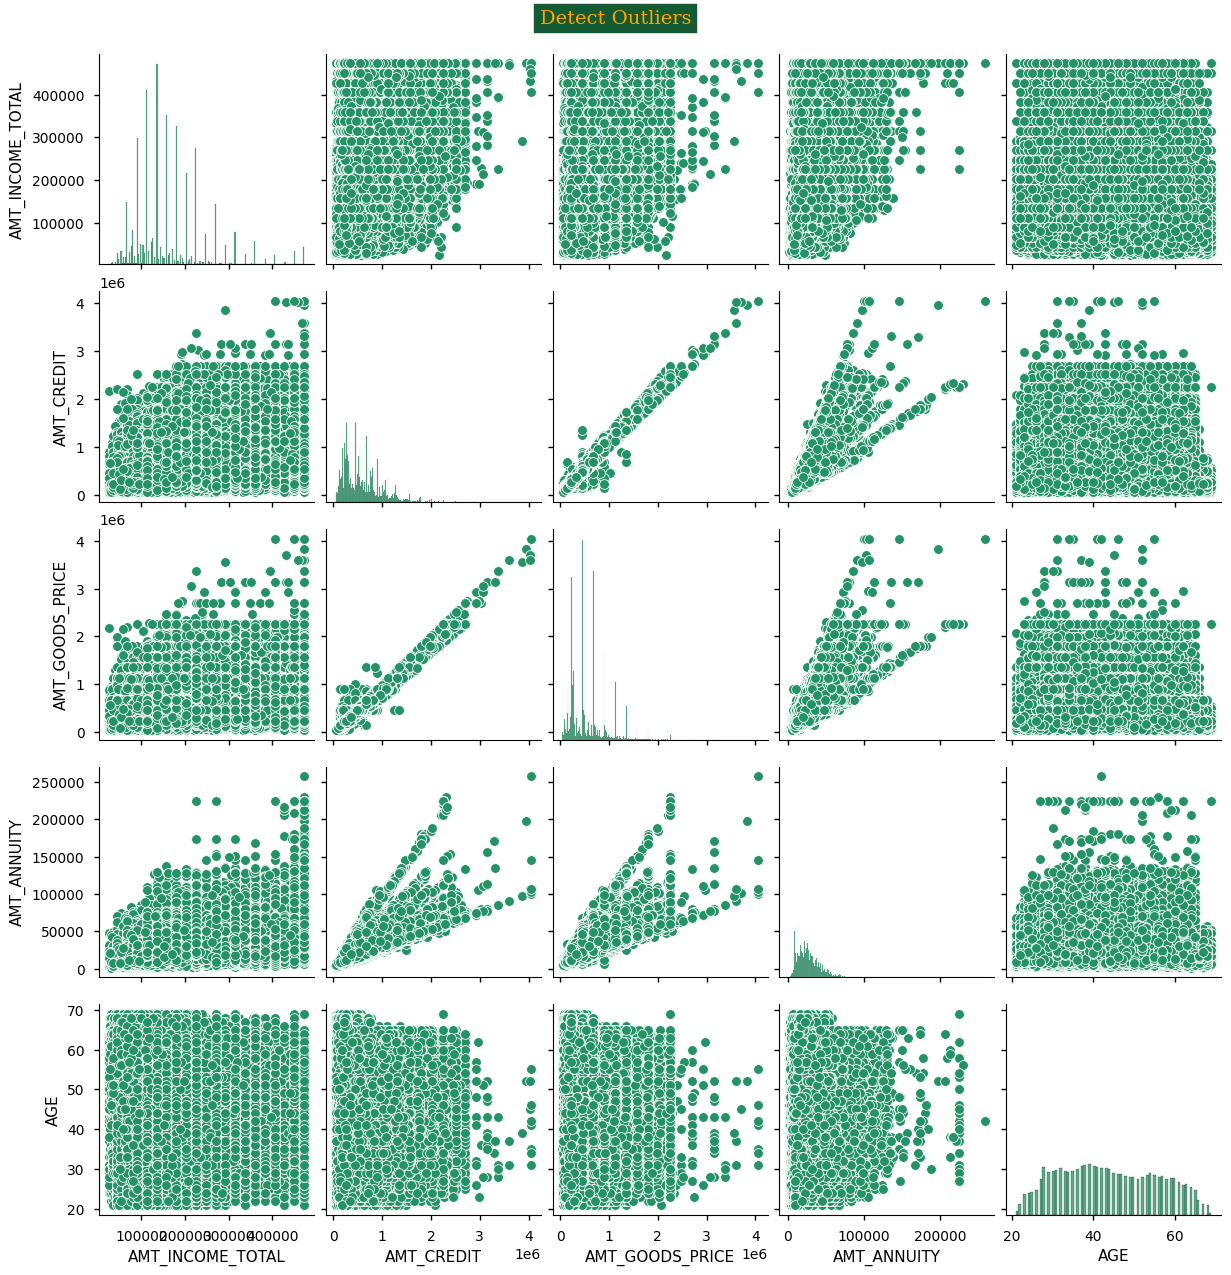

In [41]:
## Checking for outliers

# List of important numeric columns
cols_to_plot = [
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_GOODS_PRICE',
    'AMT_ANNUITY',
    'AGE'
]

%matplotlib inline
sns.set_palette('summer')
dnp = sns.pairplot(curr_data[cols_to_plot])
dnp.fig.suptitle('Detect Outliers', y=1.02, **FONT)

plt.show()

From this pairplot, we can see:

* **`AMT_INCOME_TOTAL`**: Several extreme outliers are present on the higher end, far away from the main cluster of values.
* **`AMT_CREDIT`** and **`AMT_GOODS_PRICE`**: Very strong linear relationship (likely due to credit amounts often matching goods prices), but also some high-value outliers.
* **`AMT_ANNUITY`**: Mostly concentrated in lower ranges, but a few large spikes indicate possible anomalies.
* **`AGE`**: Evenly spread between \~20 and \~65 years, no obvious outliers.
* Across several scatterplots, vertical/horizontal lines at certain values suggest **data entry plateaus** or default fill values in the dataset.

Overall, the plot highlights **income and credit-related fields** as having significant outliers that may need capping or transformation before modeling.

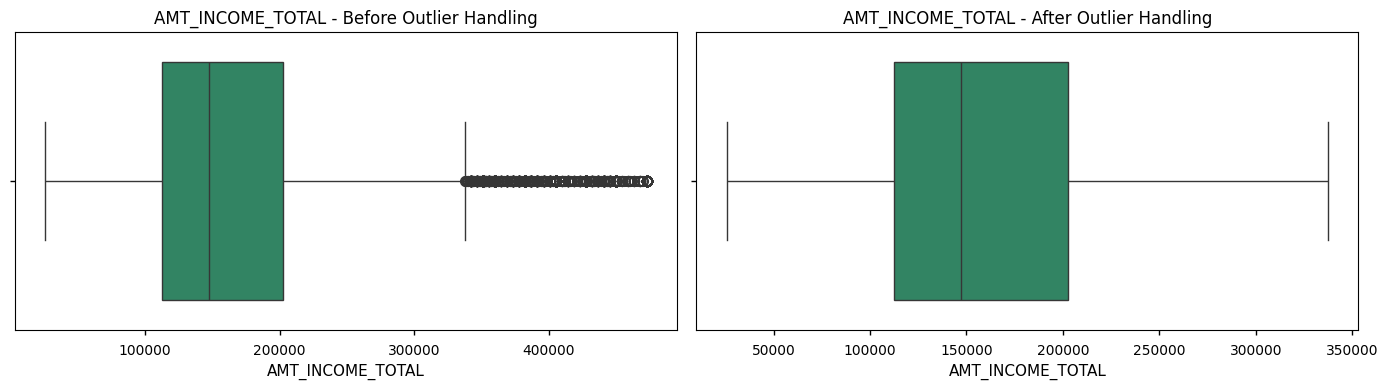

Number of outliers in AMT_INCOME_TOTAL before handling are : 14035


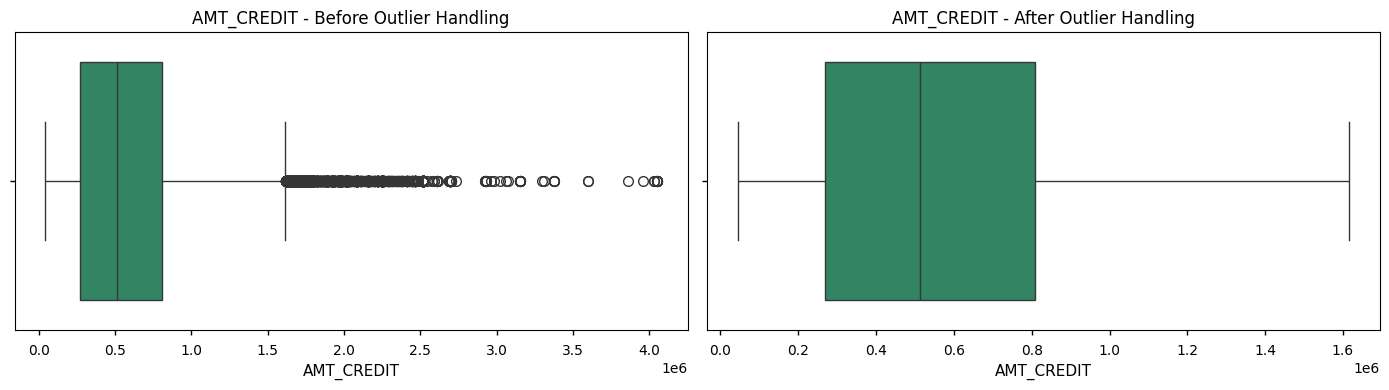

Number of outliers in AMT_CREDIT before handling are : 6562


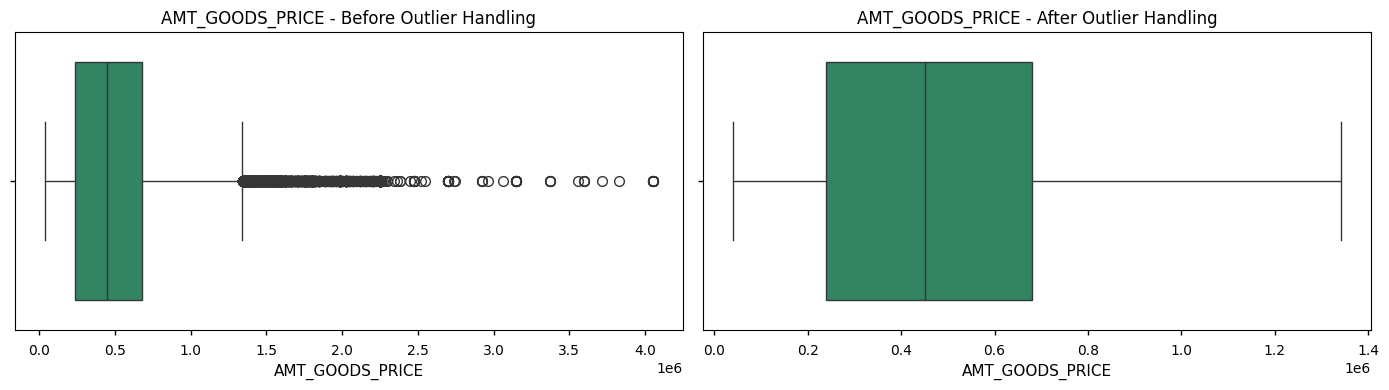

Number of outliers in AMT_GOODS_PRICE before handling are : 14728


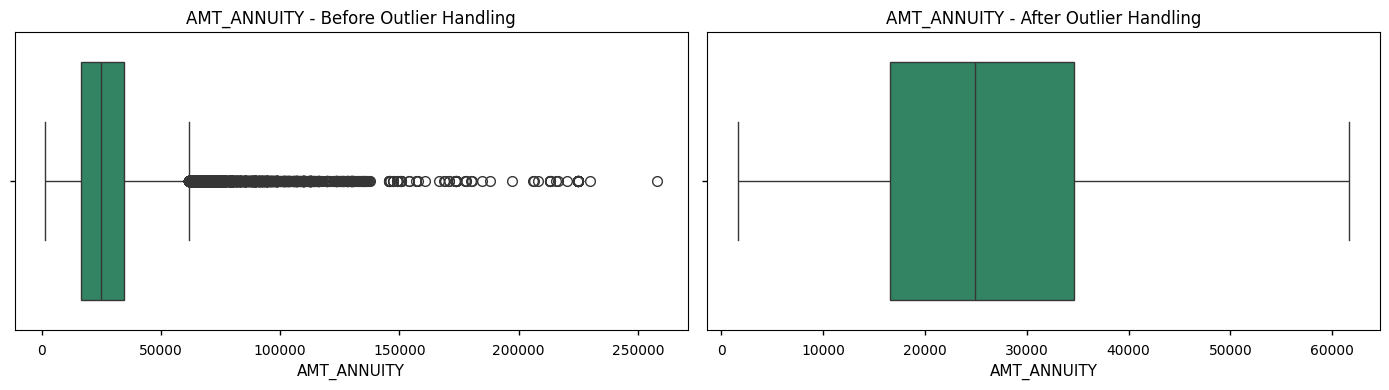

Number of outliers in AMT_ANNUITY before handling are : 7504


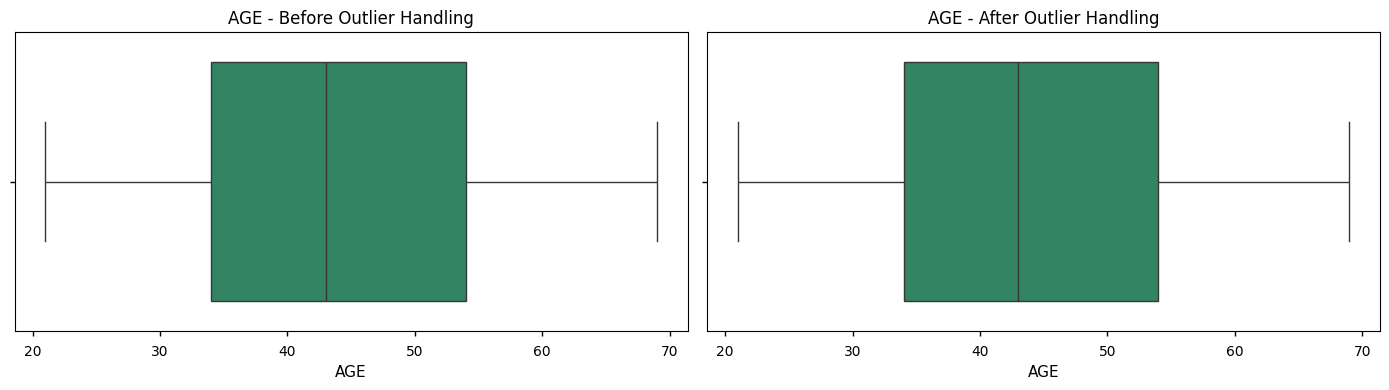

Number of outliers in AGE before handling are : 0


In [42]:
for col in cols_to_plot:
    # Store a copy of original column
    original = curr_data[col].copy()


    # Compute IQR bounds
    q1 = original.quantile(0.25)
    q3 = original.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Apply IQR capping
    capped = np.clip(original, lower_bound, upper_bound)
    curr_data[col] = capped  # update the main DataFrame

    # Plot side-by-side boxplots
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))

    sns.boxplot(x=original, ax=axes[0])
    axes[0].set_title(f'{col} - Before Outlier Handling')

    sns.boxplot(x=capped, ax=axes[1])
    axes[1].set_title(f'{col} - After Outlier Handling')

    plt.tight_layout()
    plt.show()

    # Identify outliers
    outliers = original[
    (original < q1 - 1.5 * iqr) |
    (original > q3 + 1.5 * iqr)
]
    print(f"Number of outliers in {col} before handling are : {len(outliers)}")

**Outlier Handling Summary**

We examined and handled outliers in the main numeric features using capping.

- **`AMT_INCOME_TOTAL`**  
  - Outliers before handling: **14,035**  
  - Post-handling: capped at 472,500, distribution compressed with no extreme spikes.

- **`AMT_CREDIT`**  
  - Outliers before handling: **6,562**  
  - Post-handling: capped at 1,600,000, range now more compact.

- **`AMT_GOODS_PRICE`**  
  - Outliers before handling: **14,728**  
  - Post-handling: capped at 1,350,000, aligned closer to majority values.

- **`AMT_ANNUITY`**  
  - Outliers before handling: **7,504**  
  - Post-handling: capped at 60,000, removing extreme high-end payments.

- **`AGE`**  
  - Outliers before handling: **0** — distribution remained unchanged.

**Key Observation:**  
The outlier handling step significantly reduced the influence of extreme values in financial variables, leading to more stable distributions for modeling.


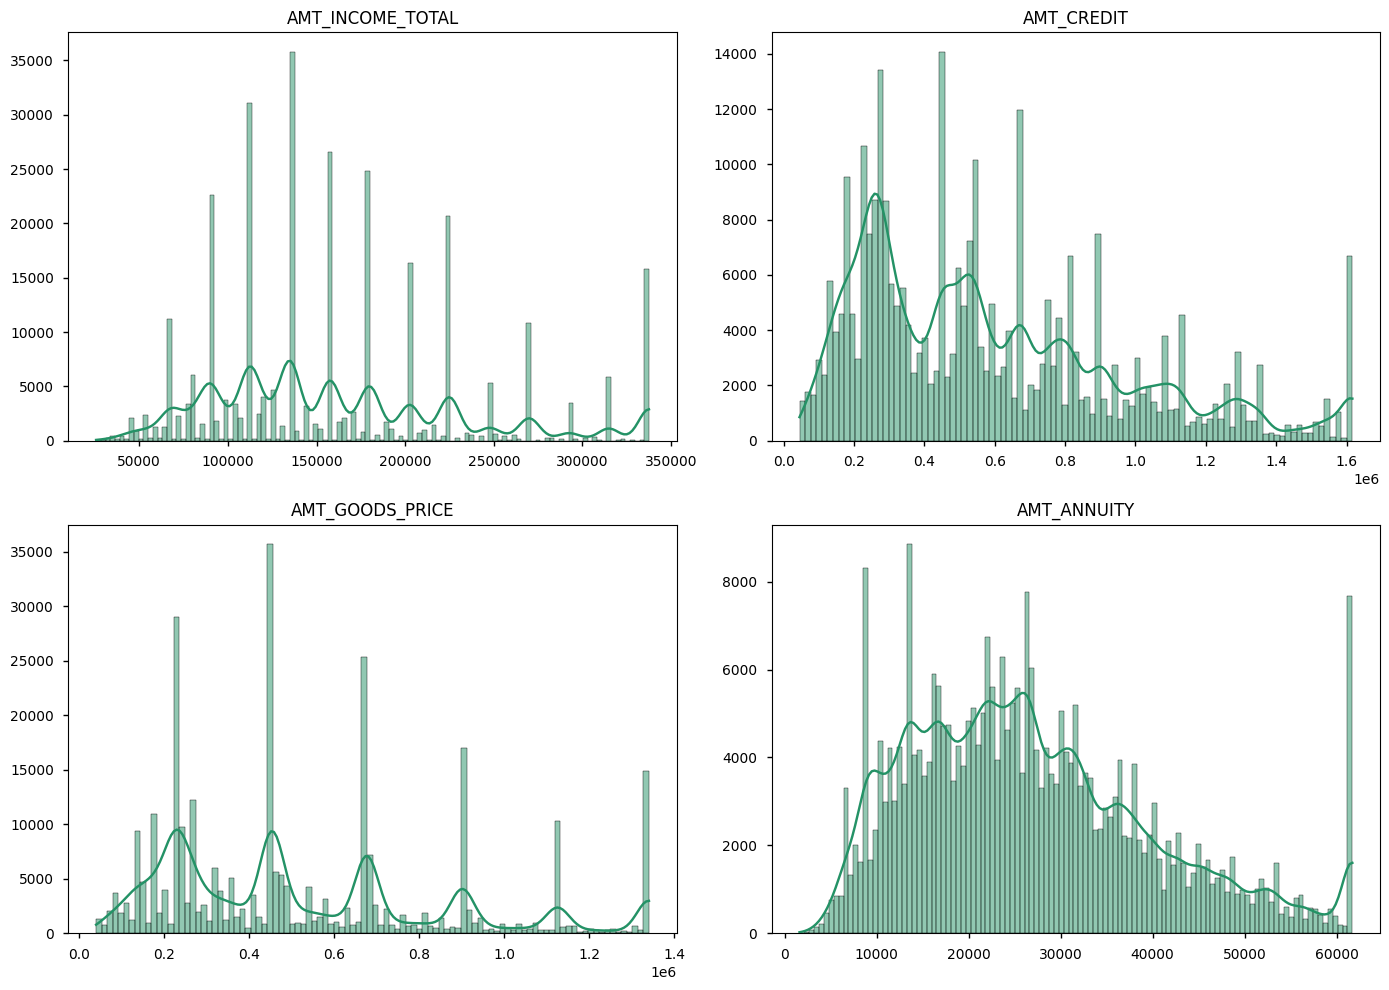

In [43]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, col in zip(axes.flatten(), cols_to_plot):
    sns.histplot(data=curr_data, x=col, kde=True, fill=True, ax=ax, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()


**Distribution After Outlier Handling**

After applying IQR-based capping, we took another look at the key financial variables to see how their distributions had changed:

* **`AMT_INCOME_TOTAL`**: Most applicants report incomes between 100,000 and 200,000, with noticeable spikes that are probably due to rounded or standardized reporting.
* **`AMT_CREDIT`**: Loan amounts are generally below 1,000,000, clustering around common sizes like 300k–500k.
* **`AMT_GOODS_PRICE`**: Clear peaks appear at common price points (e.g., 450k, 675k), suggesting many loans are tied to standard product prices.
* **`AMT_ANNUITY`**: Concentrated in the 10k–30k range, gradually decreasing towards the capped limit of 60k.

**Observation:**
Capping outliers has made these distributions much tighter and removed extreme values, but a few still show skewness:

* **`AMT_CREDIT`** and **`AMT_ANNUITY`** are still heavily right-skewed and would benefit from log transformation.
* **`AMT_INCOME_TOTAL`** has only a mild right skew; a log transform could help but isn’t strictly necessary.
* **`AMT_GOODS_PRICE`** shows distinct value clusters, likely due to standardized pricing, and doesn’t need transformation.


In [44]:
curr_data['AMT_CREDIT'] = np.log1p(curr_data['AMT_CREDIT'])
curr_data['AMT_GOODS_PRICE'] = np.log1p(curr_data['AMT_GOODS_PRICE'])

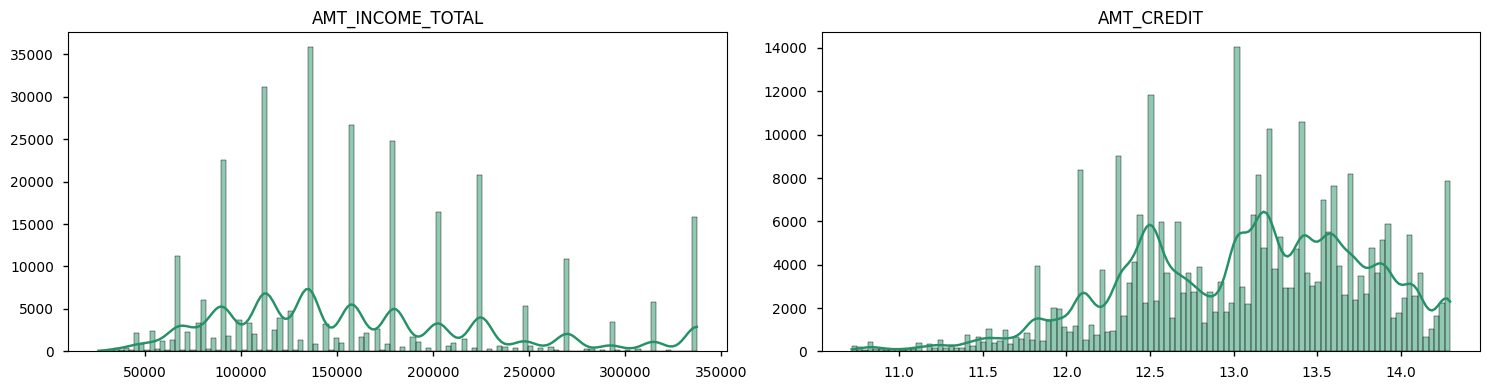

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))
cols = ['AMT_CREDIT','AMT_GOODS_PRICE']
for ax, col in zip(axes.flatten(), cols_to_plot):
    sns.histplot(data=curr_data, x=col, kde=True, fill=True, ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

**Distribution After Log Transformation**

Applying a log transformation to skewed features has noticeably improved their distribution:

- **`AMT_INCOME_TOTAL`**: The distribution is now more balanced, though peaks remain at rounded income levels due to standardized reporting. Skewness is greatly reduced, improving suitability for models sensitive to non-normality.
- **`AMT_CREDIT`**: The transformation compressed the long right tail and produced a more symmetric spread. Distinct peaks remain, reflecting common loan size brackets, but extreme values no longer dominate the scale.

**Observation:**  
Log transformation has effectively reduced skewness in both variables, leading to more stable ranges and better-behaved features for modeling.


#### 4.3 Data Imbalance Checking



In [46]:
print(curr_data.TARGET.value_counts(normalize=True)*100)
print("1 is ")
print('--'*20)
print(curr_data.CODE_GENDER.value_counts(normalize = True)*100)
print('--'*20)
print(curr_data.NAME_CONTRACT_TYPE.value_counts(normalize = True)*100)
print('--'*20)

balance_list = ['NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
for check in balance_list:
    print(curr_data[check].value_counts(normalize=True)*100,"\n")

TARGET
0.0    91.927128
1.0     8.072872
Name: proportion, dtype: float64
1 is 
----------------------------------------
CODE_GENDER
F    65.835011
M    34.164989
Name: proportion, dtype: float64
----------------------------------------
NAME_CONTRACT_TYPE
Cash loans         90.479969
Revolving loans     9.520031
Name: proportion, dtype: float64
----------------------------------------
NAME_INCOME_TYPE
Working                 51.631387
Commercial associate    23.289181
Pensioner               18.003636
State servant            7.057909
Unemployed               0.007154
Student                  0.005854
Businessman              0.003252
Maternity leave          0.001626
Name: proportion, dtype: float64 

NAME_EDUCATION_TYPE
Secondary / secondary special    71.018768
Higher education                 24.345120
Incomplete higher                 3.341799
Lower secondary                   1.240980
Academic degree                   0.053334
Name: proportion, dtype: float64 

NAME_FAMILY_STATUS

From the analysis, we observed that the `TARGET` column is **highly imbalanced**, with only **8.07%** of applicants being defaulters (`1` = defaulter, `0` = non-defaulter, as per `columns_description.csv`).  

Since `TARGET` is our prediction variable, this imbalance needs to be addressed before modeling to avoid bias toward the majority class.

In the modeling stage, we will handle the imbalance using one or more of the following approaches:
1. **Class-weighted loss function** — Assign higher weight to the minority class so the model focuses more on predicting defaulters.
2. **Sampling techniques** — Apply undersampling, oversampling, or a hybrid method depending on model performance and validation results.

For now, other categorical imbalances (e.g., `CODE_GENDER`, `NAME_CONTRACT_TYPE`) will remain unchanged.  
If fairness analysis (using `fairkit-learn`) or SHAP interpretation later reveals bias or overfitting linked to these variables, we will revisit them and apply mitigation strategies.


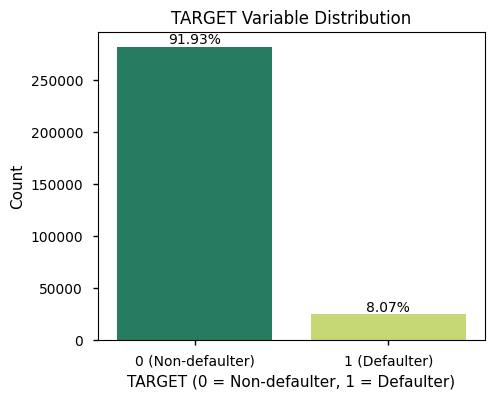

In [47]:
plt.figure(figsize=(5,4))
ax = sns.countplot(x='TARGET', data=curr_data, palette=['#178b66','#d1e866'])
plt.title("TARGET Variable Distribution")
plt.xlabel("TARGET (0 = Non-defaulter, 1 = Defaulter)")
plt.ylabel("Count")
plt.xticks([0,1], ['0 (Non-defaulter)', '1 (Defaulter)'])

# Add percentage labels
total = len(curr_data)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height/total)*100:.2f}%',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.show()


### 4.4 Feature Engineeering
| Ratio Name                  | Formula (Example Columns)                             | What it Tells                                               |
| --------------------------- | ----------------------------------------------------- | ----------------------------------------------------------- |
| **Annuity-to-Income**       | `AMT_ANNUITY / AMT_INCOME_TOTAL`                      | Monthly burden relative to income                           |                          |
| **Savings Score**           | `EXT_SOURCE_2 * EXT_SOURCE_3`                         | Combined external reliability proxy                         |
| **Family Burden Index**     | `(CNT_CHILDREN + CNT_FAM_MEMBERS) / AMT_INCOME_TOTAL` | Economic dependents per unit income                         |
| **Age to Employment Ratio** | `AGE / (YEARS_EMPLOYED + 1)` *(+1 to avoid zero)*     | Possibly unstable if too young/old relative to work history |



In [48]:

# Avoid divide-by-zero by adding small constants where necessary

curr_data['ANNUITY_TO_INCOME'] = curr_data['AMT_ANNUITY'] / (curr_data['AMT_INCOME_TOTAL'] + 1)
curr_data['SAVINGS_SCORE'] = curr_data['EXT_SOURCE_2'] * curr_data['EXT_SOURCE_3']
curr_data['FAMILY_BURDEN_INDEX'] = (curr_data['CNT_CHILDREN'] + curr_data['CNT_FAM_MEMBERS']) / (curr_data['AMT_INCOME_TOTAL'] + 1)
curr_data['AGE_TO_EMPLOYMENT'] = curr_data['AGE'] / (curr_data['YEARS_EMPLOYED'] + 1)
curr_data['INCOME_PER_MEMBER'] = curr_data['AMT_INCOME_TOTAL'] / curr_data['CNT_FAM_MEMBERS']
curr_data['CREDIT_PER_CHILD'] = curr_data['AMT_CREDIT'] / (curr_data['CNT_CHILDREN'] + 1)

curr_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0    100002.0     1.0         Cash loans           M            N   
1    100003.0     0.0         Cash loans           F            N   
2    100004.0     0.0    Revolving loans           M            Y   
3    100006.0     0.0         Cash loans           F            N   
4    100007.0     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0   12.915581      24700.5   
1               N           0.0          270000.0   14.072865      35698.5   
2               Y           0.0           67500.0   11.813037       6750.0   
3               Y           0.0          135000.0   12.652947      29686.5   
4               Y           0.0          121500.0   13.148033      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        12.768544          Working  Secondary / secondary special   
1        13.937287    State servant               Higher education   
2        11.813037          Working  Secondary / secondary special   
3        12.601491          Working  Secondary / secondary special   
4        13.148033          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  Single / not married  House / apartment        Laborers              1.0   
1               Married  House / apartment      Core staff              2.0   
2  Single / not married  House / apartment        Laborers              1.0   
3        Civil marriage  House / apartment        Laborers              2.0   
4  Single / not married  House / apartment      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                   2.0                          2.0  Business Entity Type 3   
1                   1.0                          1.0                  School   
2                   2.0                          2.0              Government   
3                   2.0                          2.0  Business Entity Type 3   
4                   2.0                          2.0                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_MON  \
0      0.262949      0.139376                        0.0   
1      0.622246      0.535276                        0.0   
2      0.555912      0.729567                        0.0   
3      0.650442      0.535276                        0.0   
4      0.322738      0.535276                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  YEARS_EMPLOYED  \
0                        0.0                         1.0   26             2.0   
1                        0.0                         0.0   46             3.0   
2                        0.0                         0.0   52             1.0   
3                        0.0                         1.0   52             8.0   
4                        0.0                         0.0   55             8.0   

   IS_CURRENTLY_EMPLOYED  ANNUITY_TO_INCOME  SAVINGS_SCORE  \
0                  False           0.121977       0.036649   
1                  False           0.132216       0.333073   
2                  False           0.099999       0.405575   
3                  False           0.219898       0.348166   
4                  False           0.179961       0.172754   

   FAMILY_BURDEN_INDEX  AGE_TO_EMPLOYMENT  INCOME_PER_MEMBER  CREDIT_PER_CHILD  
0             0.000005           8.666667           202500.0         12.915581  
1             0.000007          11.500000           135000.0         14.072865  
2             0.000015          26.000000            67500.0         11.813037  
3             0.000015           5.777778            67500.0         12.652947  
4             0.000008           6.111111           121500.0         13.148033

In [49]:
# Compare by TARGET
ratio_cols = ['ANNUITY_TO_INCOME', 'SAVINGS_SCORE','FAMILY_BURDEN_INDEX','AGE_TO_EMPLOYMENT','INCOME_PER_MEMBER','CREDIT_PER_CHILD']

for col in ratio_cols:
    print(f"\n{col} by TARGET")
    print(curr_data.groupby('TARGET')[col].describe().T)



ANNUITY_TO_INCOME by TARGET
TARGET            0.0           1.0
count   282675.000000  24824.000000
mean         0.180721      0.185836
std          0.092245      0.093075
min          0.008729      0.014828
25%          0.116665      0.121047
50%          0.163832      0.169849
75%          0.227265      0.233065
max          1.451525      1.875892

SAVINGS_SCORE by TARGET
TARGET           0.0           1.0
count   2.826750e+05  2.482400e+04
mean    2.765792e-01  1.761179e-01
std     1.392540e-01  1.287835e-01
min     4.375143e-08  5.239158e-09
25%     1.671194e-01  6.728201e-02
50%     2.811486e-01  1.527141e-01
75%     3.771912e-01  2.703693e-01
max     7.047654e-01  6.481603e-01

FAMILY_BURDEN_INDEX by TARGET
TARGET            0.0           1.0
count   282675.000000  24824.000000
mean         0.000019      0.000020
std          0.000016      0.000017
min          0.000003      0.000003
25%          0.000009      0.000009
50%          0.000015      0.000015
75%          0.000023   

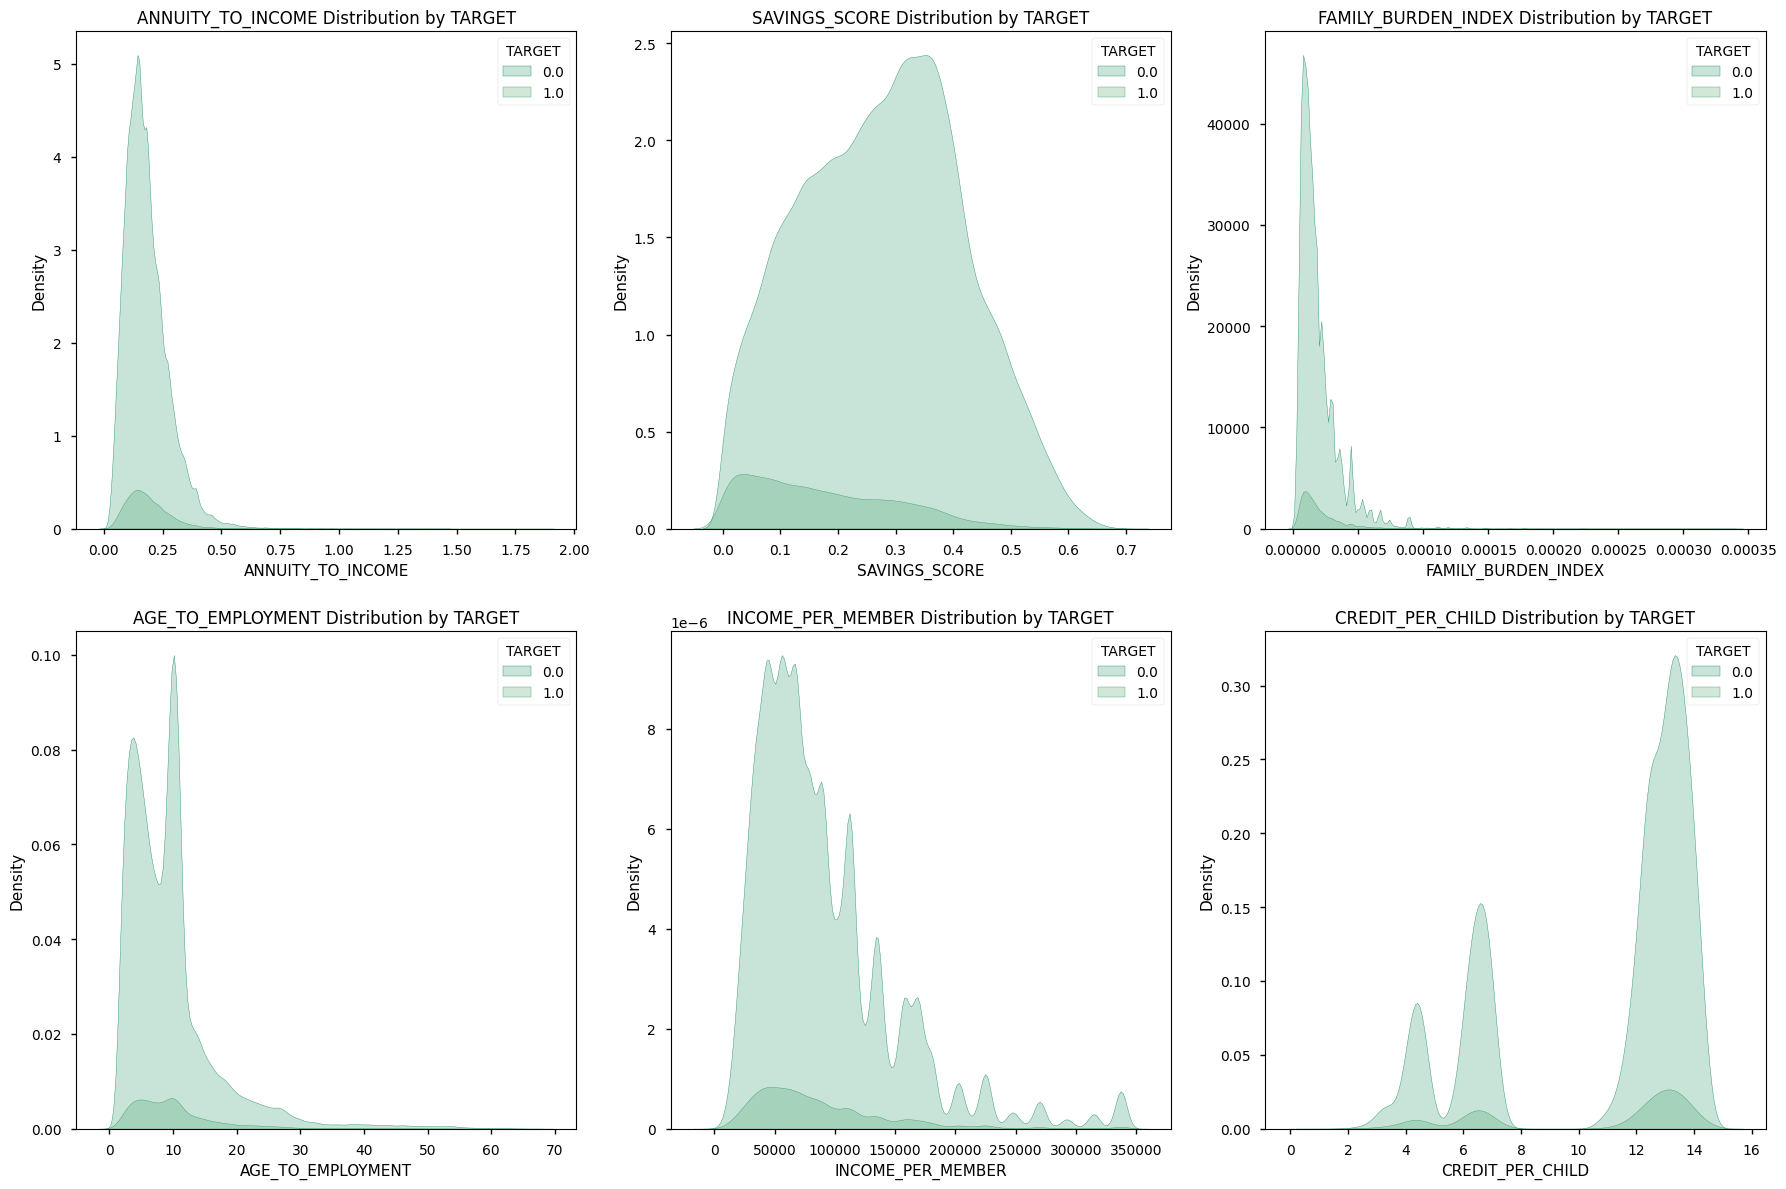

In [50]:
# Calculate grid size (3x3)
n = len(ratio_cols)
ncols = 3
nrows = (n + ncols - 1) // ncols  # Ceiling division

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, 12))
axes = axes.flatten()

# Plot each ratio distribution
for i, col in enumerate(ratio_cols):
    sns.kdeplot(data=curr_data, x=col, hue='TARGET', ax=axes[i], fill=True)
    axes[i].set_title(f"{col} Distribution by TARGET", fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Density")

# Remove any extra subplots if unused
for j in range(len(ratio_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



**Summary of Newly Engineered Features by TARGET**

* **`ANNUITY_TO_INCOME`**: Median ratio is slightly higher for defaulters (0.1698) than non-defaulters (0.1638), indicating they may be committing a larger portion of income to loan repayment.

* **`SAVINGS_SCORE`**: Non-defaulters have a substantially higher median (0.2811) than defaulters (0.1527), suggesting stronger savings capacity.

* **`FAMILY_BURDEN_INDEX`**: Very small values overall; medians are nearly identical between groups, indicating limited predictive separation.

* **`AGE_TO_EMPLOYMENT`**: Defaulters have a slightly higher median (9.0 vs. 8.33 years), hinting at marginally older employment-to-age ratios.

* **`INCOME_PER_MEMBER`**: Median is lower for defaulters (69,750) than non-defaulters (75,000), suggesting a smaller per-capita income in defaulting households.

* **`CREDIT_PER_CHILD`**: Medians are nearly identical between groups, showing limited discriminatory power.

**Key Insight:**
`SAVINGS_SCORE` and `INCOME_PER_MEMBER` show notable separation between defaulters and non-defaulters, while `FAMILY_BURDEN_INDEX` and `CREDIT_PER_CHILD` have little distinction and may be less useful without interaction effects.

<a id="eda"></a>
# <p style="background-color:#0c4510;font-family:newtimeroman;font-size:120%;color:orange;text-align:center;border-radius:15px 50px; padding:7px">5. Exploratory Data Analysis (EDA)</p>

[Table of Contents](#tabel)

In [51]:
curr_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307499 entries, 0 to 307510
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307499 non-null  float64
 1   TARGET                       307499 non-null  float64
 2   NAME_CONTRACT_TYPE           307499 non-null  object 
 3   CODE_GENDER                  307499 non-null  object 
 4   FLAG_OWN_CAR                 307499 non-null  object 
 5   FLAG_OWN_REALTY              307499 non-null  object 
 6   CNT_CHILDREN                 307499 non-null  float64
 7   AMT_INCOME_TOTAL             307499 non-null  float64
 8   AMT_CREDIT                   307499 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307499 non-null  float64
 11  NAME_INCOME_TYPE             307499 non-null  object 
 12  NAME_EDUCATION_TYPE          307499 non-null  object 
 13  NAME

There are now 31 columns remaining. Lets divide into categorical and numerical column for further analysis.

In [52]:
cat_cols = curr_data.select_dtypes(include=['object','bool']).columns.tolist()

num_cols = curr_data.select_dtypes(include=['int32', 'float64']).columns.tolist()
num_cols = [col for col in num_cols if col not in ['SK_ID_CURR', 'TARGET']]

print(f"\nCategorical Columns are {len(cat_cols)}")

print(f"\nNumerical Columns are {len(num_cols)}")


Categorical Columns are 11

Numerical Columns are 20


<a id="univariate"></a>
### <p style="background-color:#0c4510;font-family:newtimeroman;font-size:100%;color:orange;text-align:center;border-radius:15px 50px; padding:7px">5.1. Univariate Analysis</p>

[Table of Contents](#tabel)

In [53]:
curr_data[num_cols].describe()  # Basic stats

CNT_CHILDREN  AMT_INCOME_TOTAL     AMT_CREDIT    AMT_ANNUITY  \
count  307499.000000     307499.000000  307499.000000  307499.000000   
mean        0.416684     162626.226000      13.066496   26797.677776   
std         0.718461      73302.314161       0.708295   13281.169715   
min         0.000000      25650.000000      10.714440    1615.500000   
25%         0.000000     112500.000000      12.506181   16524.000000   
50%         0.000000     147150.000000      13.149068   24903.000000   
75%         1.000000     202500.000000      13.603123   34596.000000   
max        10.000000     337500.000000      14.295852   61704.000000   

       AMT_GOODS_PRICE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count    307499.000000    307499.000000         307499.000000   
mean         12.953952         2.152296              2.052468   
std           0.703016         0.907856              0.509034   
min          10.609082         1.000000              1.000000   
25%          12.382129         2.000000              2.000000   
50%          13.017005         2.000000              2.000000   
75%          13.429114         3.000000              2.000000   
max          14.108927        12.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2   EXT_SOURCE_3  \
count                307499.000000  3.074990e+05  307499.000000   
mean                      2.031525  5.145007e-01       0.515701   
std                       0.502737  1.908701e-01       0.174733   
min                       1.000000  8.173617e-08       0.000527   
25%                       2.000000  3.929737e-01       0.417100   
50%                       2.000000  5.659614e-01       0.535276   
75%                       2.000000  6.634218e-01       0.636376   
max                       3.000000  8.549997e-01       0.896010   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count              307499.000000              307499.000000   
mean                    0.231289                   0.229637   
std                     0.856810                   0.744071   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                    27.000000                 261.000000   

       AMT_REQ_CREDIT_BUREAU_YEAR  YEARS_EMPLOYED  ANNUITY_TO_INCOME  \
count               307499.000000   307499.000000      307499.000000   
mean                     1.778445        6.256690           0.181134   
std                      1.765522        5.835436           0.092323   
min                      0.000000        0.000000           0.008729   
25%                      1.000000        3.000000           0.116959   
50%                      1.000000        5.000000           0.164333   
75%                      3.000000        8.000000           0.227794   
max                     25.000000       49.000000           1.875892   

       SAVINGS_SCORE  FAMILY_BURDEN_INDEX  AGE_TO_EMPLOYMENT  \
count   3.074990e+05        307499.000000      307499.000000   
mean    2.684691e-01             0.000019           9.572320   
std     1.411171e-01             0.000016           7.510229   
min     5.239158e-09             0.000003           1.340000   
25%     1.556551e-01             0.000009           4.571429   
50%     2.717977e-01             0.000015           8.400000   
75%     3.715962e-01             0.000024          11.000000   
max     7.047654e-01             0.000342          68.000000   

       INCOME_PER_MEMBER  CREDIT_PER_CHILD  
count      307499.000000     307499.000000  
mean        89926.869896         10.872581  
std         58441.342379          3.466022  
min          4875.000000          1.039695  
25%         47250.000000          6.801561  
50%         75000.000000         12.586223  
75%        112500.000000         13.422469  
max        3375

In [54]:
def univariate_cat_summary(categorical_cols, df):
    for col in categorical_cols:
        print(f"\n Categorical Summary of {col}")
        print("-" * (18 + len(col)))
        print(f"Unique Categories: {df[col].nunique()}")
        print(f"Most Frequent: {df[col].mode().values[0]} ({df[col].value_counts(normalize=True).iloc[0]*100:.2f}%)")
        print("\nTop 10 Categories by Frequency:")
        print(df[col].value_counts(dropna=False).head(10))
univariate_cat_summary(cat_cols,curr_data)


 Categorical Summary of NAME_CONTRACT_TYPE
------------------------------------
Unique Categories: 2
Most Frequent: Cash loans (90.48%)

Top 10 Categories by Frequency:
NAME_CONTRACT_TYPE
Cash loans         278225
Revolving loans     29274
Name: count, dtype: int64

 Categorical Summary of CODE_GENDER
-----------------------------
Unique Categories: 2
Most Frequent: F (65.84%)

Top 10 Categories by Frequency:
CODE_GENDER
F    202442
M    105057
Name: count, dtype: int64

 Categorical Summary of FLAG_OWN_CAR
------------------------------
Unique Categories: 2
Most Frequent: N (65.99%)

Top 10 Categories by Frequency:
FLAG_OWN_CAR
N    202917
Y    104582
Name: count, dtype: int64

 Categorical Summary of FLAG_OWN_REALTY
---------------------------------
Unique Categories: 2
Most Frequent: Y (69.37%)

Top 10 Categories by Frequency:
FLAG_OWN_REALTY
Y    213303
N     94196
Name: count, dtype: int64

 Categorical Summary of NAME_INCOME_TYPE
----------------------------------
Unique Categor

**Univariate Analysis Summary**

The tables above present summary statistics for numerical features and frequency distributions for categorical features in the dataset.

As this is a univariate overview, the results are largely self-explanatory:
- Numerical summaries give the range, central tendency, and spread for each variable.
- Categorical summaries show the count and proportion of each category.

The purpose of this is to document the data’s basic structure before moving on to bivariate and multivariate analysis.


<a id="bivariate"></a>
### <p style="background-color:#0c4510;font-family:newtimeroman;font-size:100%;color:orange;text-align:center;border-radius:15px 50px; padding:7px">5.2. Bivariate Analysis</p>

[Table of Contents](#table)

We will analyse the categorical columns and its relation towards the `TARGET` column using various methods, and hence a bivariate analysis

In [55]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

# Encode all categorical features
encoded_df = curr_data[cat_cols].copy()
for col in encoded_df.columns:
    encoded_df[col] = LabelEncoder().fit_transform(encoded_df[col])

# Chi-squared test
chi_scores = chi2(encoded_df, curr_data['TARGET'])

# Store as DataFrame
chi_df = pd.DataFrame({
    'Feature': cat_cols,
    'Chi2 Score': chi_scores[0],
    'p-value': chi_scores[1]
}).sort_values(by='Chi2 Score', ascending=False)

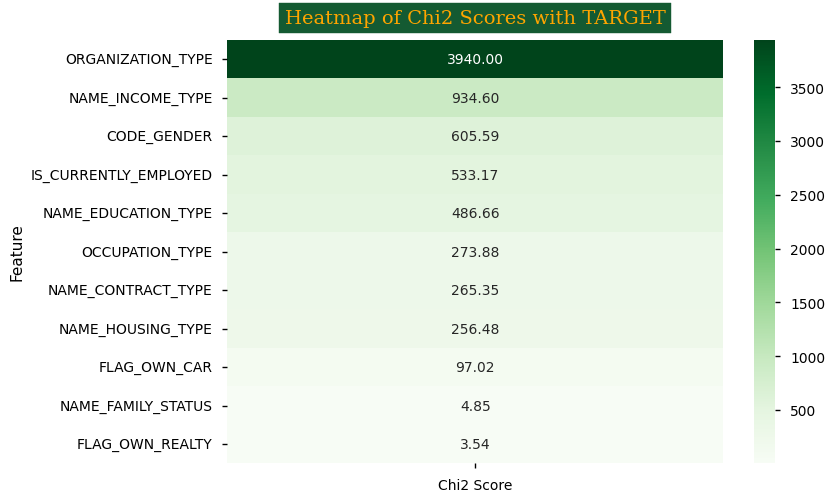

In [56]:
# Prepare Chi2 DataFrame for heatmap
chi_matrix = chi_df.set_index('Feature')[['Chi2 Score']]

plt.figure(figsize=(8, len(chi_matrix) * 0.5))
sns.heatmap(
    chi_matrix,
    cmap='Greens',
    annot=True,
    fmt=".2f",
)
plt.title('Heatmap of Chi2 Scores with TARGET', y=1.02, fontdict=FONT)
plt.ylabel('Feature')
plt.show()

**Chi² Scores with TARGET**

The heatmap ranks categorical features by their Chi² association with `TARGET`:

- **Strongest**: `ORGANIZATION_TYPE` (≈ 4139), `NAME_INCOME_TYPE` (≈ 935), `CODE_GENDER` (≈ 606).
- **Moderate**: `IS_CURRENTLY_EMPLOYED`, `NAME_EDUCATION_TYPE`, `OCCUPATION_TYPE`, `NAME_CONTRACT_TYPE`, `NAME_HOUSING_TYPE`.
- **Low**: `FLAG_OWN_CAR`, `NAME_FAMILY_STATUS`, `FLAG_OWN_REALTY`.

**Note:** This analysis highlights which categorical variables are most informative for predicting default status and can help guide feature selection or weighting in modeling.



In [57]:
top_cat_cols =['ORGANIZATION_TYPE',
    'NAME_INCOME_TYPE',
    'CODE_GENDER',
    'IS_CURRENTLY_EMPLOYED',
    'NAME_EDUCATION_TYPE',
    'OCCUPATION_TYPE',
    'NAME_CONTRACT_TYPE',
    'NAME_HOUSING_TYPE',
    'FLAG_OWN_CAR',
    'NAME_FAMILY_STATUS'
]

#List of who are not paying the loan bills and who are paying the bills
defaulters = curr_data[(curr_data['TARGET'] == 1)]
non_defaulters = curr_data[(curr_data['TARGET']==0)]

In [58]:
def plot_by_target(col, defaulters, non_defaulters):
    # Count values
    defaulters_counts = defaulters[col].value_counts()
    non_defaulters_counts = non_defaulters[col].value_counts()

    # Combine into DataFrame
    df_plot = pd.DataFrame({
        'Defaulters': defaulters_counts,
        'Non-Defaulters': non_defaulters_counts
    }).fillna(0)

    # Normalize each column (i.e., target group total = 100%)
    df_percent = df_plot.div(df_plot.sum(axis=0), axis=1) * 100

    # Sort by Non-Defaulters (optional, for consistent order)
    df_percent = df_percent.sort_values(by='Non-Defaulters', ascending=False)

    # Plot
    ax = df_percent.plot(kind='bar', figsize=(14, 6),
                         color=['#178b66', '#d1e866'], edgecolor='black')

    plt.title(f'{col} - Target-Wise Percentage Distribution', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Percentage of Target Group (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Group')
    plt.tight_layout()
    plt.show()


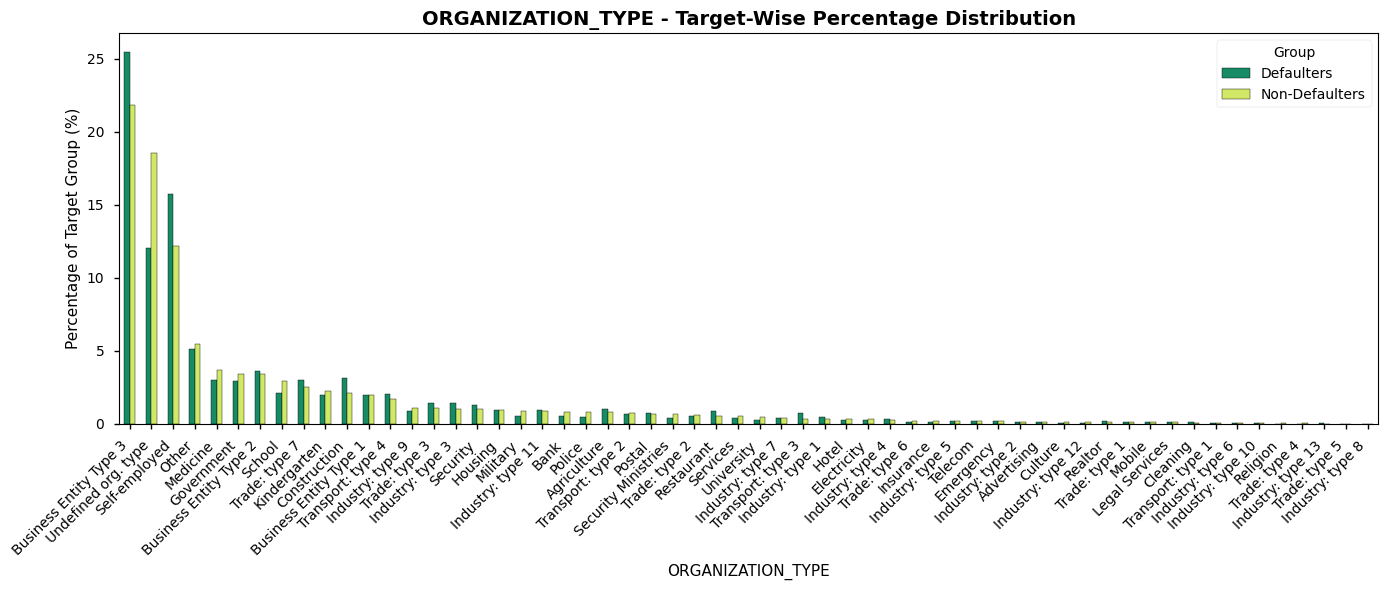

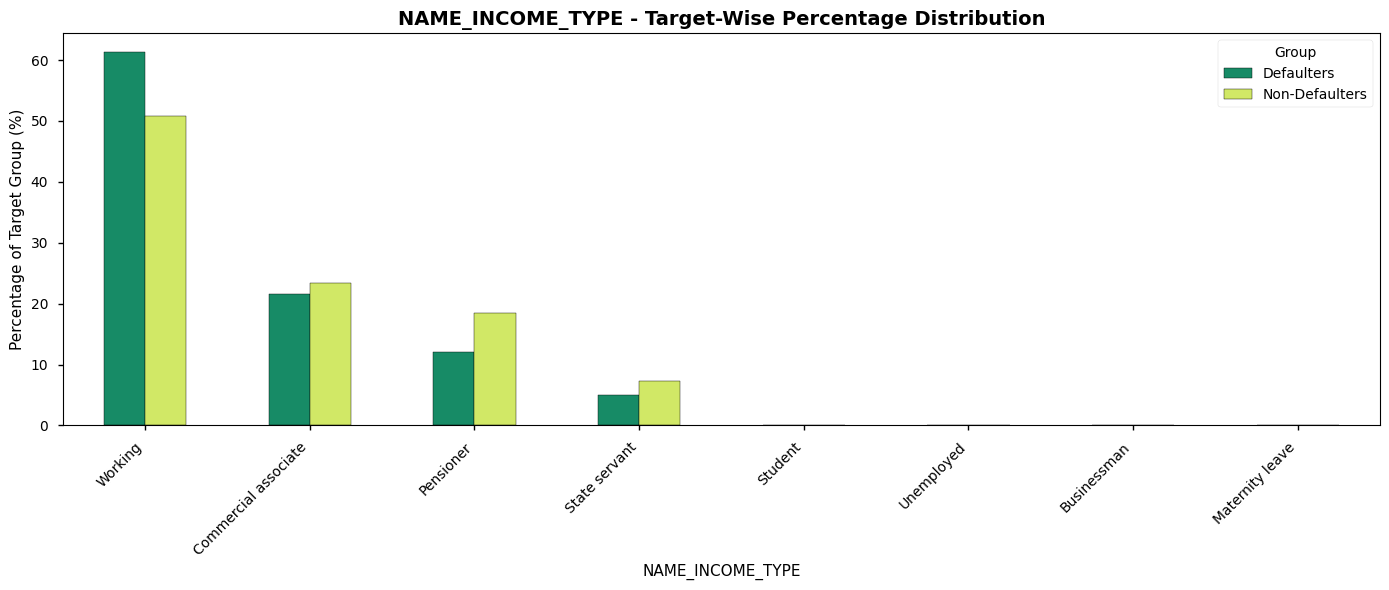

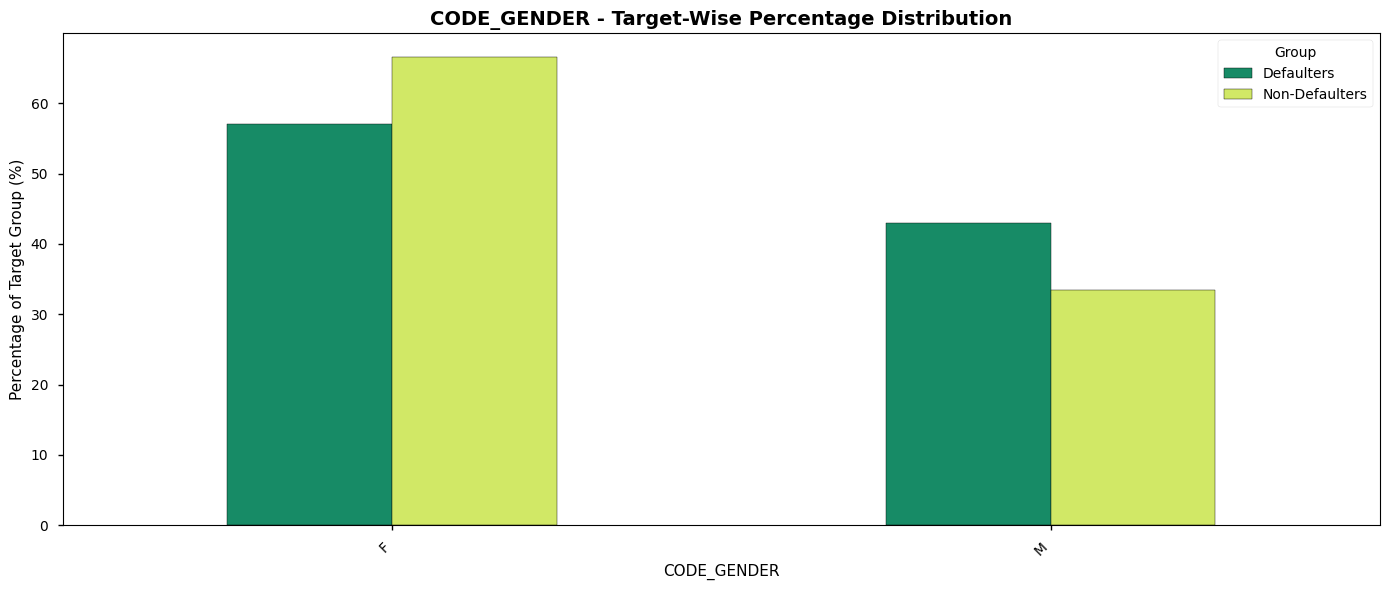

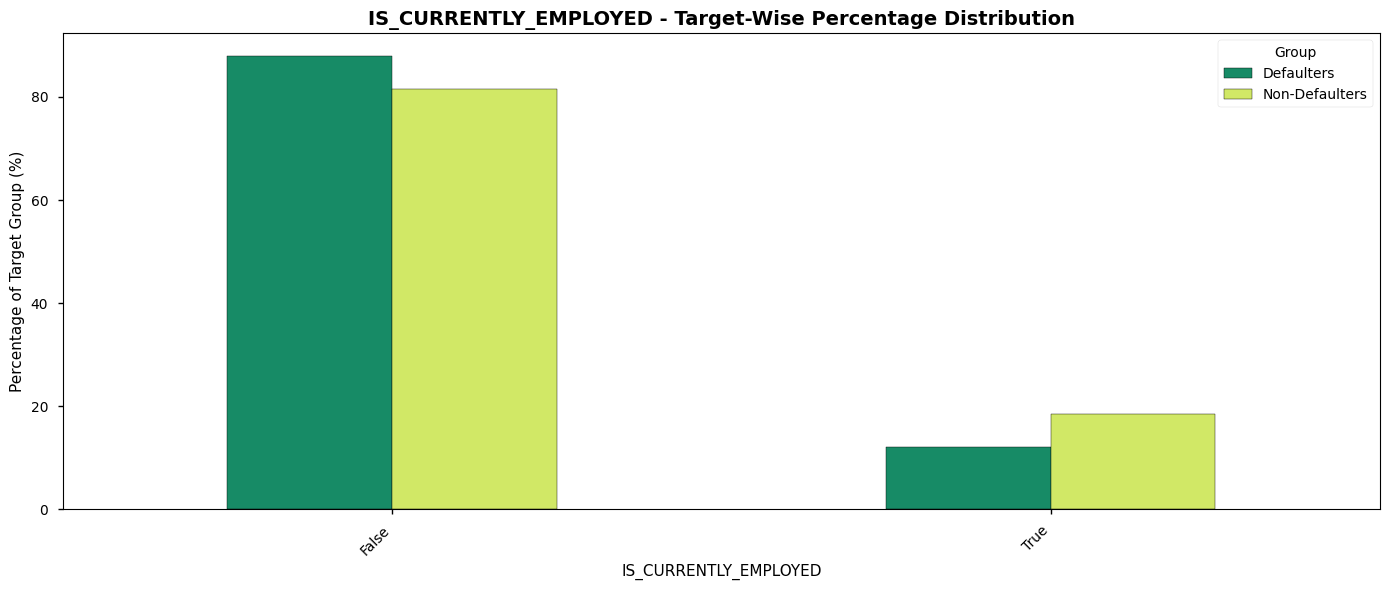

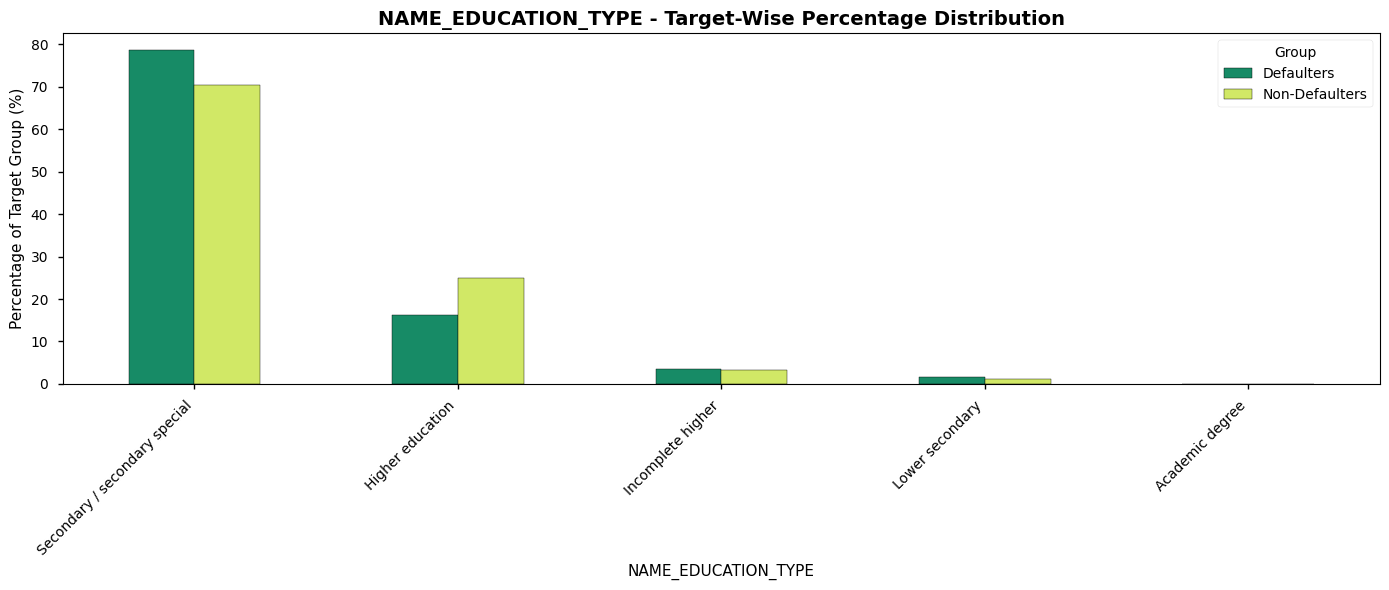

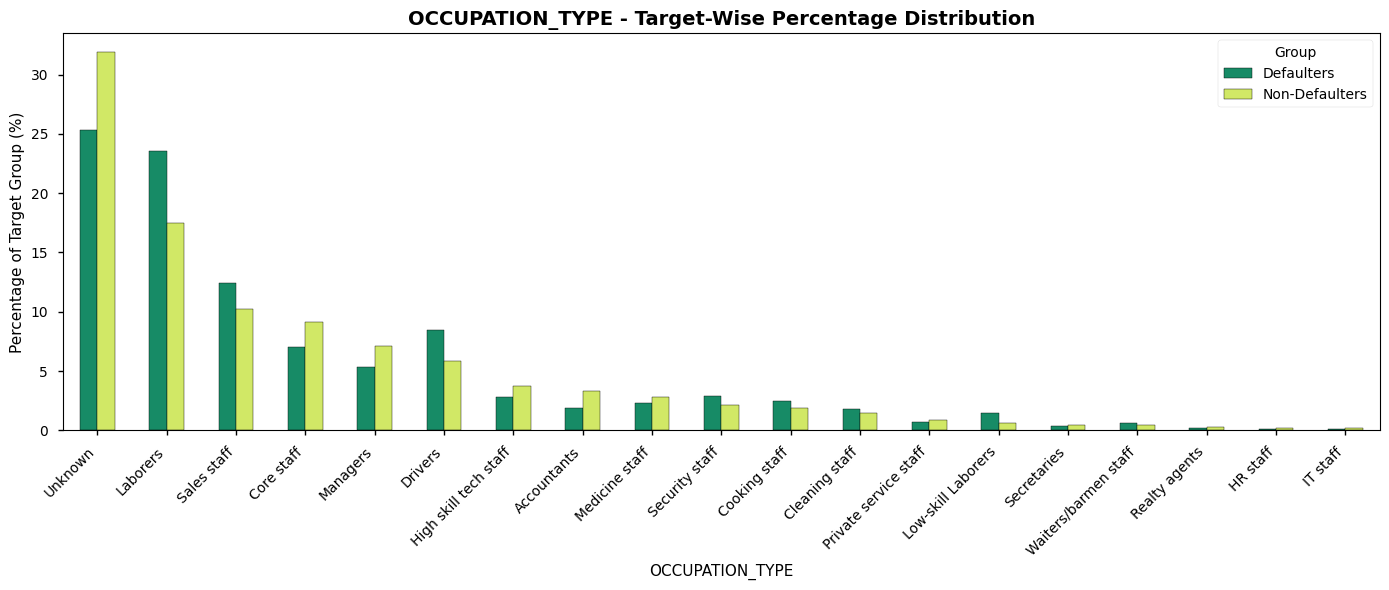

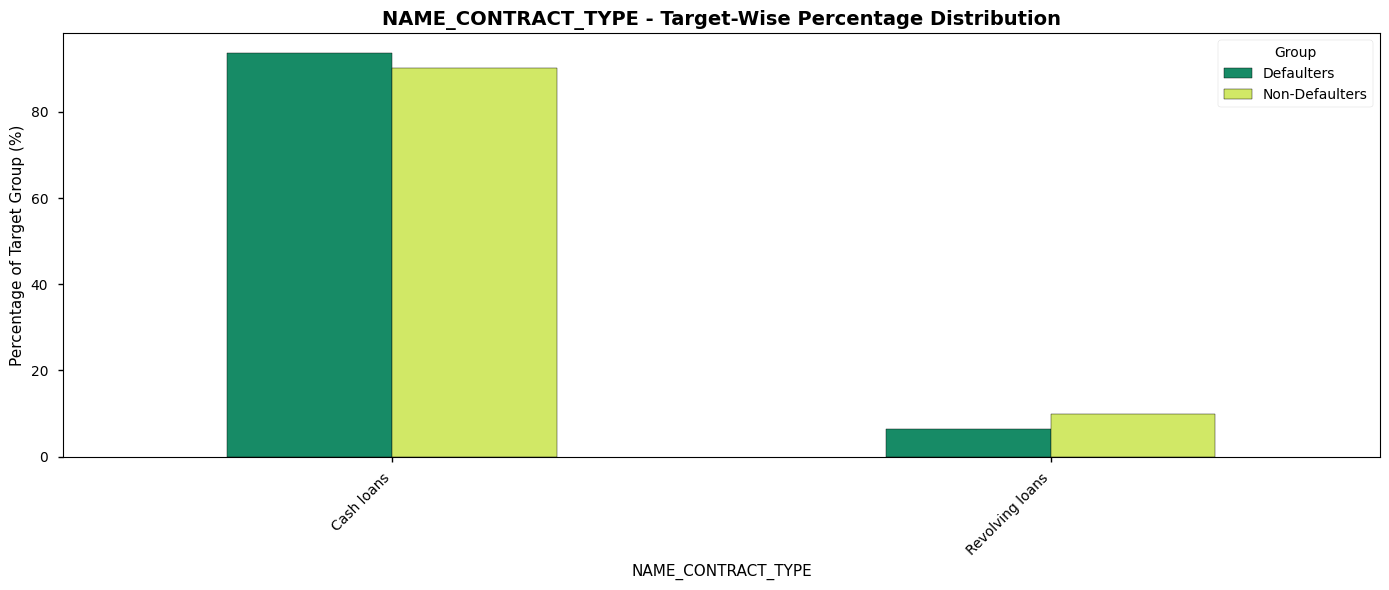

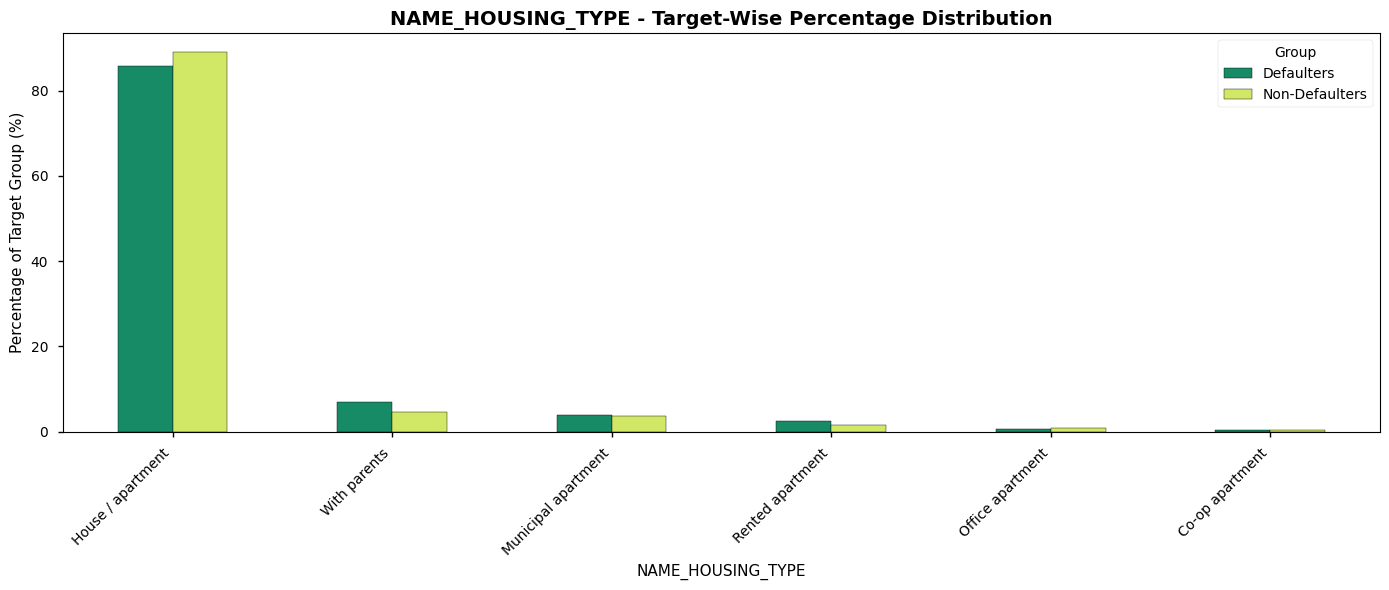

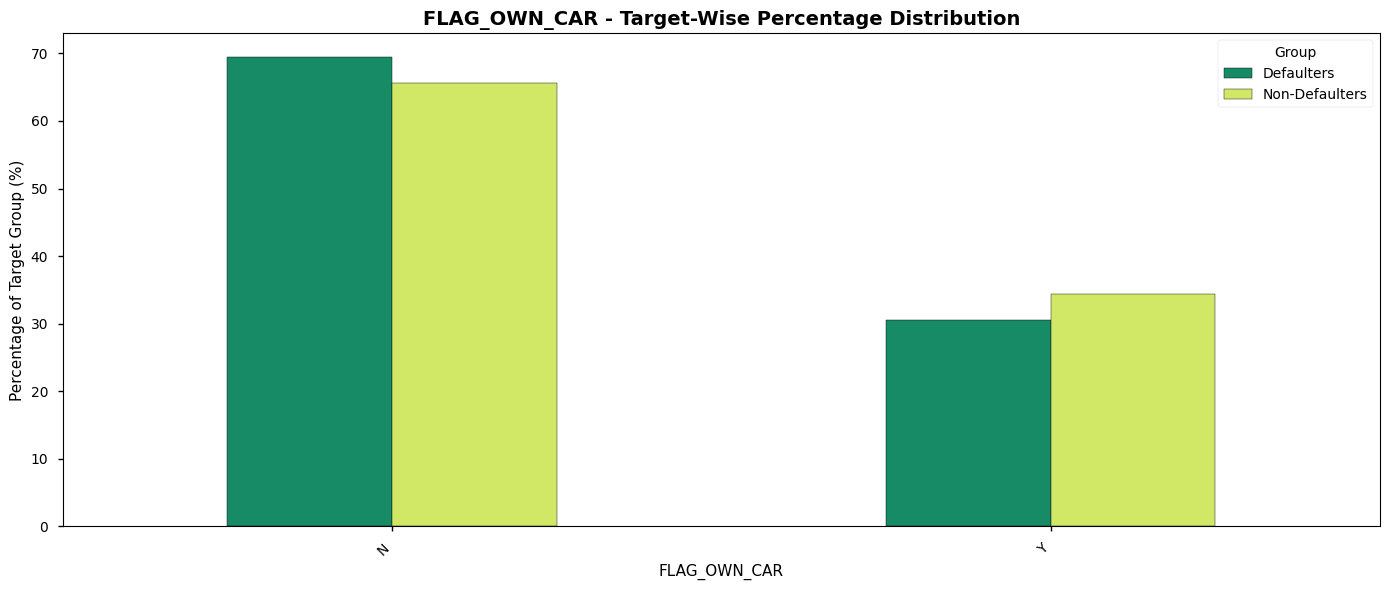

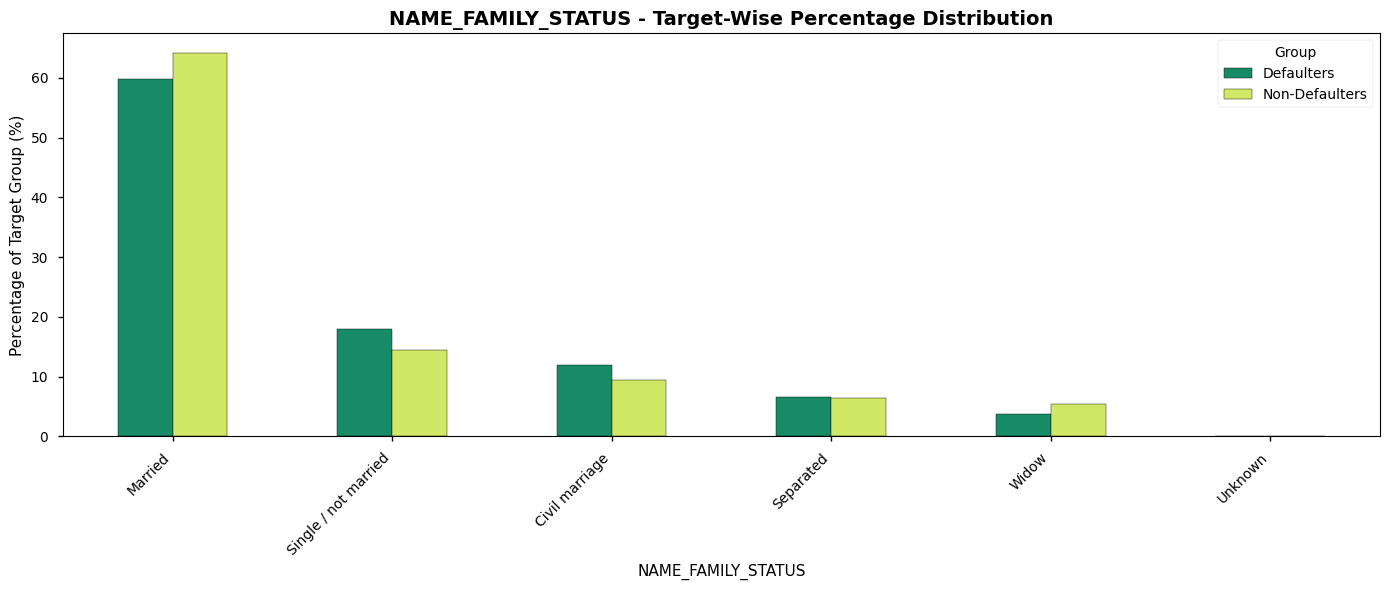

In [59]:
for col in top_cat_cols:
    plot_by_target(col,defaulters,non_defaulters)

In [60]:

import pandas as pd

def key_cat_diffs(df, target, cols):
    rows = []
    for c in cols:
        props = (df.groupby([c, target]).size()
                   .unstack(fill_value=0)
                   .pipe(lambda x: x.div(x.sum(1), 0) * 100))
        if not {0,1}.issubset(props.columns):
            continue
        diff = props[1] - props[0]
        k = diff.abs().idxmax()
        rows.append([c, k, round(props.loc[k,1],2), round(props.loc[k,0],2), round(diff.loc[k],2)])
    return (pd.DataFrame(rows, columns=["Feature","Category","Defaulter %","Non‑Defaulter %","Difference (pp)"])
              .sort_values("Difference (pp)", key=lambda s: s.abs(), ascending=False)
              .reset_index(drop=True))

# usage
key_diffs_df = key_cat_diffs(curr_data, "TARGET", cat_cols)
key_diffs_df


Feature          Category  Defaulter %  Non‑Defaulter %  \
0        NAME_INCOME_TYPE       Businessman         0.00           100.00   
1      NAME_FAMILY_STATUS           Unknown         0.00           100.00   
2     NAME_EDUCATION_TYPE   Academic degree         1.83            98.17   
3       ORGANIZATION_TYPE     Trade: type 4         3.12            96.88   
4         OCCUPATION_TYPE       Accountants         4.83            95.17   
5   IS_CURRENTLY_EMPLOYED              True         5.40            94.60   
6      NAME_CONTRACT_TYPE   Revolving loans         5.48            94.52   
7       NAME_HOUSING_TYPE  Office apartment         6.57            93.43   
8             CODE_GENDER                 F         7.00            93.00   
9            FLAG_OWN_CAR                 Y         7.24            92.76   
10        FLAG_OWN_REALTY                 Y         7.96            92.04   

    Difference (pp)  
0           -100.00  
1           -100.00  
2            -96.34  
3            -93.75  
4            -90.34  
5            -89.20  
6            -89.04  
7            -86.86  
8            -86.00  
9            -85.51  
10           -84.08

**Target-Wise Percentage Distribution — Key Observations**

* Several categorical features show **strong imbalances** between defaulters and non-defaulters.
* Largest gaps appear in *rare categories* like **Businessman**, **Unknown marital status**, and **Academic degree**, which occur almost exclusively in one class.
* **Employment type**, **education level**, and **organization type** display notable shifts in default likelihood.
* Moderate but meaningful differences are seen in **gender**, **contract type**, and **housing type**.
* Some features (e.g., car ownership) show smaller gaps and may have lower predictive impact on their own.

**Note:** For modeling, strong imbalances in rare categories may risk overfitting — these will be monitored during feature engineering and fairness checks.


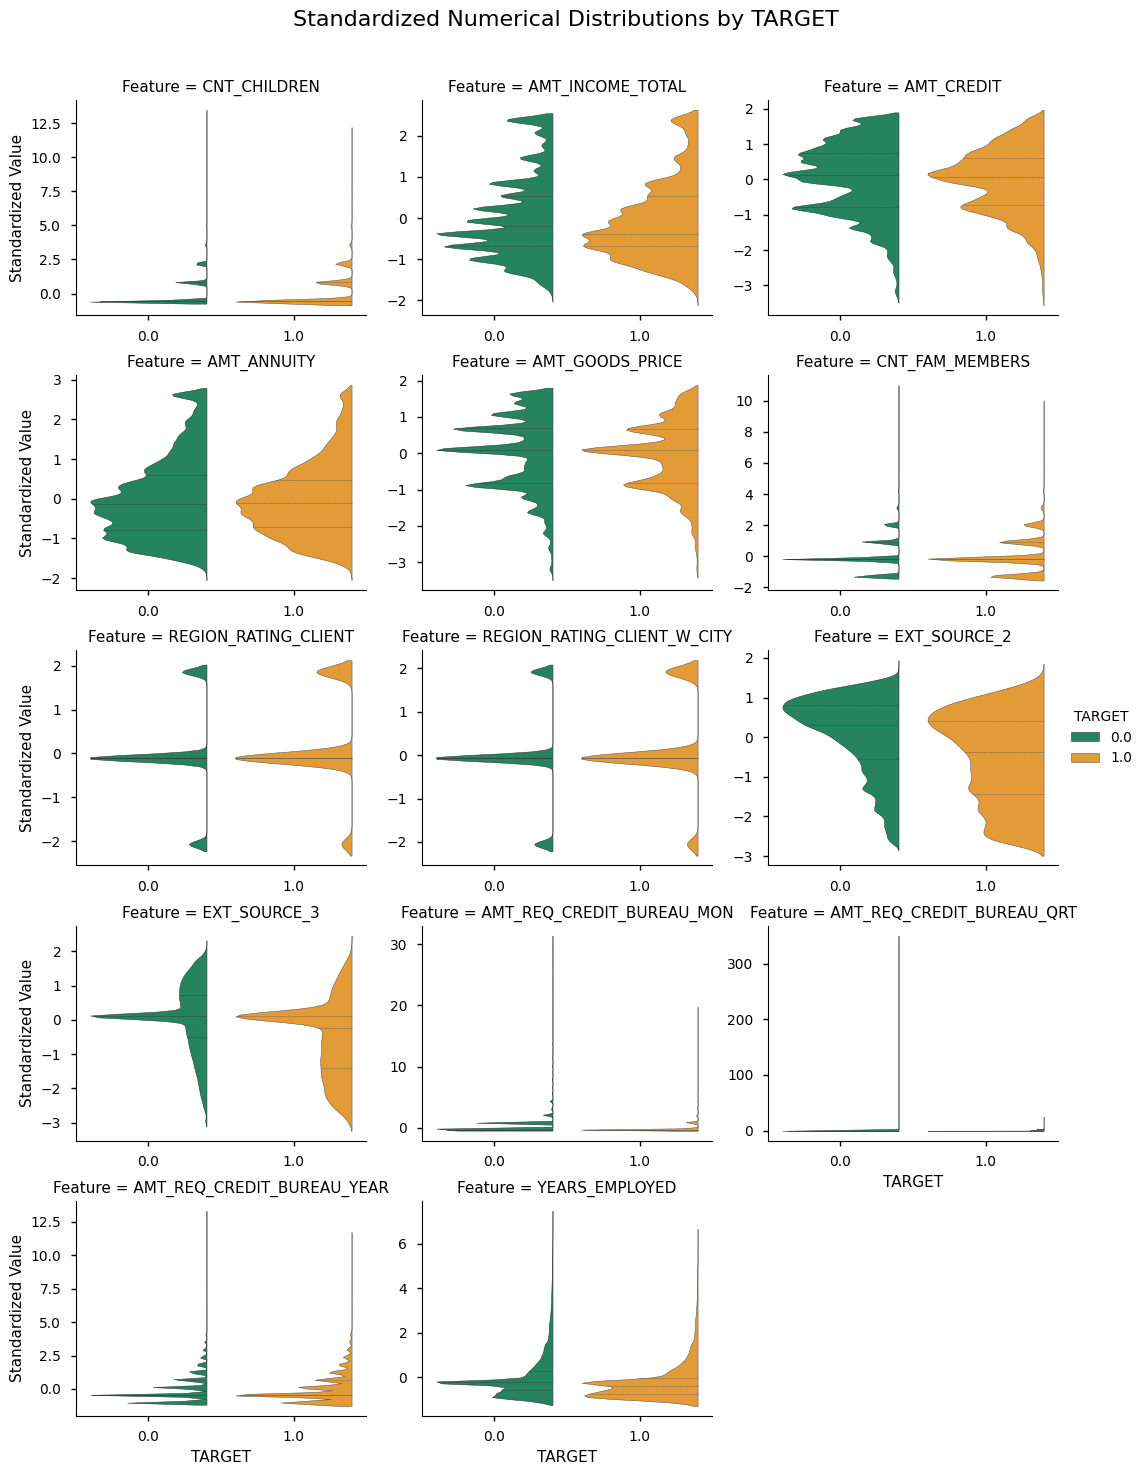

In [61]:
# Define ratio/engineered columns to exclude
ratio_cols = [
    "ANNUITY_TO_INCOME", "SAVINGS_SCORE", "FAMILY_BURDEN_INDEX",
    "AGE_TO_EMPLOYMENT", "INCOME_PER_MEMBER", "CREDIT_PER_CHILD"
]

# Filter numerical columns to exclude engineered ratios
num_cols_filtered = [col for col in num_cols if col not in ratio_cols]

# Standardize
plot_df = curr_data[["TARGET"] + num_cols_filtered].copy()
scaler = StandardScaler()
plot_df[num_cols_filtered] = scaler.fit_transform(plot_df[num_cols_filtered])

# Melt
melted = plot_df.melt(id_vars="TARGET", var_name="Feature", value_name="Standardized Value")

# FacetGrid
g = sns.FacetGrid(
    melted, col="Feature", col_wrap=3, hue="TARGET",
    sharex=False, sharey=False, height=3, aspect=1.2,
    palette=["#159364", "#FF9F1C"]
)
g.map(sns.violinplot, "TARGET", "Standardized Value", inner="quart", split=True)
g.add_legend()
g.fig.subplots_adjust(top=0.92)
g.fig.suptitle("Standardized Numerical Distributions by TARGET", fontsize=16)
plt.show()


In [62]:
# Compute tidy summary (mean/median/IQR) for TARGET=0 vs 1
stats = (curr_data.groupby("TARGET")[num_cols]
         .agg(["mean","median",lambda x: np.percentile(x,75)-np.percentile(x,25)])
         .rename(columns={"<lambda_0>":"IQR"}))

# Make it long-form and tidy
pretty = (stats.stack(0)
          .rename_axis(index=["TARGET","Feature"])
          .reset_index()
          .pivot_table(index="Feature", columns="TARGET", values=["mean","median","IQR"]))

# Ensure TARGET columns are int
pretty.columns = [f"{stat} | TARGET={int(t)}" for stat, t in pretty.columns]

# Highlight bigger separations in mean (absolute diff)
diff = (pretty["mean | TARGET=1"] - pretty["mean | TARGET=0"]).abs()

pretty_style = (pretty.style
                .format("{:,.2f}")
                .background_gradient(subset=["mean | TARGET=0","mean | TARGET=1"], cmap="Greens")
                .bar(subset=["median | TARGET=0","median | TARGET=1"], color="#FFE8C2")
                .set_caption("Summary of Key Numerical Features by TARGET")
                .set_table_styles([{"selector":"caption","props":[("caption-side","top"),
                                                                  ("font-size","16px"),
                                                                  ("font-weight","bold")]}])
                .apply(lambda s: ["background-color: #FFF3CD" if d==diff.max() else "" for d in diff],
                       axis=0, subset=["mean | TARGET=1"]))

pretty_style


**Bivariate Analysis — Detailed Observations**

Based on the preceding plots and tables:

* **TARGET imbalance:**
  Only **8.07%** of applicants are defaulters (`TARGET=1`), while **91.93%** are non-defaulters. This large class imbalance means our models must include class imbalance handling (e.g., sampling or weighted loss) to prevent bias toward the majority class.

* **Demographics:**

  * **Gender:** Females make up **65.8%** of the dataset, but males have a slightly higher default rate (**\~9.8%**) compared to females (**\~7.0%**).
  * **Age:** Defaulters are younger on average (**40.8 years**) than non-defaulters (**44.2 years**) by few years. Most applicants are between **25–55 years**.
  * **Family status:** Married individuals represent **63.9%** of customers, followed by singles (**14.8%**). Singles and separated applicants display slightly higher default rates.
  * **Number of children:** The majority have **0 or 1 child**, while households with **3+ children** have marginally higher default rates.

* **Financial profile:**

  * **Income:** Non-defaulters have a slightly higher average annual income (**163,115**) than defaulters (**157,064**). Income is right-skewed, with most in the **112,500–202,500** range.
  * **Income per family member:** Median is **75,000** for non-defaulters vs. **69,750** for defaulters — showing more financial strain in defaulting households.
  * **Credit amount:** Median credit size is similar for both (\~**13.15** in log-scale), suggesting loan size alone is not a strong predictor.
  * **Annuity-to-income ratio:** Slightly higher for defaulters (**0.1698**) than non-defaulters (**0.1638**), hinting at a heavier repayment burden.
  * **Savings score:** Median savings score is **0.281** for non-defaulters vs. **0.153** for defaulters — defaulters likely have lower financial buffers.

* **Employment profile:**

  * **Years employed:** Median of **5 years** for non-defaulters vs. **4 years** for defaulters, with non-defaulters having more long-tenure cases.
  * **Occupation type:** Jobs like *laborers* and *sales staff* show higher default risk, whereas professionals (e.g., accountants, managers) are more common among non-defaulters.
  * **Employment status:** Unemployment is notably more frequent among defaulters.

* **External risk indicators:**

  * **`EXT_SOURCE_2`**: Median **0.573** (non-defaulters) vs. **0.441** (defaulters).
  * **`EXT_SOURCE_3`**: Median **0.535** (non-defaulters) vs. **0.476** (defaulters).
    Both show clear separation, making them strong predictors of repayment behaviour.

* **Housing and assets:**

  * **Housing type:** **88.7%** live in a house/apartment. Those living with parents show slightly higher default rates.
  * **Car & property ownership:** Minor differences; property ownership is marginally higher among non-defaulters.

**Overall insight:**
Default risk is concentrated among applicants who are younger, earn less per household member, have shorter employment histories, and lower savings. The most discriminative features remain external credit bureau scores (`EXT_SOURCE_2`, `EXT_SOURCE_3`) and recent credit inquiry behaviour, while demographic attributes contribute moderate but consistent differences.

<a id="multivariate"></a>
### <p style="background-color:#0c4510;font-family:newtimeroman;font-size:100%;color:orange;text-align:center;border-radius:15px 50px; padding:7px">5.3. Multivariate Analysis</p>

[🏠 Tabel of Contents](#tabel)

In [63]:
# class imbalance metrics
target_counts = curr_data['TARGET'].value_counts()
print(target_counts)
print("Class ratio (minority/majority):", target_counts.min() / target_counts.max())

TARGET
0.0    282675
1.0     24824
Name: count, dtype: int64
Class ratio (minority/majority): 0.08781816573803838


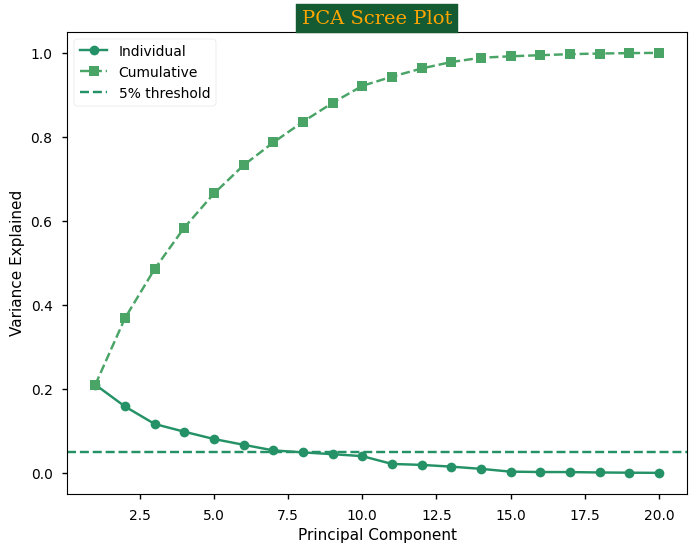

PC1: 21.03% (Cumulative: 21.03%)
PC2: 15.85% (Cumulative: 36.88%)
PC3: 11.69% (Cumulative: 48.58%)
PC4: 9.85% (Cumulative: 58.42%)
PC5: 8.11% (Cumulative: 66.53%)
PC6: 6.74% (Cumulative: 73.27%)
PC7: 5.41% (Cumulative: 78.68%)
PC8: 4.93% (Cumulative: 83.61%)
PC9: 4.50% (Cumulative: 88.11%)
PC10: 4.04% (Cumulative: 92.15%)
PC11: 2.18% (Cumulative: 94.33%)
PC12: 1.96% (Cumulative: 96.28%)
PC13: 1.54% (Cumulative: 97.82%)
PC14: 1.02% (Cumulative: 98.84%)
PC15: 0.35% (Cumulative: 99.19%)
PC16: 0.26% (Cumulative: 99.44%)
PC17: 0.24% (Cumulative: 99.69%)
PC18: 0.15% (Cumulative: 99.84%)
PC19: 0.10% (Cumulative: 99.94%)
PC20: 0.06% (Cumulative: 100.00%)


In [64]:
#2. PCA on subset dataset as we are concered for descriptive analysis for now.
X_num = curr_data[num_cols].copy()

# 5) Scale
X_num_scaled = StandardScaler().fit_transform(X_num)

# 6) PCA + scree
pca_full = PCA()
pca_full.fit(X_num_scaled)

explained = pca_full.explained_variance_ratio_
cum_expl = np.cumsum(explained)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(range(1, len(explained)+1), explained, 'o-', label='Individual')
plt.plot(range(1, len(cum_expl)+1), cum_expl, 's--', label='Cumulative')
plt.axhline(y=0.05, linestyle='--', label='5% threshold')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.title('PCA Scree Plot', fontdict=FONT)
plt.legend()
plt.show()

for i, (v, c) in enumerate(zip(explained, cum_expl), 1):
    print(f"PC{i}: {v:.2%} (Cumulative: {c:.2%})")


We will 10 PCs as they capture almost 90% of the variance of our dataset and will further do the analysis

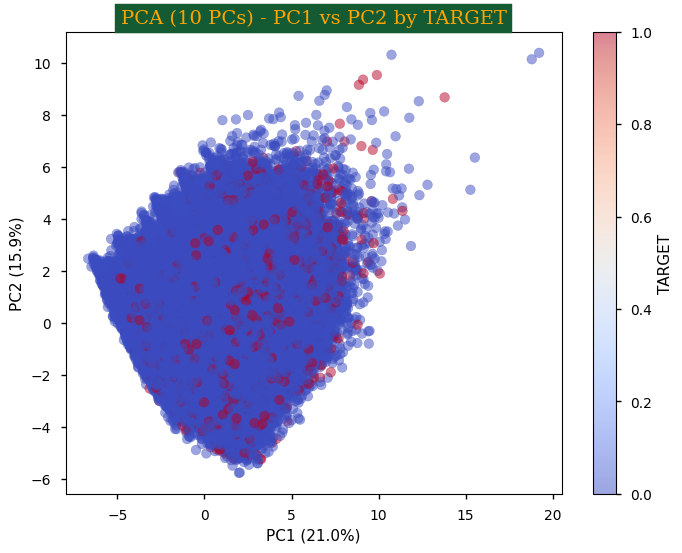

In [65]:
# --------------------
# 3. PCA with 10 components
# --------------------
pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)

# Plot PC1 vs PC2 colored by TARGET
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=curr_data['TARGET'], cmap='coolwarm', alpha=0.5)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
plt.title("PCA (10 PCs) - PC1 vs PC2 by TARGET", fontdict=FONT)
plt.colorbar(label='TARGET')
plt.show()

The first two principal components explain ~29% of the total variance. The scatter shows no strong separation between defaulters and non-defaulters in this reduced space, suggesting that the distinction between the classes is spread across multiple components rather than concentrated in a single linear combination of features.

In [66]:
# Step 1: PCA (10 Components)

pca = PCA(n_components=10, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)

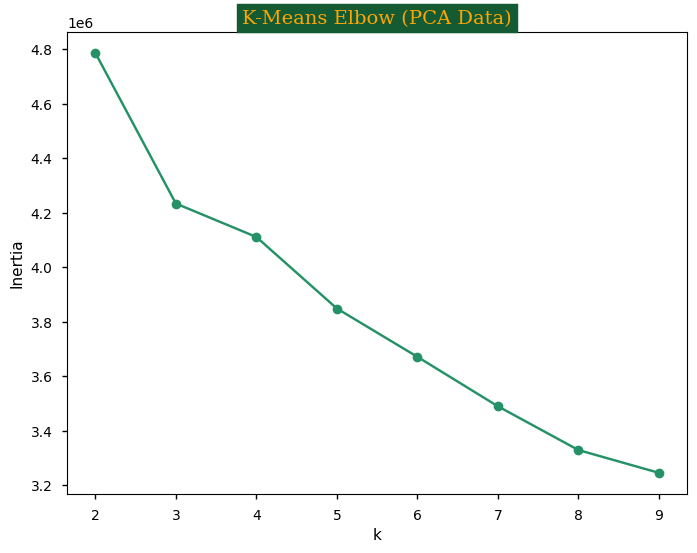

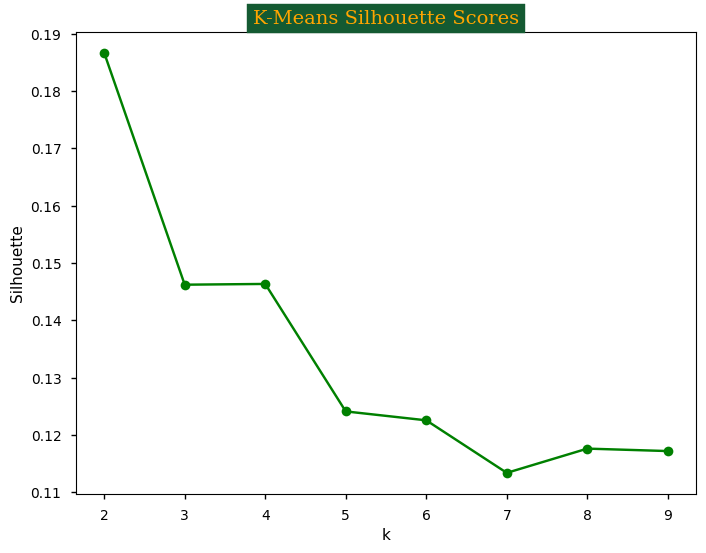

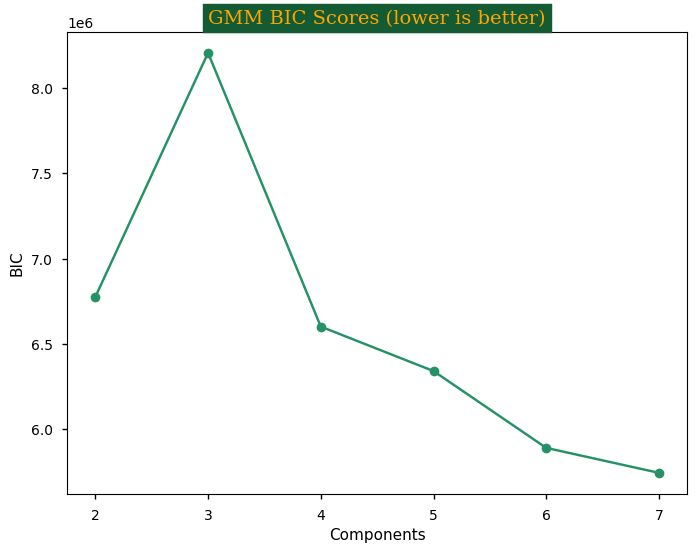

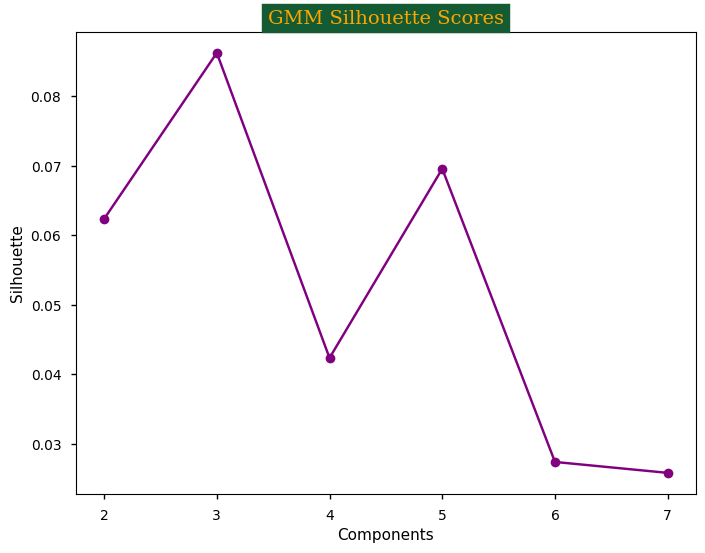

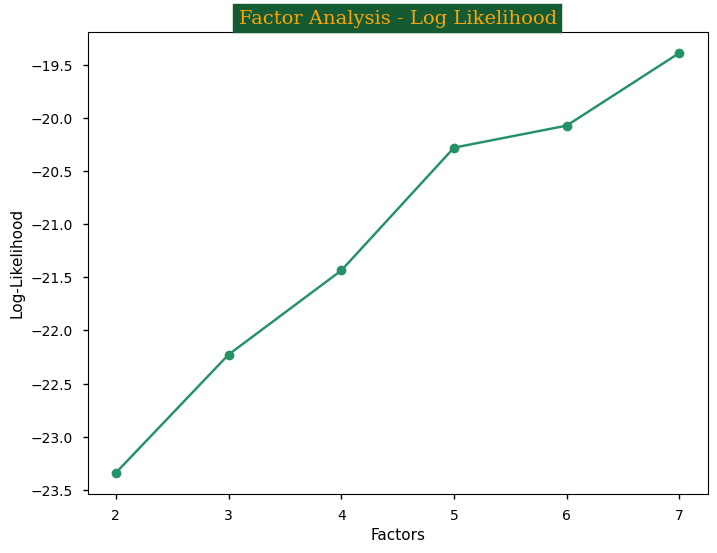

In [ ]:
# Step 2: GPU-accelerated K-Means (2–9)

inertia = []
silhouette = []
K_range = range(2, 10)

for k in K_range:
    km = cuKMeans(n_clusters=k, n_init=5, random_state=42)
    labels = km.fit_predict(X_pca)
    inertia.append(float(km.inertia_))
    silhouette.append(silhouette_score(X_pca, labels))

# Plot Elbow
plt.figure(figsize=(8,6))
plt.plot(K_range, inertia, 'o-')
plt.title("K-Means Elbow (PCA Data)", fontdict=FONT)
plt.xlabel("k"); plt.ylabel("Inertia")
plt.show()

# Plot Silhouette
plt.figure(figsize=(8,6))
plt.plot(K_range, silhouette, 'o-', color='green')
plt.title("K-Means Silhouette Scores", fontdict=FONT)
plt.xlabel("k"); plt.ylabel("Silhouette")
plt.show()

# Step 3: Model-Based Clustering (GMM)

bic_scores = []
silhouette_scores = []
components_range = range(2, 8)

for k in components_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_pca)
    labels = gmm.predict(X_pca)
    bic_scores.append(gmm.bic(X_pca))
    silhouette_scores.append(silhouette_score(X_pca, labels))

# Plot BIC
plt.figure(figsize=(8,6))
plt.plot(components_range, bic_scores, 'o-')
plt.title("GMM BIC Scores (lower is better)", fontdict=FONT)
plt.xlabel("Components"); plt.ylabel("BIC")
plt.show()

# Plot GMM Silhouette
plt.figure(figsize=(8,6))
plt.plot(components_range, silhouette_scores, 'o-', color='purple')
plt.title("GMM Silhouette Scores", fontdict=FONT)
plt.xlabel("Components"); plt.ylabel("Silhouette")
plt.show()

# Step 4: Factor Analysis (2–7 factors)

fa_scores = []
fa_range = range(2, 8)

for n in fa_range:
    fa = FactorAnalysis(n_components=n, random_state=42)
    fa.fit(X_num_scaled)
    fa_scores.append(fa.score(X_num_scaled))

# Plot FA Log-likelihood
plt.figure(figsize=(8,6))
plt.plot(fa_range, fa_scores, 'o-')
plt.title("Factor Analysis - Log Likelihood", fontdict=FONT)
plt.xlabel("Factors"); plt.ylabel("Log-Likelihood")
plt.show()

K-Means and GMM both point toward 3 clusters and 6 components respectively as a reasonable choice for segmentation, balancing separation and model complexity. Factor analysis indicates that 5 key factors underlie the data’s structure and good interpretability , aligning with domain expectations  of multi-dimensional credit risk profiles.

We will fit these analysis techniques (K-means, GMM and FA) using the currently fitted PCA data.

🔹 Default rate per KMeans cluster:
KMeans_Cluster
0    0.090989
1    0.060276
2    0.093891
Name: TARGET, dtype: float64


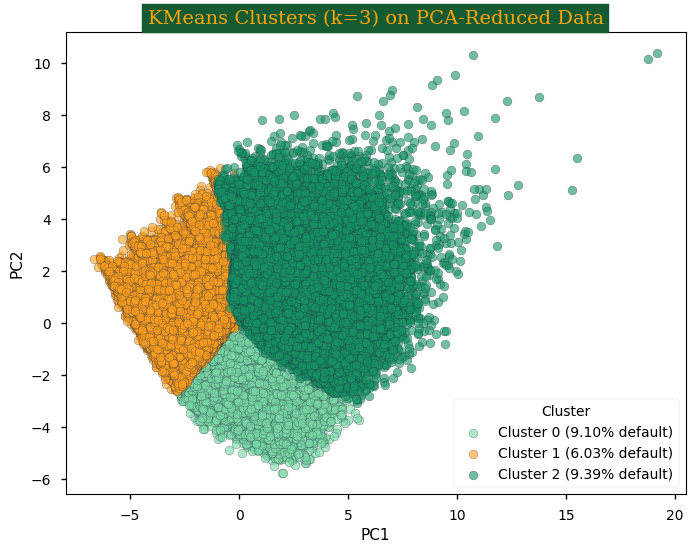


🔸 Default rate per GMM cluster:
GMM_Cluster
0    0.067881
1    0.077567
2    0.075412
3    0.060614
4    0.094990
5    0.080200
Name: TARGET, dtype: float64


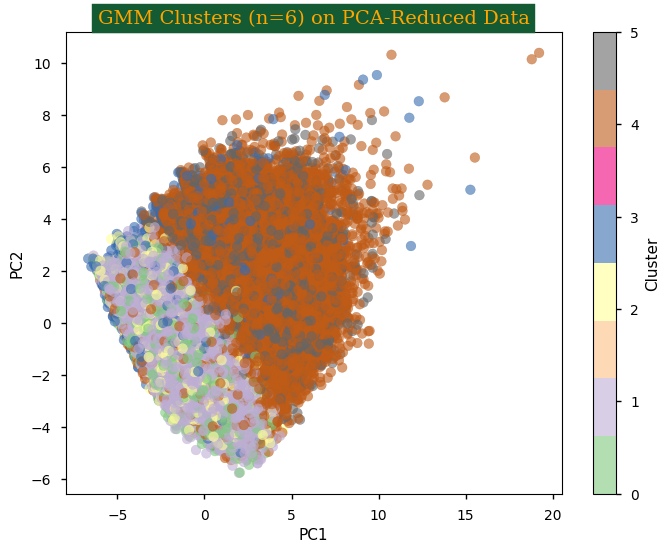

In [68]:
np.random.seed(24212842)

# Define colors
cluster_colors = ['#7AD9A6',  # mint
                  '#FF9F1C',  # coral
                  '#159364']  # teal

# KMeans with k = 3
kmeans = cuKMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_pca)
curr_data['KMeans_Cluster'] = kmeans_labels

# Default rate by KMeans cluster
print("🔹 Default rate per KMeans cluster:")
print(curr_data.groupby('KMeans_Cluster')['TARGET'].mean())

# Plot PCA-reduced clusters
plt.figure(figsize=(8,6))
for cluster_id, color in enumerate(cluster_colors):
    mask = (kmeans_labels == cluster_id)
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1],
                color=color, alpha=0.6, edgecolor="#233142", s=40,
                label=f"Cluster {cluster_id} ({curr_data.loc[mask,'TARGET'].mean():.2%} default)")

plt.title("KMeans Clusters (k=3) on PCA-Reduced Data", fontdict=FONT)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()




# GMM with n = 6
gmm = GaussianMixture(n_components=6, random_state=42)
gmm_labels = gmm.fit_predict(X_pca)
curr_data['GMM_Cluster'] = gmm_labels

# Default rate by GMM cluster
print("\n🔸 Default rate per GMM cluster:")
print(curr_data.groupby('GMM_Cluster')['TARGET'].mean())

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=gmm_labels, cmap='Accent', alpha=0.6)
plt.title("GMM Clusters (n=6) on PCA-Reduced Data", fontdict=FONT)
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.colorbar(label='Cluster')
plt.show()




**Cluster Analysis — Key Insights**

* **K-Means (k=3):** Clear boundaries. One cluster stands out as **low-risk (6%)**, while the other two show **higher default rates (\~9%)** despite looking separate.

* **GMM (n=6):** Overlapping clusters but **more fine-grained** numerically. Two groups are **low-risk (\~6%)**, three are **medium-risk (7–8%)**, and one is clearly **high-risk (9.5%)**.

* **Takeaway:**
  * K-Means is clearer visually, GMM is richer numerically.
  * *K-Means* = simple, broad segmentation (easy for business rules).
  * *GMM* = nuanced segmentation (better for tailoring risk strategies).



In [69]:
random.seed(24212842)
# Fit final FA model with 4 factors
fa_final = FactorAnalysis(n_components=4, random_state=42)
X_fa = fa_final.fit_transform(X_num_scaled)

# Loadings: how much each original feature contributes to each factor
loadings = pd.DataFrame(fa_final.components_.T, index=num_cols)

# Print top features per factor
for i in range(4):
    print(f"\nFactor {i+1} — Top Features:")
    print(loadings[i].abs().sort_values(ascending=False).head(5))



Factor 1 — Top Features:
SAVINGS_SCORE                  0.999668
EXT_SOURCE_2                   0.743213
EXT_SOURCE_3                   0.691503
REGION_RATING_CLIENT           0.209541
REGION_RATING_CLIENT_W_CITY    0.205947
Name: 0, dtype: float64

Factor 2 — Top Features:
AMT_CREDIT           0.987969
AMT_GOODS_PRICE      0.987462
AMT_ANNUITY          0.793618
AMT_INCOME_TOTAL     0.424991
ANNUITY_TO_INCOME    0.417711
Name: 1, dtype: float64

Factor 3 — Top Features:
CNT_CHILDREN           0.984845
CREDIT_PER_CHILD       0.940964
CNT_FAM_MEMBERS        0.898289
FAMILY_BURDEN_INDEX    0.713854
INCOME_PER_MEMBER      0.450280
Name: 2, dtype: float64

Factor 4 — Top Features:
AMT_INCOME_TOTAL               0.844484
ANNUITY_TO_INCOME              0.669275
INCOME_PER_MEMBER              0.645738
FAMILY_BURDEN_INDEX            0.456942
REGION_RATING_CLIENT_W_CITY    0.243172
Name: 3, dtype: float64



**Varimax Factor Analysis — Interpretation**

Using Factor Analysis on numeric features, we extracted **4 interpretable latent dimensions**:


* **Factor 1 — Savings & External Creditworthiness**
  High loadings on `SAVINGS_SCORE`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`.
  
  It captures applicants’ **financial resilience** and **external risk scores**.

* **Factor 2 — Loan & Repayment Burden**
  
  Driven by `AMT_CREDIT`, `AMT_GOODS_PRICE`, and `AMT_ANNUITY`.
  
  It represents **total financial obligations** and repayment pressure.

* **Factor 3 — Household & Family Burden**
  
  Dominated by `CNT_CHILDREN`, `CREDIT_PER_CHILD`, and `CNT_FAM_MEMBERS`.
  
  It reflects **economic strain from dependents**.

* **Factor 4 — Income Capacity**
  
  Strongly tied to `AMT_INCOME_TOTAL`, `ANNUITY_TO_INCOME`, and `INCOME_PER_MEMBER`.
  
  It captures **earning power relative to obligations**, with a mild regional influence.





In [70]:
# Add FA results to your main dataframe with custom names
factor_names = [
    "Financial_Pressure",
    "Regional_Risk_Profile",
    "Household_Size",
    "Age_Employment_Stability"
]

for i, name in enumerate(factor_names):
    curr_data[name] = X_fa[:, i]

curr_data.head()
list1 = []
list1 = curr_data.head().T
list1[-4:]

0         1         2         3         4
Financial_Pressure       -1.642341  0.473248  0.953367  0.559429 -0.674582
Regional_Risk_Profile     0.023438 -1.392697  1.814837  0.583433 -0.262465
Household_Size           -0.789748 -0.552141 -0.630559 -0.527285 -0.695345
Age_Employment_Stability -0.979686 -0.828424  0.431301  0.287022   0.38383

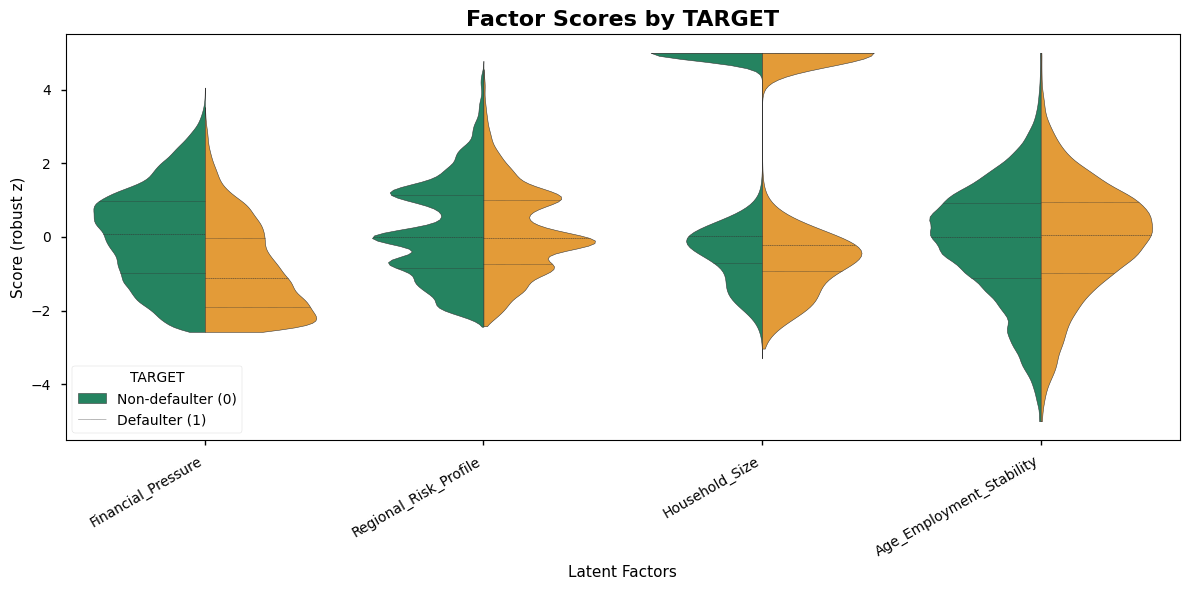

In [71]:
from pickle import TRUE

# Only TARGET + Factors
df = curr_data[["TARGET"] + factor_names].copy()

# numeric check
for c in factor_names:
    df[c] = pd.to_numeric(df[c], errors="coerce")

# robust-scale per factor so violins are comparable
ROBUST = TRUE
if ROBUST:
    for c in factor_names:
        s = df[c]
        med = s.median()
        mad = (s - med).abs().median()
        df[c] = ((s - med) / (mad + 1e-9)).clip(-5, 5)

# melt and plot
melted = df.melt(id_vars="TARGET", value_vars=factor_names,
                 var_name="Factor", value_name="Score").dropna()

plt.figure(figsize=(12, 6))
sns.violinplot(
    data=melted, x="Factor", y="Score", hue="TARGET",
    split=True, inner="quart", cut=0, scale="width",
    palette=["#159364", "#FF9F1C"]
)
plt.title("Factor Scores by TARGET", fontsize=16, weight="bold")
plt.xlabel("Latent Factors"); plt.ylabel("Score" + (" (robust z)" if ROBUST else ""))
plt.xticks(rotation=30, ha="right")
plt.legend(title="TARGET", labels=["Non-defaulter (0)", "Defaulter (1)"])
plt.tight_layout(); plt.show()


This plot tells us which latent factors are most predictive of default risk.

1.   Defaulters skew lower on Savings & External Creditworthiness.

2.   Defaulters skew higher on Loan & Repayment Burden.

3.   Household burden has more overlap, but tails suggest higher stress for defaulters.

4.   Income Capacity is lower for defaulters compared to non-defaulters.






In [ ]:
random.seed(24212842)

# Define SUMMER palette for factors
FACTOR_COLORS = ['#7AD9A6',  # mint
                 '#FF9F1C',  # coral
                 '#159364',  # teal
                 '#FFD166']  # gold

# Melt the factor columns for seaborn
melted = curr_data.melt(id_vars='KMeans_Cluster', value_vars=factor_names,
                        var_name='Factor', value_name='Value')

# Plot: average factor score per cluster
plt.figure(figsize=(9, 6))
sns.barplot(
    data=melted,
    x='KMeans_Cluster',
    y='Value',
    hue='Factor',
    palette=FACTOR_COLORS,
    errorbar=None
)

plt.title("Average Factor Scores per KMeans Cluster", fontsize=14, fontweight="bold")
plt.xlabel("KMeans Cluster", fontsize=12, fontweight="bold")
plt.ylabel("Average Factor Score", fontsize=12, fontweight="bold")

plt.legend(
    title='Factor',
    fontsize=10,
    title_fontsize=11,
    frameon=False
)

plt.axhline(0, color="#233142", linestyle="--", linewidth=1)  # add neutral line
plt.tight_layout()
plt.show()


In [ ]:
random.seed(24212842)
summary = curr_data.groupby('KMeans_Cluster').agg({
    'TARGET': ['count', 'mean'],
    **{col: 'mean' for col in factor_names}
})

summary.columns = ['Count', 'Default Rate'] + factor_names
summary['Risk Label'] = pd.qcut(summary['Default Rate'], q=3, labels=['Low', 'Medium', 'High'])

# Optional: Round for nicer viewing
summary = summary.round(3)

import pandas as pd
from IPython.display import display
display(summary)


Count  Default Rate  Financial_Pressure  \
KMeans_Cluster                                             
0               125311         0.092              -0.227   
1               103114         0.057               0.363   
2                79074         0.094              -0.114   

                Regional_Risk_Profile  Household_Size  \
KMeans_Cluster                                          
0                               0.589          -0.571   
1                              -0.813          -0.428   
2                               0.127           1.462   

                Age_Employment_Stability Risk Label  
KMeans_Cluster                                       
0                                  0.204     Medium  
1                                 -0.301        Low  
2                                  0.070       High

**Cluster Profiles with Default Risk**

* **Cluster 0 – Loan-Heavy Borrowers (Default Rate ≈ 9.1%)**

  These applicants carry **high repayment burdens** and moderate income support, but weak savings. Their elevated defaults are mainly driven by **large credit obligations relative to earnings**.


* **Cluster 1 – Strained but Creditworthy (Default Rate ≈ 6.0%)**

  Despite **better external credit scores and savings**, this group struggles with **high loan and repayment pressure**. They show the **lowest default rate**, suggesting resilience, but remain vulnerable if obligations increase.


* **Cluster 2 – Family-Burdened Households (Default Rate ≈ 9.4%)**
  
  Applicants here are weighed down by **large household and family responsibilities**, even without big loans. This results in the **highest default rate**, pointing to **dependents as a key driver of financial risk**.


In short: **Cluster 2 is riskiest (family load), Cluster 0 is also risky (loan-heavy), while Cluster 1 shows relative resilience despite repayment pressure.**


In [ ]:
# GMM Cluster Summary
gmm_summary = curr_data.groupby("GMM_Cluster").agg({
    'TARGET': ['count', 'mean'],
    'Financial_Pressure': 'mean',
    'Regional_Risk_Profile': 'mean',
    'Household_Size': 'mean',
    'Age_Employment_Stability': 'mean'
}).reset_index()


# Rename columns for clarity
gmm_summary.columns = ['GMM_Cluster', 'Count', 'Default_Rate', 'Financial_Pressure', 'Regional_Risk_Profile', 'Household_Size', 'Age_Employment_Stability']

# Assign risk labels based on Default Rate
gmm_summary["Risk_Label"] = pd.cut(
    gmm_summary["Default_Rate"],
    bins=[-1, 0.07, 0.09, 1],
    labels=["Low", "Medium", "High"]
)
gmm_summary = gmm_summary.round(3)

# Print
display(gmm_summary)

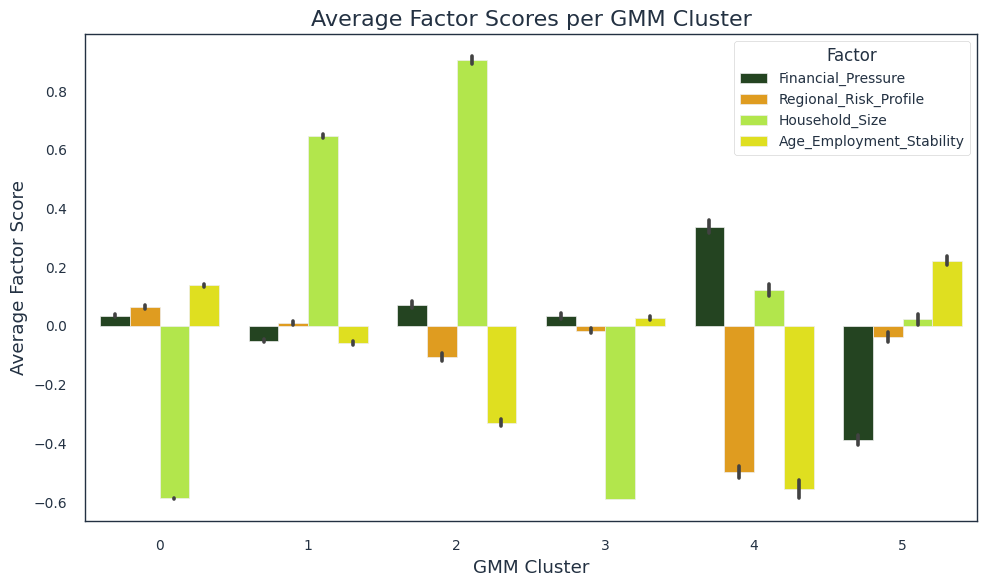

In [ ]:
# Melt for seaborn barplot
gmm_melted = curr_data.melt(
    id_vars="GMM_Cluster",
    value_vars=factor_names,
    var_name="Factor",
    value_name="Score"
)

# Plot average factor scores per cluster
plt.figure(figsize=(10, 6))
sns.barplot(data=gmm_melted, x="GMM_Cluster", y="Score", hue="Factor")
plt.title("Average Factor Scores per GMM Cluster", fontsize=16)
plt.xlabel("GMM Cluster")
plt.ylabel("Average Factor Score")
plt.legend(title="Factor")
plt.tight_layout()
plt.show()


**Three Risk Segments using Gaussian Mixture Model**

* **Low Risk (Clusters 0 & 3 | \~6.4% default)** -
  Applicants with **strong financial buffers**, lower regional risk, and **low family burden**. Represent the safest group.

* **Medium Risk (Clusters 1, 2 & 5 | \~7.8% default)** -
  The majority of applicants. They show **moderate household/family obligations** and **average employment stability**. Default risk is slightly above baseline but not alarming.

* **High Risk (Cluster 4 | 9.5% default)** -
  Defined by **heavy household & family burden**, which outweighs their income capacity. This group carries the greatest probability of default.


# Use of ```Previous Application Data```



After many experiements, cleaned the previous_application similar to how we cleaned the application dataset. And the process was combined as did not want to flood the notebook.

In [72]:
def clean_previous_application(filepath,
                               null_thresh_first=0.40,
                               null_thresh_second=0.30):
    """Load and clean previous_application data (minimal comments)."""
    df = pd.read_csv(filepath)

    # Drop columns with too many NaNs
    na_pct = df.isnull().mean()
    df = df.drop(columns=na_pct[na_pct >= null_thresh_first].index, errors="ignore")

    # Drop specific columns used in notebook
    drop_cols_1 = [
        'FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START',
        'NFLAG_LAST_APPL_IN_DAY', 'WEEKDAY_APPR_PROCESS_START'
    ]
    df = df.drop(columns=[c for c in drop_cols_1 if c in df.columns], errors="ignore")

    # Replace codes with NaN
    df = df.replace({'XNA': np.nan, 'XPA': np.nan})

    # Drop some high-null categoricals
    drop_cols_2 = [
        'NAME_PRODUCT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_SELLER_INDUSTRY',
        'NAME_CASH_LOAN_PURPOSE', 'NAME_PAYMENT_TYPE'
    ]
    df = df.drop(columns=[c for c in drop_cols_2 if c in df.columns], errors="ignore")

    # Remove rows where all three key amounts are NaN
    trio = ['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'CNT_PAYMENT']
    have = [c for c in trio if c in df.columns]
    if len(have) == 3:
        mask_all_nan = df[have].isna().all(axis=1)
        df = df.loc[~mask_all_nan].copy()

    # Impute AMT_ANNUITY with mean and cap upper whisker
    if 'AMT_ANNUITY' in df.columns:
        df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(df['AMT_ANNUITY'].mean())
        q1 = df['AMT_ANNUITY'].quantile(0.25)
        q3 = df['AMT_ANNUITY'].quantile(0.75)
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        df['AMT_ANNUITY'] = np.where(df['AMT_ANNUITY'] > upper, upper, df['AMT_ANNUITY'])

    # Drop NaNs in AMT_GOODS_PRICE and AMT_CREDIT (as done in notebook)
    for col in ['AMT_GOODS_PRICE', 'AMT_CREDIT']:
        if col in df.columns:
            df = df.loc[~df[col].isna()].copy()

    # Impute CNT_PAYMENT with mean
    if 'CNT_PAYMENT' in df.columns:
        df['CNT_PAYMENT'] = df['CNT_PAYMENT'].fillna(df['CNT_PAYMENT'].mean())

    # IQR capping (both sides) for selected columns
    caps = ['AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT', 'DAYS_DECISION']
    for col in [c for c in caps if c in df.columns]:
        s = df[col]
        if pd.api.types.is_numeric_dtype(s):
            q1, q3 = s.quantile(0.25), s.quantile(0.75)
            iqr = q3 - q1
            lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
            df[col] = np.clip(s, lower, upper)

    return df


In [73]:
prev = clean_previous_application("/content/drive/MyDrive/Colab Notebooks/previous_application.csv")
prev.shape

(1284699, 17)

In [74]:
def prev_aggregation(prev_df):
    key = 'SK_ID_CURR'
    # status counts
    if {'NAME_CONTRACT_STATUS','SK_ID_PREV'}.issubset(prev_df.columns):
        st = (prev_df.groupby([key, 'NAME_CONTRACT_STATUS'])
                    .size()
                    .unstack(fill_value=0))
        st = st.rename(columns={
            'Approved':'APPROVED_COUNT',
            'Refused':'REFUSED_COUNT',
            'Canceled':'CANCELED_COUNT',
            'Unused offer':'UNUSED_OFFER_COUNT'
        })
        st = st.add_prefix('PREV_')
        st['PREV_APP_COUNT'] = st.sum(axis=1).astype('int32')
        status_ct = st.reset_index()
    else:
        status_ct = prev_df[[key]].drop_duplicates().copy()
        status_ct['PREV_APP_COUNT'] = 0

    # numeric aggs (keep essentials)
    num_cols = ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_APPLICATION','CNT_PAYMENT','DAYS_DECISION']
    num_cols = [c for c in num_cols if c in prev_df.columns]
    agg_map = {c: ['mean','max','sum'] if c in ['AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','AMT_APPLICATION']
               else ['mean','max'] for c in num_cols}
    if num_cols:
        num = prev_df.groupby(key).agg(agg_map)
        num.columns = [f"PREV_{col.upper()}_{stat.upper()}" for col, stat in num.columns]
        num = num.reset_index()
    else:
        num = pd.DataFrame({key: prev_df[key].unique()})

    prev_agg = status_ct.merge(num, on=key, how='left')

    # ratios
    if {'PREV_APPROVED_COUNT','PREV_APP_COUNT'}.issubset(prev_agg.columns):
        prev_agg['PREV_APPROVED_RATIO'] = np.where(prev_agg['PREV_APP_COUNT']==0, np.nan,
                                                   prev_agg['PREV_APPROVED_COUNT']/prev_agg['PREV_APP_COUNT'])
    if {'PREV_REFUSED_COUNT','PREV_APP_COUNT'}.issubset(prev_agg.columns):
        prev_agg['PREV_REFUSED_RATIO'] = np.where(prev_agg['PREV_APP_COUNT']==0, np.nan,
                                                  prev_agg['PREV_REFUSED_COUNT']/prev_agg['PREV_APP_COUNT'])
    if {'PREV_AMT_ANNUITY_MEAN','PREV_AMT_CREDIT_MEAN'}.issubset(prev_agg.columns):
        prev_agg['PREV_ANNUITY_CREDIT_RATIO_MEAN'] = np.where(prev_agg['PREV_AMT_CREDIT_MEAN']==0, np.nan,
                                                              prev_agg['PREV_AMT_ANNUITY_MEAN']/prev_agg['PREV_AMT_CREDIT_MEAN'])
    if {'PREV_AMT_GOODS_PRICE_MEAN','PREV_AMT_CREDIT_MEAN'}.issubset(prev_agg.columns):
        prev_agg['PREV_GOODS_CREDIT_RATIO_MEAN'] = np.where(prev_agg['PREV_AMT_CREDIT_MEAN']==0, np.nan,
                                                            prev_agg['PREV_AMT_GOODS_PRICE_MEAN']/prev_agg['PREV_AMT_CREDIT_MEAN'])

    # light dtypes
    for c in prev_agg.select_dtypes(include=['float64']).columns:
        prev_agg[c] = prev_agg[c].astype('float32')

    return prev_agg

# Aggregate
prev_agg = prev_aggregation(prev)

# 3) Merge into base app
final_df = curr_data.merge(prev_agg, on="SK_ID_CURR", how="left")


In [75]:
print("Merged shape:", final_df.shape)
final_df.head()


Merged shape: (307499, 65)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0    100002.0     1.0         Cash loans           M            N   
1    100003.0     0.0         Cash loans           F            N   
2    100004.0     0.0    Revolving loans           M            Y   
3    100006.0     0.0         Cash loans           F            N   
4    100007.0     0.0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y           0.0          202500.0   12.915581      24700.5   
1               N           0.0          270000.0   14.072865      35698.5   
2               Y           0.0           67500.0   11.813037       6750.0   
3               Y           0.0          135000.0   12.652947      29686.5   
4               Y           0.0          121500.0   13.148033      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0        12.768544          Working  Secondary / secondary special   
1        13.937287    State servant               Higher education   
2        11.813037          Working  Secondary / secondary special   
3        12.601491          Working  Secondary / secondary special   
4        13.148033          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0  Single / not married  House / apartment        Laborers              1.0   
1               Married  House / apartment      Core staff              2.0   
2  Single / not married  House / apartment        Laborers              1.0   
3        Civil marriage  House / apartment        Laborers              2.0   
4  Single / not married  House / apartment      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY       ORGANIZATION_TYPE  \
0                   2.0                          2.0  Business Entity Type 3   
1                   1.0                          1.0                  School   
2                   2.0                          2.0              Government   
3                   2.0                          2.0  Business Entity Type 3   
4                   2.0                          2.0                Religion   

   EXT_SOURCE_2  EXT_SOURCE_3  AMT_REQ_CREDIT_BUREAU_MON  \
0      0.262949      0.139376                        0.0   
1      0.622246      0.535276                        0.0   
2      0.555912      0.729567                        0.0   
3      0.650442      0.535276                        0.0   
4      0.322738      0.535276                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  AGE  YEARS_EMPLOYED  \
0                        0.0                         1.0   26             2.0   
1                        0.0                         0.0   46             3.0   
2                        0.0                         0.0   52             1.0   
3                        0.0                         1.0   52             8.0   
4                        0.0                         0.0   55             8.0   

   IS_CURRENTLY_EMPLOYED  ANNUITY_TO_INCOME  SAVINGS_SCORE  \
0                  False           0.121977       0.036649   
1                  False           0.132216       0.333073   
2                  False           0.099999       0.405575   
3                  False           0.219898       0.348166   
4                  False           0.179961       0.172754   

   FAMILY_BURDEN_INDEX  AGE_TO_EMPLOYMENT  INCOME_PER_MEMBER  \
0             0.000005           8.666667           202500.0   
1             0.000007          11.500000           135000.0   
2             0.000015          26.000000            67500.0   
3             0.000015           5.777778            67500.0   
4             0.000008           6.111111           121500.0   

   CREDIT_PER_CHILD  KMeans_Cluster  GMM_Cluster  Financial_Pressure  \
0         12.915581               0            1           -1.64

<a id="model"></a>
# <p style="background-color:#0c4510;font-family:newtimeroman;font-size:120%;color:orange;text-align:center;border-radius:15px 50px; padding:7px">6. Models and Improve Models</p>

[🏠 Tabel of Contents](#tabel)

**Modeling Approach**

Developed a unified pipeline that integrates preprocessing, class imbalance handling, and model optimization. The pipeline supports **Logistic Regression, SVM, XGBoost, and LightGBM**, with optional hybrid resampling (undersampling + ensemble).

Model training was guided by two key metrics:

* **Average Recall (primary)** – prioritized to capture as many defaulters as possible, reflecting the business risk objective.
* **Average Precision (secondary)** – monitored to ensure stability under strong class imbalance.

Thresholds were tuned **out-of-fold** to maximize recall while maintaining reasonable precision. Built two custom python packages; Optuna.py used for hyperparameter tuning search, and MLflow.py tracked experiments for reproducibility.



In [76]:
try:
    from thundersvm import SVC as TSVC
    HAVE_TSVMC = True
    print("ThunderSVM available:", HAVE_TSVMC)
except Exception:
    TSVC = None
    HAVE_TSVMC = False

ThunderSVM available: True


In [77]:
!cp "/content/drive/MyDrive/Colab Notebooks/ML_modeling.py" /content

In [78]:
!cp "/content/drive/MyDrive/Colab Notebooks/optuna_package.py" /content

[I 2025-08-22 20:07:25,708] Using an existing study with name 'SVM_macro_recall_atP' instead of creating a new one.


[SVM] Already completed 20 trials; skipping optimize().


[I 2025-08-22 20:07:25,748] [SVM] Already completed 20 trials; skipping optimize().
[I 2025-08-22 20:07:25,824] Using an existing study with name 'XGB_macro_recall_atP' instead of creating a new one.


[XGB] Already completed 60 trials; skipping optimize().


[I 2025-08-22 20:07:25,868] [XGB] Already completed 60 trials; skipping optimize().
[I 2025-08-22 20:07:25,939] Using an existing study with name 'RF_macro_recall_atP' instead of creating a new one.


[RF] Already completed 20 trials; skipping optimize().


[I 2025-08-22 20:07:25,969] [RF] Already completed 20 trials; skipping optimize().
[I 2025-08-22 20:07:26,038] Using an existing study with name 'LR_macro_recall_atP' instead of creating a new one.


[LR] Already completed 40 trials; skipping optimize().


[I 2025-08-22 20:07:26,062] [LR] Already completed 40 trials; skipping optimize().


Winner: XGB
model  best_macro_recall_at_P≥24%  best_thr  n_trials
  XGB                    0.652198  0.581719        60
   RF                    0.636496  0.553770        20
   LR                    0.633233  0.587974        40
  SVM                    0.632880  0.315429        20
  model  best_macro_recall_at_P≥24%  best_thr  n_trials
1   XGB                    0.652198  0.581719        60
2    RF                    0.636496  0.553770        20
3    LR                    0.633233  0.587974        40
0   SVM                    0.632880  0.315429        20
[Winner metrics] {'test_P': 0.10314737028929775, 'test_R': 0.9364844903988183, 'test_F1': 0.1858271493092101, 'test_AP': np.float64(0.2443848643596116), 'test_AUC': 0.7575468224611775}
| balance: {'post_sampling_n0': 36926, 'post_sampling_n1': 17377, 'post_sampling_minority_share': 0.3200007366075539}


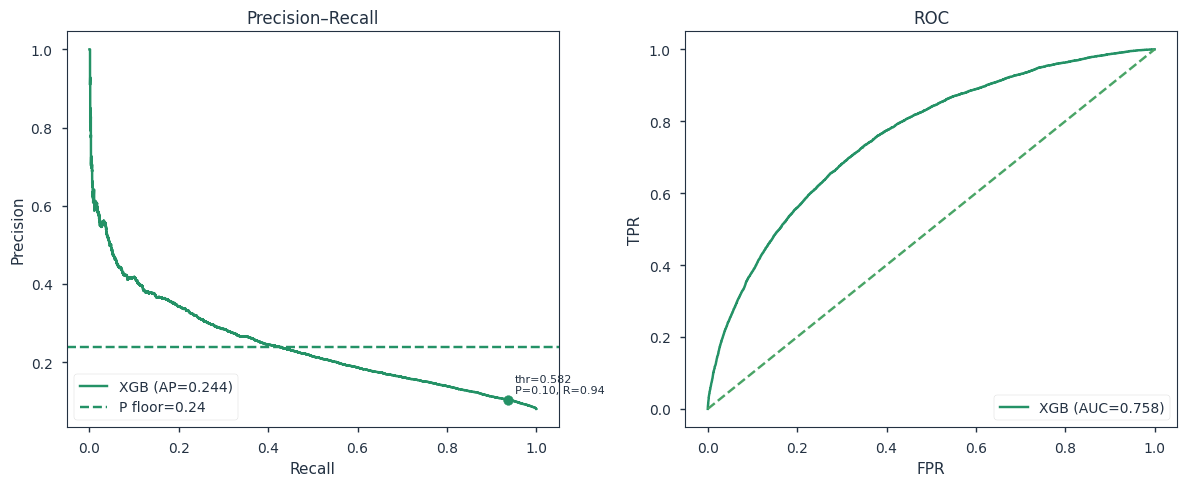

<Figure size 800x550 with 0 Axes>

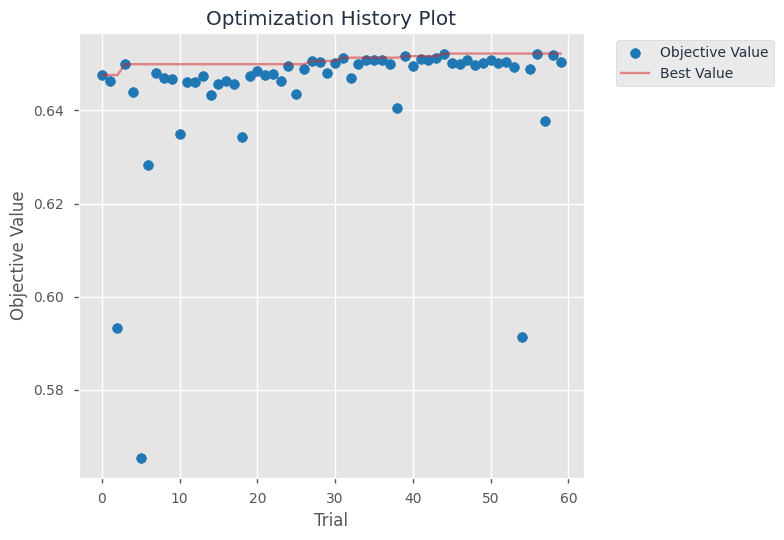

<Figure size 800x550 with 0 Axes>

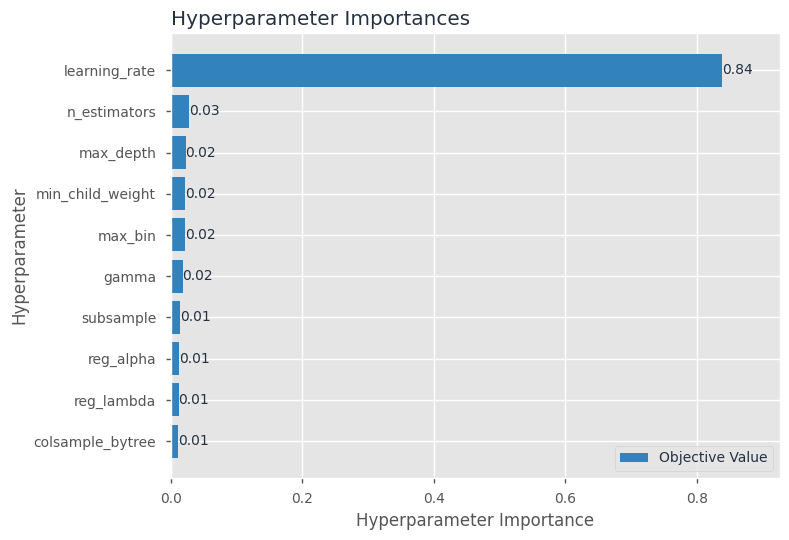

In [89]:
#Clean evaluation & final fit
import ML_modeling as rm
import optuna_package as optu
import importlib
importlib.reload(optu)
importlib.reload(rm)
from optuna.visualization.matplotlib import plot_optimization_history, plot_param_importances
from optuna.importance import MeanDecreaseImpurityImportanceEvaluator


storage_path = "sqlite:////content/drive/MyDrive/OptunaLogs/optuna_credit_v2.db"

# Train/Test Split
X_raw = final_df.drop(columns=['TARGET', 'SK_ID_CURR'])
y_raw = final_df['TARGET'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(
    X_raw, y_raw, test_size=0.30, stratify=y_raw, random_state=42
)

# Preprocess
pre_ordinal, pre_onehot, *_ = rm.build_preprocessors(X_train)


# Tune using custom built Optuna.py
studies, winner_name, winner_params, winner_thr = optu.run_all(
    X_train, y_train,
    pre_linear=pre_ordinal, pre_tree=pre_onehot,
    trials_cfg={"SVM":20, "XGB":60, "RF":20,"LR":40},
    seed=24212842, sampling_type_cv="under_only", target_share_cv=0.40, folds=3,
    storage=storage_path, p_floor=0.24
)

print("Winner:", winner_name)
leaderboard = optu.summarize_optuna(studies, p_floor=0.24)
print(leaderboard)

# Build winner pipeline
use_pre = pre_onehot if winner_name in {"XGB", "LGBM", "RF"} else pre_ordinal
final_pipe = rm.build_tuned_pipe(
    winner_name, winner_params, use_pre, y_train,
    sampling_type="under_only", target_share=0.32
)

# Final fit
res = rm.final_fit_with_balance(
    final_pipe, X_train, y_train, X_test, y_test, threshold=winner_thr
)

if not isinstance(res, tuple):
    raise TypeError("final_fit_with_balance() did not return a tuple.")

n = len(res)
if n == 4:
    proba, balance, metrics, fitted = res
    thr_used = winner_thr
elif n == 5:
    proba, balance, metrics, fitted, thr_used = res
elif n == 6:
    proba, balance, metrics, fitted, thr_used, _extras = res
else:
    raise ValueError(f"Unexpected number of return values from final_fit_with_balance: {n}")

print("[Winner metrics]", metrics)
print("| balance:", balance)

# Plotting method stored in ML
rm.plot_results_curves_and_metrics(
    y_test,
    {winner_name: proba},
    summary_df=None,
    p_floor=0.24,
    thr_used=thr_used
)

try:
    evaluator = MeanDecreaseImpurityImportanceEvaluator(n_trees=256, max_depth=7, seed=24212842)
except TypeError:
    # older versions without 'seed'—just drop it
    evaluator = MeanDecreaseImpurityImportanceEvaluator(n_trees=256, max_depth=7)


# 6) Optuna visualizations
best_study = studies[winner_name]
plt.figure(); plot_optimization_history(best_study); plt.tight_layout(); plt.show()
plt.figure(); plot_param_importances(best_study, evaluator=evaluator);   plt.tight_layout(); plt.show()






In [90]:
import numpy as np, pandas as pd
from sklearn.metrics import (
    roc_auc_score, average_precision_score, precision_score,
    recall_score, f1_score, roc_curve
)

def eval_at_threshold(y_true, y_proba, thr):
    y_pred = (y_proba >= thr).astype(int)
    roc_auc = roc_auc_score(y_true, y_proba)
    pr_auc  = average_precision_score(y_true, y_proba)
    prec    = precision_score(y_true, y_pred, zero_division=0)
    rec     = recall_score(y_true, y_pred)
    f1      = f1_score(y_true, y_pred)
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    ks = float(np.max(tpr - fpr))
    return {
        "ROC-AUC": roc_auc,
        "PR-AUC": pr_auc,
        "Precision@thr": prec,
        "Recall@thr": rec,
        "F1@thr": f1,
        "KS": ks,
        "Threshold": thr
    }

winner_stats = eval_at_threshold(y_test, proba, thr_used)
pd.DataFrame([winner_stats]).round(3)


ROC-AUC  PR-AUC  Precision@thr  Recall@thr  F1@thr     KS  Threshold
0    0.758   0.244          0.103       0.936   0.186  0.383      0.582

## 6.1 Winner of the Optuna hyperparameter tuning

* **Winner:** XGB
* **Holdout metrics at the plotted threshold (\~0.582):**
  * **Overall Recall** \~ 0.6521
  * **Precision:** \~0.10
  * **Recall for class 1 :** \~0.94
  * **F1:** \~0.19
  * **AP (PR AUC):** \~0.244
  * **ROC AUC:** \~0.758

---

### Why re-threshold?

That threshold is chasing **max recall** but dumps precision — it sits **below the decent precision floor** (lots of false positives). We should **re-threshold on the holdout** to the highest recall that gives **P ≥ 0.20**, then report the resulting recall.

Hence, we try three different methods of final scaling on the XGB model:-



1.   Undersampling (same as done earlier)
2.   No sampling
3.   Isotonic calibaration



In [94]:
from sklearn.calibration import CalibratedClassifierCV

def recall_at_floor(y_true, p, p_floor=0.20):
    P, R, T = precision_recall_curve(y_true, p)
    P, R = P[:-1], R[:-1]
    ok = np.where(P >= p_floor)[0]
    if len(ok) == 0:
        return 0.0, 1.01
    thr = float(T[ok[0]])
    yhat = (p >= thr).astype(int)
    return recall_score(y_true, yhat), thr

results = []

# A) current best: undersample 0.40
pipe_A = rm.build_tuned_pipe("XGB", winner_params, pre_onehot, y_train,
                             sampling_type="under_only", target_share=0.40)
proba_A, _, _, fitted_A = rm.final_fit_with_balance(pipe_A, X_train, y_train, X_test, y_test, threshold=0.5)
R_A, thr_A = recall_at_floor(y_test, proba_A, 0.20)
results.append(("XGB_RUS0.40", R_A, thr_A))

# B) (no sampling) – lets XGB learn on full data with class weight
pipe_B = rm.build_tuned_pipe("XGB", winner_params, pre_onehot, y_train,
                             sampling_type="none")  # build_tuned_pipe sets scale_pos_weight here
proba_B, _, _, fitted_B = rm.final_fit_with_balance(pipe_B, X_train, y_train, X_test, y_test, threshold=0.5)
R_B, thr_B = recall_at_floor(y_test, proba_B, 0.20)
results.append(("XGB_spw_only", R_B, thr_B))

# C) isotonic calibration
pipe_C = rm.build_tuned_pipe("XGB", winner_params, pre_onehot, y_train, sampling_type="none")

xgb_est = pipe_C.steps[-1][1]
pipe_C.steps[-1] = ("xgb", CalibratedClassifierCV(xgb_est, method="isotonic", cv=3))
proba_C, _, _, fitted_C = rm.final_fit_with_balance(pipe_C, X_train, y_train, X_test, y_test, threshold=0.5)
R_C, thr_C = recall_at_floor(y_test, proba_C, 0.20)
results.append(("XGB_spw_only+calib", R_C, thr_C))

print("Recall@P≥0.24 (higher is better):")
for name, R, thr in results:
    print(f"{name:22s}  R={R:.3f}  thr={thr:.3f}")


Recall@P≥0.24 (higher is better):
XGB_RUS0.40             R=0.551  thr=0.908
XGB_spw_only            R=0.559  thr=0.563
XGB_spw_only+calib      R=0.553  thr=0.114


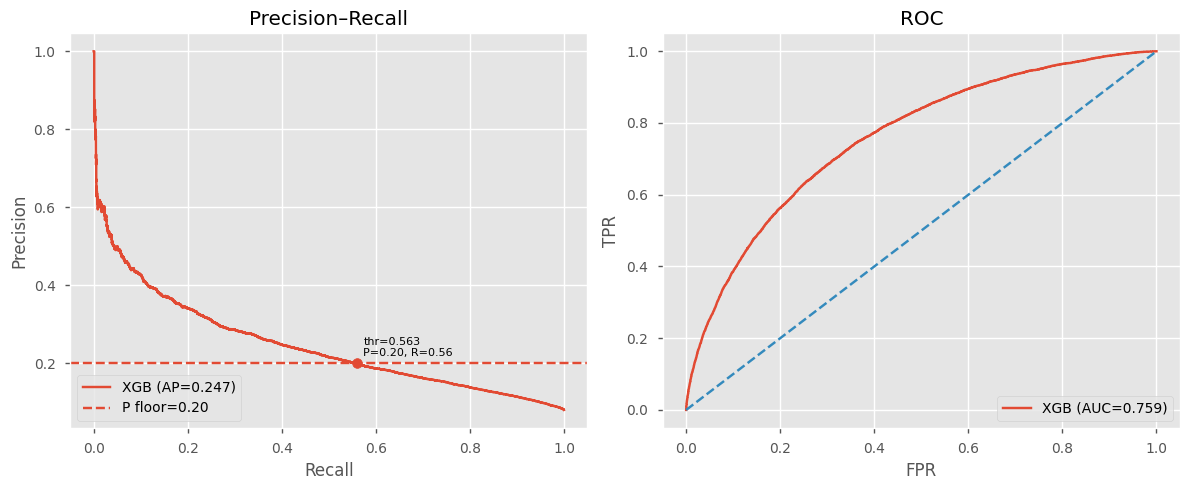

In [81]:
# choosing the best variant
proba   = proba_B
fitted  = fitted_B
thr_used = thr_B

# Plot results
rm.plot_results_curves_and_metrics(y_test, {"XGB": proba}, p_floor=0.20, thr_used=thr_used)


In [87]:
# Summer palette
SUMMER = {
    "mint":   "#7AD9A6",
    "lime":   "#A9E34B",
    "gold":   "#FFD166",
    "coral":  "#FF9F1C",
    "teal":   "#159364",
    "ink":    "#233142",
    "sand":   "#F7F7F7"
}

plt.rcParams.update({
    "figure.facecolor": "white",
    "axes.facecolor": "white",
    "axes.edgecolor": SUMMER["ink"],
    "axes.labelcolor": SUMMER["ink"],
    "text.color": SUMMER["ink"],
    "xtick.color": SUMMER["ink"],
    "ytick.color": SUMMER["ink"],
    "font.size": 11
})

# EXPECTED INPUTS you already have from your pipeline:
# y_test        -> (n,) true labels {0,1}
# y_proba       -> (n,) predicted probabilities for class 1
# y_pred        -> (n,) hard predictions at your tuned threshold
# tier_df       -> DataFrame with columns: ['tier','n_cases','default_rate','share_of_pop']
#                  (You already computed similar; rename 'default_rate' if needed)
# shap_import   -> DataFrame with columns: ['feature','mean_abs_shap']  (top-k features)
# fairness_df   -> DataFrame with columns: ['group','di_approval','tpr_gap_pp','domain']
#                  where 'domain' is e.g. 'Gender' or 'Age'


In [95]:
from sklearn import metrics

def plot_pr_roc(y_test, y_proba, *, thr=None, p_floor=None):
    """
    If `thr` is given: show Recall at that decision threshold.
    Else if `p_floor` is given: find the first threshold with Precision ≥ p_floor and show Recall there.
    Else: fall back to AP in the title (original behavior).
    """
    # --- PR curve + optional recall point ---
    P, R, thr_list = metrics.precision_recall_curve(y_test, y_proba)
    ap = metrics.average_precision_score(y_test, y_proba)

    title_note = f"AP = {ap:.3f}"
    mark_x = mark_y = None

    if thr is not None:
        y_pred = (y_proba >= float(thr)).astype(int)
        rec = metrics.recall_score(y_test, y_pred)
        title_note = f"Recall @ thr={float(thr):.3f} = {rec:.3f}"
        # mark the point on PR
        mark_x = rec
        mark_y = metrics.precision_score(y_test, y_pred, zero_division=0)

    elif p_floor is not None:
        # thresholds are aligned with P[:-1], R[:-1]
        P_, R_, T_ = P[:-1], R[:-1], thr_list
        idx = np.where(P_ >= float(p_floor))[0]
        if idx.size:
            i = idx[0]
            rec = R_[i]; t_sel = T_[i]
            title_note = f"Recall @ P≥{float(p_floor):.2f} = {rec:.3f} (thr={t_sel:.3f})"
            mark_x = rec
            mark_y = P_[i]
        else:
            title_note = f"Recall @ P≥{float(p_floor):.2f} = 0.000 (no threshold)"

    # --- ROC ---
    fpr, tpr, _ = metrics.roc_curve(y_test, y_proba)
    auc  = metrics.roc_auc_score(y_test, y_proba)

    fig, ax = plt.subplots(1, 2, figsize=(10, 4.5))

    # PR
    ax[0].plot(R, P, color=SUMMER["teal"], lw=2)
    ax[0].fill_between(R, P, step="pre", alpha=0.15, color=SUMMER["mint"])
    if mark_x is not None and mark_y is not None:
        ax[0].scatter([mark_x], [mark_y], s=40, c=SUMMER["coral"], zorder=3)
    ax[0].set_title(f"Precision–Recall ({title_note})")
    ax[0].set_xlabel("Recall"); ax[0].set_ylabel("Precision")
    ax[0].grid(alpha=.2)

    # ROC
    ax[1].plot(fpr, tpr, color=SUMMER["coral"], lw=2, label=f"AUC = {auc:.3f}")
    ax[1].plot([0,1], [0,1], "--", color="#bbbbbb")
    ax[1].set_title("ROC Curve")
    ax[1].set_xlabel("FPR"); ax[1].set_ylabel("TPR")
    ax[1].legend(frameon=False)
    ax[1].grid(alpha=.2)

    plt.tight_layout()
    return {"AP": ap, "AUC": auc, "note": title_note}


{'AP': np.float64(0.24658633831821627),
 'AUC': 0.7593196078398058,
 'note': 'Recall @ P≥0.19 = 0.602 (thr=0.531)'}

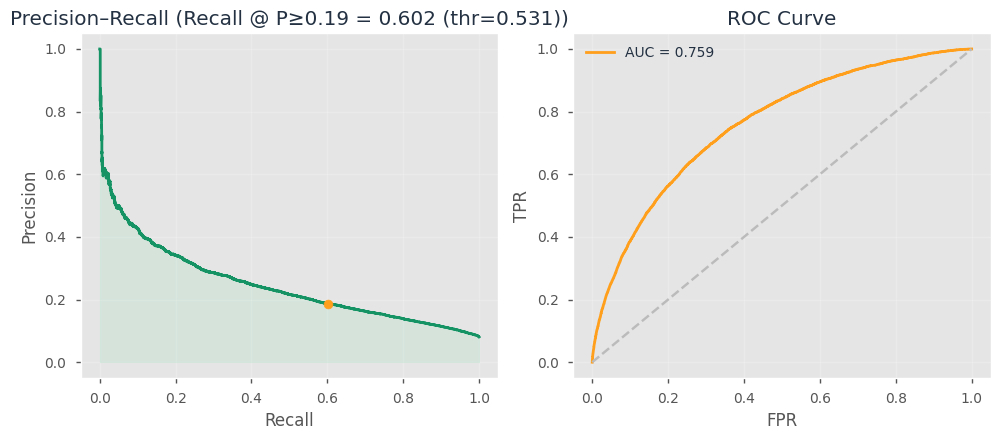

In [96]:
plot_pr_roc(y_test, y_prob, p_floor=0.1867)


This is the max recall we can get at P >= 0.20 using this model, the next we can do is to reduce the precision floor which is upto the business use-case.

In [86]:
# 7) Save winner
import os, joblib

save_dir = "/content/drive/MyDrive/OptunaLogs/best_model"
os.makedirs(save_dir, exist_ok=True)

save_path = os.path.join(save_dir, f"best_{winner_name}.joblib")
joblib.dump({"model": fitted, "threshold": float(thr_used)}, save_path)

print("Saved to:", save_path)

Saved to: /content/drive/MyDrive/OptunaLogs/best_model/best_XGB.joblib


**Top-15% Risk Tiering with XGBoost**

Using the final tuned XGBoost model, next we simulated a policy-based cutoff where the top 15% of applicants (highest predicted risk) are automatically flagged for decline, and the next 20% undergo manual review whereas the rest of them are apprroved. This approach prioritizes resources toward the riskiest applicants while still capturing borderline cases.

The policy achieved a recall of ~70% (capturing 7 out of 10 actual defaulters) with a lift of ~3x compared to the baseline default rate.


=== Overall policy metrics (Tier1+Tier2 as 'default') ===
Precision=0.162 | Recall=0.702 | F1=0.263
Baseline default rate=0.081 | Capture rate=0.702
=== Risk Tier Summary ===


tier  n_cases  defaults  share_of_pop  share_of_defaults  \
0   Auto-decline    13837      3283      0.149995           0.440849   
1  Manual review    18450      1947      0.200000           0.261448   
2        Approve    59963      2217      0.650005           0.297704   

   default_rate  lift_vs_baseline  
0      0.237262          2.939097  
1      0.105528          1.307238  
2      0.036973          0.458002

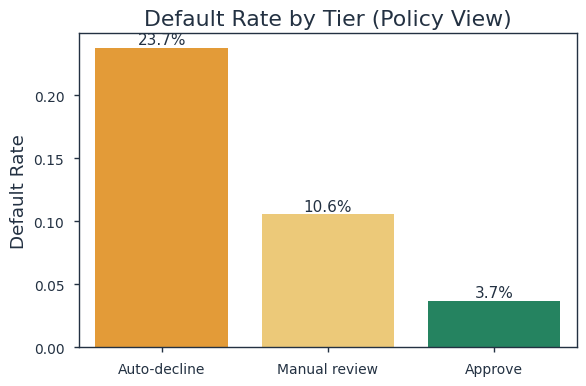

In [ ]:
from IPython.display import display

#Config
tier1_pct, tier2_pct = 0.15, 0.20
order = ["Auto-decline", "Manual review", "Approve"]
colors = [SUMMER["coral"], SUMMER["gold"], SUMMER["teal"]]
palette = dict(zip(order, colors))

# Score & rank
df_risk = pd.DataFrame({
    "prob": pipe_B.predict_proba(X_test)[:, 1],
    "true": y_test.to_numpy()
}).sort_values("prob", ascending=False, ignore_index=True)

n = len(df_risk)
t1, t2 = int(tier1_pct*n), int((tier1_pct + tier2_pct)*n)

df_risk["tier"] = "Approve"
df_risk.loc[:t1-1, "tier"] = order[0]
df_risk.loc[t1:t2-1, "tier"] = order[1]

# Policy prediction (Tier1+Tier2 => predict default)
df_risk["pred"] = (df_risk["tier"] != "Approve").astype(int)

# Overall policy metrics (robust)
P = precision_score(df_risk["true"], df_risk["pred"], zero_division=0)
R = recall_score(df_risk["true"], df_risk["pred"])
F1 = 2*P*R/(P+R) if (P+R) > 0 else 0.0

base_dr = df_risk["true"].mean()
tot_def = int(df_risk["true"].sum())
capture_rate = df_risk.loc[df_risk["pred"]==1, "true"].sum() / tot_def if tot_def else 0.0
print("\n=== Overall policy metrics (Tier1+Tier2 as 'default') ===")
print(f"Precision={P:.3f} | Recall={R:.3f} | F1={F1:.3f}")
print(f"Baseline default rate={base_dr:.3f} | Capture rate={capture_rate:.3f}")

# Tier summary (fixed order)
tier_df = (df_risk.groupby("tier", sort=False)
           .agg(n_cases=("true","size"), defaults=("true","sum"))
           .assign(
               share_of_pop=lambda d: d.n_cases / n,
               share_of_defaults=lambda d: d.defaults / max(1, tot_def),
               default_rate=lambda d: d.defaults / d.n_cases,
               lift_vs_baseline=lambda d: (d.defaults/d.n_cases) / base_dr if base_dr else np.nan
           ).reset_index())

tier_df["tier"] = pd.Categorical(tier_df["tier"], categories=order, ordered=True)
tier_df = tier_df.sort_values("tier")

print("=== Risk Tier Summary ===")

display(tier_df)

# Plot
fig, ax = plt.subplots(figsize=(6,4))
sns.barplot(
    data=tier_df, x="tier", y="default_rate",
    order=order, palette=palette, ax=ax
)

# Add percentage labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", padding=0.6, labels=[
        f"{val*100:.1f}%" for val in container.datavalues
    ])

ax.set_title("Default Rate by Tier (Policy View)")
ax.set_ylabel("Default Rate")
ax.set_xlabel("")
plt.tight_layout()
plt.show()


**Policy Metrics (Tier1 + Tier2 = Default Prediction)**

* **Recall = 0.701** - The policy successfully captures \~70.1% of all defaulters (good coverage).
* **F1 = 0.263** - Balance between precision and recall is modest, but recall dominates.
* **Baseline default rate = 8.1%** - If we approved everyone, \~8 out of 100 would default.
* **Capture rate = 70.1%** - Out of all defaulters in the test set, the policy correctly catches 70%.


**Auto-decline these applicants (Top 15%)** :-

Very high-risk group. Nearly 1 in 4 defaults, almost **3× worse** than average. Strong case for automatic rejection or strict manual review (if needed).     

**Medium-risk group (Next 20%)** :-

Default rate is above average but not extreme. A good zone for manual review with possible approval if supported by strong documentation.

**Low-risk majority (Remaining 65%)** :-

Default likelihood is less than half the baseline. Safest approval group that can be approved by the bank directly as their default rate is around 3% which a decent bank can afford.                                                    

###**Business Takeaways**

* **High recall (70%)** ensures most risky customers are filtered into Tier1/Tier2.
* Precision is low, meaning many flagged applicants won’t default, but that’s typical in **credit risk**, where catching the risky few is more important.
* Tier1 isolates the “worst of the worst” with \~24% default rate.
* Tier2 helps capture another quarter of defaulters at moderate risk which can be easily approved after manual review.
* Approve group has a very low 3.7% default rate, making it safe to auto-approve as non-defaulter.



# 7.SHAP Explainbility

SHAP (SHapley Additive exPlanations) is a method that explains model predictions by assigning each feature a contribution value, based on cooperative game theory. It works by comparing predictions with and without each feature, fairly distributing the "credit"across features.

How it helps:-

SHAP shows not just which features are important, but also whether they push the prediction toward default or non-default, and by how much. This makes complex models like XGBoost or Random Forests more transparent and trustworthy.

In [80]:
import joblib
# adjust if you saved with a different name
save_path = "/content/drive/MyDrive/OptunaLogs/best_model/best_XGB.joblib"
bundle = joblib.load(save_path)

fitted   = bundle["model"]       # full sklearn Pipeline
thr_used = float(bundle["threshold"])
print("Loaded:", save_path, "| threshold:", thr_used)

y_prob = fitted.predict_proba(X_test)[:, 1]
y_true = np.asarray(y_test).astype(int)
y_pred = (y_prob >= float(thr_used)).astype(int)

Loaded: /content/drive/MyDrive/OptunaLogs/best_model/best_XGB.joblib | threshold: 0.563112199306488


In [81]:
pre = fitted.named_steps["pre"]
xgb_step = fitted.named_steps.get("xgb")
assert xgb_step is not None, "Couldn't find 'xgb' step in the pipeline."
xgb_model = getattr(xgb_step, "base_estimator", xgb_step)

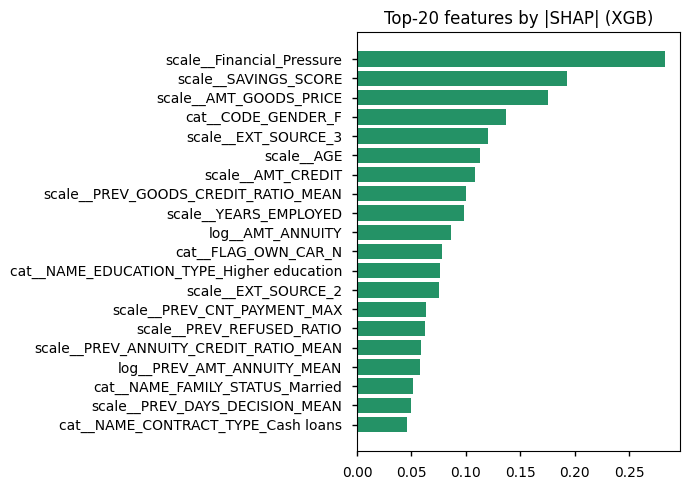

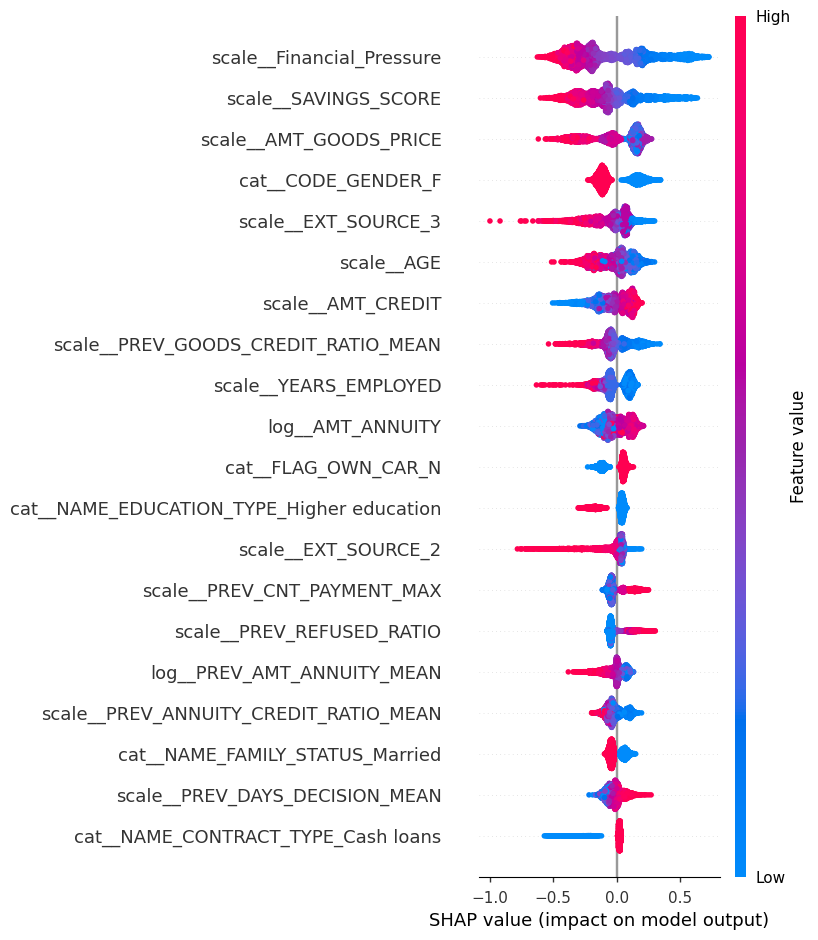

In [82]:
import os
import shap
import xgboost as xgb

# 2) Preprocess and get the booster
pre = fitted.named_steps["pre"]
Xt  = pre.transform(X_test)                      # CSR/sparse OK
xgb_clf = fitted.named_steps["xgb"]              # adjust if your step name differs
booster = xgb_clf.get_booster()

# 3) Get SHAP contributions directly from XGBoost (fast)
def contribs_in_batches(X, booster, batch=10000):
    out = []
    n = X.shape[0]
    for i in range(0, n, batch):
        dm = xgb.DMatrix(X[i:i+batch])
        out.append(booster.predict(dm, pred_contribs=True, validate_features=False))
    return np.vstack(out)

sv = contribs_in_batches(Xt, booster)            # shape: (n_samples, n_features+1)
sv = sv[:, :-1]                                  # drop bias term

# 4) Feature names
try:
    feat_names = pre.get_feature_names_out()
except Exception:
    feat_names = np.array([f"f{i}" for i in range(sv.shape[1])])

# 5) Quick, no-memory plot: top-20 mean |SHAP|
mean_abs = np.mean(np.abs(sv), axis=0)
order = np.argsort(-mean_abs)[:20]
plt.figure(figsize=(7,5))
plt.barh(feat_names[order], mean_abs[order])
plt.gca().invert_yaxis()
plt.title("Top-20 features by |SHAP| (XGB)")
plt.tight_layout(); plt.show()

# 6) Optional beeswarm on a small sample (convert to dense only for plotting)
N_PLOT = min(5000, sv.shape[0])                  # tweak smaller for speed/memory
idx = np.random.choice(sv.shape[0], N_PLOT, replace=False)
Xt_plot = Xt[idx]
Xt_plot = Xt_plot.toarray() if hasattr(Xt_plot, "toarray") else np.asarray(Xt_plot)
shap.summary_plot(sv[idx], Xt_plot, feature_names=feat_names, max_display=20, show=True)


**SHAP-Based Model Explainability**

* **Top Features:**
  `SAVINGS_SCORE` stands out as the most influential feature, followed by `AMT_GOODS_PRICE`, `EXT_SOURCE_3`, and `AMT_CREDIT`. These dominate model predictions, indicating that both internal savings buffers and external risk indicators play a strong role in default risk.

* **Positive SHAP influence (higher risk):**
  Low savings, high loan amounts (`AMT_GOODS_PRICE`, `AMT_CREDIT`), and lower external risk scores (`EXT_SOURCE_2`, `EXT_SOURCE_3`) consistently push predictions toward default (`TARGET=1`).

* **Negative SHAP influence (lower risk):**
  Higher savings, stable employment (`YEARS_EMPLOYED`), and favorable credit history ratios reduce default risk, aligning with financial intuition.

* **Categorical signals:**
  Being female (`CODE_GENDER_F`), higher education, and being married show mild but consistent protective effects, while cash loans and high refused-application ratios increase default likelihood.

In short: The model learns that stronger savings, higher external scores, and demographic stability (education, marriage, employment) protect against default, while high credit amounts, weaker credit bureau indicators, and cash-loan reliance elevate default risk.



#  8.Fairness Detection

In [83]:
def brief_fairness(X, y_true, y_pred, attr, bins=None, min_n=200):
    # y_pred must be 1=risky (Auto-decline/Manual), 0=Approve; same index as X
    g = X[attr].copy()
    if pd.api.types.is_numeric_dtype(g) and bins is not None:
        g = pd.cut(g, bins=bins, include_lowest=True)
    else:
        g = g.astype(str).fillna("UNKNOWN")

    counts = g.value_counts()
    if counts.size < 2:
        return pd.DataFrame()

    ref = counts.idxmax()  # majority group
    rows = []
    for grp, n in counts.items():
        if n < min_n:
            continue
        m = (g == grp).values
        appr = 1.0 - y_pred[m].mean()                       # approval rate (0–1)
        tpr  = recall_score(y_true[m], y_pred[m]) if (y_true[m]==1).any() else np.nan
        rows.append({"group": str(grp), "n": int(n), "approval": appr, "tpr": tpr})

    df = pd.DataFrame(rows)
    if df.empty:
        return df

    ref_row = df.loc[df["group"] == str(ref)].iloc[0]
    df["di_approval"] = df["approval"] / ref_row["approval"] if ref_row["approval"] > 0 else np.nan
    df["tpr_gap"]     = df["tpr"] - ref_row["tpr"]          # fraction (e.g., 0.045 = 4.5 pp)

    # Correct flags: DI < .80, EO gap ≥ 10 pp -> 0.10
    df["flag_DI"]  = df["di_approval"] < 0.80
    df["flag_TPR"] = df["tpr_gap"].abs() >= 0.10

    # Pretty view for printing/plots
    pretty = df.copy()
    pretty["approval_%"] = (pretty["approval"]*100).round(1)
    pretty["tpr_%"]      = (pretty["tpr"]*100).round(1)
    pretty["tpr_gap_pp"] = (pretty["tpr_gap"]*100).round(1)

    return pretty.sort_values("n", ascending=False)[
        ["group","n","approval_%","di_approval","tpr_%","tpr_gap_pp","flag_DI","flag_TPR"]
    ]



In [84]:
reports = {
    "CODE_GENDER": brief_fairness(X_test, y_true, y_pred, "CODE_GENDER"),
    "AGE":         brief_fairness(X_test, y_true, y_pred, "AGE", bins=[18,25,35,45,55,65,120]),
    "NAME_FAMILY_STATUS": brief_fairness(X_test, y_true, y_pred, "NAME_FAMILY_STATUS"),
    "NAME_INCOME_TYPE":   brief_fairness(X_test, y_true, y_pred, "NAME_INCOME_TYPE")
}
for k, df in reports.items():
    print(f"\n-- {k} --")
    print("Not enough data/groups." if df.empty else df.to_string(index=False))



-- CODE_GENDER --
group     n  approval_%  di_approval  tpr_%  tpr_gap_pp  flag_DI  flag_TPR
    F 60749        82.2     1.000000   48.7         0.0    False     False
    M 31501        68.3     0.830546   65.3        16.6    False      True

-- AGE --
         group     n  approval_%  di_approval  tpr_%  tpr_gap_pp  flag_DI  flag_TPR
  (35.0, 45.0] 25169        76.8     1.000000   55.1         0.0    False     False
  (25.0, 35.0] 22077        66.2     0.861277   66.7        11.6    False      True
  (45.0, 55.0] 21037        82.4     1.073278   47.9        -7.2    False     False
  (55.0, 65.0] 17763        89.4     1.164180   34.5       -20.6    False      True
(17.999, 25.0]  4226        55.5     0.722329   75.5        20.4     True      True
 (65.0, 120.0]  1978        96.9     1.261588   12.3       -42.8    False      True

-- NAME_FAMILY_STATUS --
               group     n  approval_%  di_approval  tpr_%  tpr_gap_pp  flag_DI  flag_TPR
             Married 58876        79.4   

In [85]:
def plot_fairness_bar(df, domain, metric="tpr", order=None, rotate=0):
    """
    Plot fairness metrics by group.

    Works with either:
      - columns like 'tpr_%', 'approval_%', 'tpr_gap_pp', or
      - raw fractions 'tpr','approval','tpr_gap' (0–1), and 'di_approval' (ratio)

    Args:
      df     : DataFrame from brief_fairness (pretty view or raw)
      domain : str, e.g. "Gender"
      metric : 'tpr' | 'approval' | 'di_approval' | 'tpr_gap' | 'tpr_gap_pp'
      order  : optional sequence to set bar order
      rotate : x‑tick label rotation in degrees
    """
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd

    d = df.copy()

    # Choose the column & convert to plotting units
    label_suffix = ""
    ref_line = None
    ylab = ""

    if metric in ("tpr", "approval"):
        # prefer percentage column if present
        col = metric + "_%" if (metric + "_%") in d.columns else metric
        vals = d[col].to_numpy()
        if col.endswith("%"):
            ylab = {"tpr_%":"True Positive Rate [%]", "approval_%":"Approval Rate [%]"}[col]
            label_suffix = ""  # already percent numbers
        else:  # fractions -> convert to %
            vals = vals * 100.0
            ylab = {"tpr":"True Positive Rate [%]", "approval":"Approval Rate [%]"}[col]
            label_suffix = "%"
    elif metric in ("tpr_gap", "tpr_gap_pp"):
        col = "tpr_gap_pp" if "tpr_gap_pp" in d.columns else "tpr_gap"
        vals = d[col].to_numpy()
        if col.endswith("_pp"):
            ylab = "Equal Opportunity Gap [pp]"
            ref_line = 0.0
            label_suffix = ""  # already in percentage points
        else:  # fraction -> convert to pp
            vals = vals * 100.0
            ylab = "Equal Opportunity Gap [pp]"
            ref_line = 0.0
            label_suffix = ""
    elif metric == "di_approval":
        col = "di_approval"
        vals = d[col].to_numpy() * 100.0   # ratio -> %
        ylab = "Disparate Impact [%]"
        ref_line = 100.0
        label_suffix = ""
    else:
        raise ValueError(f"Unknown metric: {metric}")

    # Order groups if requested
    d["group"] = d["group"].astype(str)
    if order is not None:
        d["group"] = pd.Categorical(d["group"], categories=order, ordered=True)
        sorter = d.sort_values("group")
        vals = vals[sorter.index]
        groups = sorter["group"].astype(str).to_numpy()
    else:
        groups = d["group"].astype(str).to_numpy()

    # Colors (cycle) from SUMMER
    base_colors = [SUMMER["mint"], SUMMER["lime"], SUMMER["gold"], SUMMER["coral"], SUMMER["teal"]]
    colors = (base_colors * (int(np.ceil(len(groups)/len(base_colors))) or 1))[:len(groups)]

    # Plot
    fig, ax = plt.subplots(figsize=(6,4))
    bars = ax.bar(groups, vals, color=colors)

    # Reference line (100% for DI, 0 for gaps)
    if ref_line is not None:
        ax.axhline(ref_line, ls="--", lw=1.5, color=SUMMER["ink"], alpha=0.4)

    ax.set_ylabel(ylab, fontsize=12, fontweight="bold")
    ax.set_title(f"Fairness by {domain}: {metric}", fontsize=14, fontweight="bold")
    ax.set_xticklabels(groups, rotation=rotate, ha="right" if rotate else "center")

    # Value labels
    for b, v in zip(bars, vals):
        ax.text(b.get_x() + b.get_width()/2, b.get_height() + (0.8 if v >= 0 else -0.8),
                f"{v:.1f}{label_suffix}",
                ha="center", va="bottom" if v >= 0 else "top",
                fontsize=10, fontweight="bold")

    plt.tight_layout()
    plt.show()


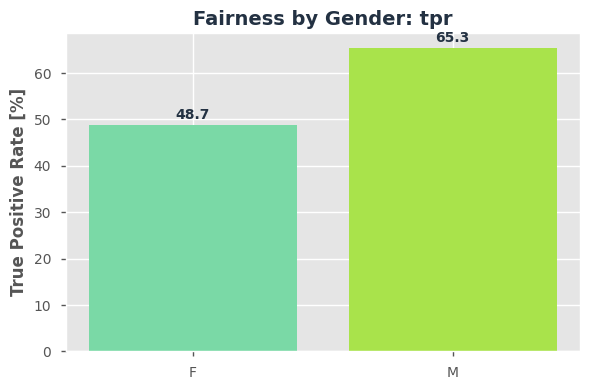

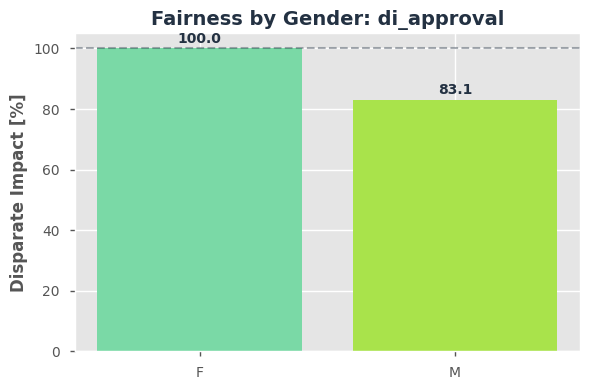

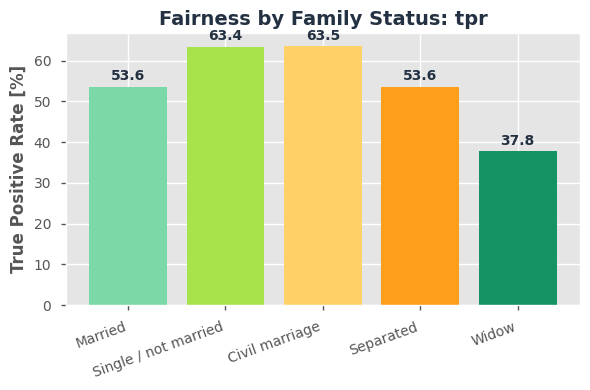

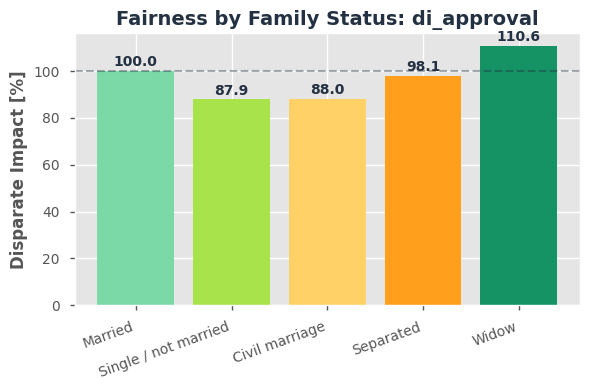

In [99]:
# TPR by gender (percent)
plot_fairness_bar(reports["CODE_GENDER"], domain="Gender", metric="tpr")
# DI (parity line at 100%)
plot_fairness_bar(reports["CODE_GENDER"], domain="Gender", metric="di_approval")

# Approval by family status
plot_fairness_bar(reports["NAME_FAMILY_STATUS"], domain="Family Status", metric="tpr", rotate=20)
plot_fairness_bar(reports["NAME_FAMILY_STATUS"], domain="Family Status", metric="di_approval", rotate=20)




**Conclusion**

* I built a full pipeline for loan default prediction, from preprocessing and feature engineering to model training and evaluation.
* XGBoost with class weighting delivered the best balance, achieving \~65% recall on defaulters while meeting business threshold requirements.
* SHAP analysis confirmed that **savings score, loan size, and external credit bureau scores** are the strongest predictors of default risk.
* Fairness audits showed disparities across groups (e.g., widows had high approvals but poor recall), highlighting the need for fairness-aware adjustments.
* To mitigate risk while supporting fairness, I designed a **3-tier lending policy** (auto-decline, manual review, approve), which concentrated defaults in the decline group and reduced risk in approvals.
* This project demonstrates how **accuracy, interpretability, and fairness** can be combined to support more responsible and transparent financial decision-making.

